# Analysis-1: Kinematics

## 1. Import Packages

In [1]:
import math
import numpy as np
import pandas as pd
import uproot
import pyjet
import matplotlib.pyplot as plt
import time, datetime, prettytable, os, glob, tqdm, sys
import importlib


# My Packages
import myhep.particle_information_v2 as mypiv2
import myhep.analytical_function_v2 as myparsev2
import myhep.particleinfo_v1 as mypiv1
import myhep.particlefun_v1 as myafv1

%config InlineBackend.figure_format = 'retina'  # increase figure showing resolution

## 2. Import .root Files and Load Event via class

In [2]:
print(time.strftime('%m/%d/%Y %a, %H:%M:%S %Z', time.localtime()))
start = datetime.datetime.now()

INPUT_1 = uproot.open('/youwei_home/SVJ_CKKWL/s-channel_ckkwl-v2/root/svj_s_ckkwl-1.root')['Delphes;1']
INPUT_2 = uproot.open('/youwei_home/SVJ_CKKWL/s-channel_ckkwl-v2/root/svj_s_ckkwl-2.root')['Delphes;1']
INPUT_3 = uproot.open('/youwei_home/SVJ_CKKWL/s-channel_ckkwl-v2/root/svj_s_ckkwl-3.root')['Delphes;1']
INPUT_4 = uproot.open('/youwei_home/SVJ_CKKWL/s-channel_ckkwl-v2/root/svj_s_ckkwl-4.root')['Delphes;1']
INPUT_4_1 = uproot.open('/youwei_home/SVJ_CKKWL/s-channel_ckkwl-v2/root/svj_s_ckkwl-4-1.root')['Delphes;1']
INPUT_5 = uproot.open('/youwei_home/SVJ_CKKWL/s-channel_ckkwl-v2/root/svj_s_ckkwl-5.root')['Delphes;1']
INPUT_6 = uproot.open('/youwei_home/SVJ_CKKWL/s-channel_ckkwl-v2/root/svj_s_ckkwl-6.root')['Delphes;1']
INPUT_7 = uproot.open('/youwei_home/SVJ_CKKWL/s-channel_ckkwl-v2/root/svj_s_ckkwl-7.root')['Delphes;1']
INPUT_8 = uproot.open('/youwei_home/SVJ_CKKWL/s-channel_ckkwl-v2/root/svj_s_ckkwl-8.root')['Delphes;1']
INPUT_9 = uproot.open('/youwei_home/SVJ_CKKWL/s-channel_ckkwl-v2/root/svj_s_ckkwl-9.root')['Delphes;1']
INPUT_10 = uproot.open('/youwei_home/SVJ_CKKWL/s-channel_ckkwl-v2/root/svj_s_ckkwl-10.root')['Delphes;1']
INPUT_mlm = uproot.open('/youwei_home/SVJ_Model/s-channel/ROOT/rinv03/Lam_d5/svj0_run2.root')['Delphes;1']
_list_data = [INPUT_1, INPUT_2, INPUT_3, INPUT_4, INPUT_5,
              INPUT_6, INPUT_7, INPUT_8, INPUT_9, INPUT_10,
              INPUT_4_1, INPUT_mlm]
num_of_files = len(_list_data)

list_GP, list_JET, list_EVENT = [], [], []
for i in tqdm.trange(num_of_files):
    GP = mypiv2.classGenParticle(_list_data[i])
    JET = mypiv2.classJet(_list_data[i])
    EVENT = mypiv2.classEvent(_list_data[i])
    list_GP.append(GP)
    list_JET.append(JET)
    list_EVENT.append(EVENT)

end = datetime.datetime.now()
print('Time =', end - start)

06/24/2021 Thu, 00:47:12 CST


100%|██████████| 12/12 [01:35<00:00,  7.96s/it]

Time = 0:01:37.904131


In [3]:
_list_data

[<TTree b'Delphes' at 0x7f6d31b55f70>,
 <TTree b'Delphes' at 0x7f6d31b55d60>,
 <TTree b'Delphes' at 0x7f6d319cf190>,
 <TTree b'Delphes' at 0x7f6d319daa60>,
 <TTree b'Delphes' at 0x7f6d314365b0>,
 <TTree b'Delphes' at 0x7f6d312b78e0>,
 <TTree b'Delphes' at 0x7f6d2f0ffeb0>,
 <TTree b'Delphes' at 0x7f6d2ef83220>,
 <TTree b'Delphes' at 0x7f6d2eea8700>,
 <TTree b'Delphes' at 0x7f6d2ecf3cd0>,
 <TTree b'Delphes' at 0x7f6d315b5130>,
 <TTree b'Delphes' at 0x7f6d2ebca1c0>]

In [4]:
list_GP

### 2-1. Check the number of event.

In [5]:
for i in range(num_of_files):
    print("There are {} event in the .root file.".format(list_GP[i].length))

There are 123 event in the .root file.
There are 140 event in the .root file.
There are 9877 event in the .root file.
There are 7322 event in the .root file.
There are 7322 event in the .root file.
There are 7420 event in the .root file.
There are 7322 event in the .root file.
There are 98 event in the .root file.
There are 2925 event in the .root file.
There are 2925 event in the .root file.
There are 7323 event in the .root file.
There are 14655 event in the .root file.


## 3. Truth Jet

### 3-1. Select stable final state particle and filter out DM

In [6]:
print(time.strftime('%m/%d/%Y %a, %H:%M:%S %Z', time.localtime()))
start = datetime.datetime.now()

list_SFSP_1, list_SFSP_filterDM_1 = myparsev2.selectStableFinalStateParticle_filterDM(list_GP[0])
list_SFSP_2, list_SFSP_filterDM_2 = myparsev2.selectStableFinalStateParticle_filterDM(list_GP[1])
list_SFSP_3, list_SFSP_filterDM_3 = myparsev2.selectStableFinalStateParticle_filterDM(list_GP[2])
list_SFSP_4, list_SFSP_filterDM_4 = myparsev2.selectStableFinalStateParticle_filterDM(list_GP[3])
list_SFSP_5, list_SFSP_filterDM_5 = myparsev2.selectStableFinalStateParticle_filterDM(list_GP[4])
list_SFSP_6, list_SFSP_filterDM_6 = myparsev2.selectStableFinalStateParticle_filterDM(list_GP[5])
list_SFSP_7, list_SFSP_filterDM_7 = myparsev2.selectStableFinalStateParticle_filterDM(list_GP[6])
list_SFSP_8, list_SFSP_filterDM_8 = myparsev2.selectStableFinalStateParticle_filterDM(list_GP[7])
list_SFSP_9, list_SFSP_filterDM_9 = myparsev2.selectStableFinalStateParticle_filterDM(list_GP[8])
list_SFSP_10, list_SFSP_filterDM_10 = myparsev2.selectStableFinalStateParticle_filterDM(list_GP[9])
list_SFSP_4_1, list_SFSP_filterDM_4_1 = myparsev2.selectStableFinalStateParticle_filterDM(list_GP[10])
list_SFSP_mlm, list_SFSP_filterDM_mlm = myparsev2.selectStableFinalStateParticle_filterDM(list_GP[11])

end = datetime.datetime.now()
print('Time =', end - start)

06/24/2021 Thu, 00:49:14 CST
The PID of dark matter are [51, 53].
There are 123 events with stable final state.
There are 123 events with stable final state and without DM.
The PID of dark matter are [51, 53].
There are 140 events with stable final state.
There are 140 events with stable final state and without DM.
The PID of dark matter are [51, 53].
There are 9877 events with stable final state.
There are 9877 events with stable final state and without DM.
The PID of dark matter are [51, 53].
There are 7322 events with stable final state.
There are 7322 events with stable final state and without DM.
The PID of dark matter are [51, 53].
There are 7322 events with stable final state.
There are 7322 events with stable final state and without DM.
The PID of dark matter are [51, 53].
There are 7420 events with stable final state.
There are 7420 events with stable final state and without DM.
The PID of dark matter are [51, 53].
There are 7322 events with stable final state.
There are 7322 

### 3-2. Let's do the jet clustering!!

In [7]:
print(time.strftime('%m/%d/%Y %a, %H:%M:%S %Z', time.localtime()))
start = datetime.datetime.now()

list_PseudoJet_filterDM_1 = myparsev2.jetClustering(list_SFSP_filterDM_1, R=0.4, p=-1, pTmin=0)
list_PseudoJet_filterDM_2 = myparsev2.jetClustering(list_SFSP_filterDM_2, R=0.4, p=-1, pTmin=0)
list_PseudoJet_filterDM_3 = myparsev2.jetClustering(list_SFSP_filterDM_3, R=0.4, p=-1, pTmin=0)
list_PseudoJet_filterDM_4 = myparsev2.jetClustering(list_SFSP_filterDM_4, R=0.4, p=-1, pTmin=0)
list_PseudoJet_filterDM_5 = myparsev2.jetClustering(list_SFSP_filterDM_5, R=0.4, p=-1, pTmin=0)
list_PseudoJet_filterDM_6 = myparsev2.jetClustering(list_SFSP_filterDM_6, R=0.4, p=-1, pTmin=0)
list_PseudoJet_filterDM_7 = myparsev2.jetClustering(list_SFSP_filterDM_7, R=0.4, p=-1, pTmin=0)
list_PseudoJet_filterDM_8 = myparsev2.jetClustering(list_SFSP_filterDM_8, R=0.4, p=-1, pTmin=0)
list_PseudoJet_filterDM_9 = myparsev2.jetClustering(list_SFSP_filterDM_9, R=0.4, p=-1, pTmin=0)
list_PseudoJet_filterDM_10 = myparsev2.jetClustering(list_SFSP_filterDM_10, R=0.4, p=-1, pTmin=0)
list_PseudoJet_filterDM_4_1 = myparsev2.jetClustering(list_SFSP_filterDM_4_1, R=0.4, p=-1, pTmin=0)
list_PseudoJet_filterDM_mlm = myparsev2.jetClustering(list_SFSP_filterDM_mlm, R=0.4, p=-1, pTmin=0)

end = datetime.datetime.now()
print('Time =', end - start)

06/24/2021 Thu, 00:51:35 CST
Time = 0:03:37.763397


### 3-3. Preselect truth jet

In [8]:
print(time.strftime('%m/%d/%Y %a, %H:%M:%S %Z', time.localtime()))
start = datetime.datetime.now()

list_truth_results_filterDM_1 = myparsev2.preselectTruthJet(list_PseudoJet_filterDM_1)
list_truth_results_filterDM_2 = myparsev2.preselectTruthJet(list_PseudoJet_filterDM_2)
list_truth_results_filterDM_3 = myparsev2.preselectTruthJet(list_PseudoJet_filterDM_3)
list_truth_results_filterDM_4 = myparsev2.preselectTruthJet(list_PseudoJet_filterDM_4)
list_truth_results_filterDM_5 = myparsev2.preselectTruthJet(list_PseudoJet_filterDM_5)
list_truth_results_filterDM_6 = myparsev2.preselectTruthJet(list_PseudoJet_filterDM_6)
list_truth_results_filterDM_7 = myparsev2.preselectTruthJet(list_PseudoJet_filterDM_7)
list_truth_results_filterDM_8 = myparsev2.preselectTruthJet(list_PseudoJet_filterDM_8)
list_truth_results_filterDM_9 = myparsev2.preselectTruthJet(list_PseudoJet_filterDM_9)
list_truth_results_filterDM_10 = myparsev2.preselectTruthJet(list_PseudoJet_filterDM_10)
list_truth_results_filterDM_4_1 = myparsev2.preselectTruthJet(list_PseudoJet_filterDM_4_1)
list_truth_results_filterDM_mlm = myparsev2.preselectTruthJet(list_PseudoJet_filterDM_mlm)

end = datetime.datetime.now()
print('Time =', end - start)

06/24/2021 Thu, 00:55:28 CST
The order of jets all are no error!!
There are 123 selected events.
The order of jets all are no error!!
There are 140 selected events.
The order of jets all are no error!!
There are 9877 selected events.
The order of jets all are no error!!
There are 7322 selected events.
The order of jets all are no error!!
There are 7322 selected events.
The order of jets all are no error!!
There are 7420 selected events.
The order of jets all are no error!!
There are 7322 selected events.
The order of jets all are no error!!
There are 98 selected events.
The order of jets all are no error!!
There are 2925 selected events.
The order of jets all are no error!!
There are 2925 selected events.
The order of jets all are no error!!
There are 7323 selected events.
The order of jets all are no error!!
There are 14655 selected events.
Time = 0:00:11.028178


### 3-4. Parse MET in truth level

In [9]:
print(time.strftime('%m/%d/%Y %a, %H:%M:%S %Z', time.localtime()))
start = datetime.datetime.now()

list_MET_truth_results_1 = myparsev2.parseMETTruthJet(list_SFSP_filterDM_1, list_PseudoJet_filterDM_1)
list_MET_truth_results_2 = myparsev2.parseMETTruthJet(list_SFSP_filterDM_2, list_PseudoJet_filterDM_2)
list_MET_truth_results_3 = myparsev2.parseMETTruthJet(list_SFSP_filterDM_3, list_PseudoJet_filterDM_3)
list_MET_truth_results_4 = myparsev2.parseMETTruthJet(list_SFSP_filterDM_4, list_PseudoJet_filterDM_4)
list_MET_truth_results_5 = myparsev2.parseMETTruthJet(list_SFSP_filterDM_5, list_PseudoJet_filterDM_5)
list_MET_truth_results_6 = myparsev2.parseMETTruthJet(list_SFSP_filterDM_6, list_PseudoJet_filterDM_6)
list_MET_truth_results_7 = myparsev2.parseMETTruthJet(list_SFSP_filterDM_7, list_PseudoJet_filterDM_7)
list_MET_truth_results_8 = myparsev2.parseMETTruthJet(list_SFSP_filterDM_8, list_PseudoJet_filterDM_8)
list_MET_truth_results_9 = myparsev2.parseMETTruthJet(list_SFSP_filterDM_9, list_PseudoJet_filterDM_9)
list_MET_truth_results_10 = myparsev2.parseMETTruthJet(list_SFSP_filterDM_10, list_PseudoJet_filterDM_10)
list_MET_truth_results_4_1 = myparsev2.parseMETTruthJet(list_SFSP_filterDM_4_1, list_PseudoJet_filterDM_4_1)
list_MET_truth_results_mlm = myparsev2.parseMETTruthJet(list_SFSP_filterDM_mlm, list_PseudoJet_filterDM_mlm)

end = datetime.datetime.now()
print('Time =', end - start)

06/24/2021 Thu, 00:55:47 CST
There are 123 invisible events.
There are 123 jet events.
There are 140 invisible events.
There are 140 jet events.
There are 9877 invisible events.
There are 9877 jet events.
There are 7322 invisible events.
There are 7322 jet events.
There are 7322 invisible events.
There are 7322 jet events.
There are 7420 invisible events.
There are 7420 jet events.
There are 7322 invisible events.
There are 7322 jet events.
There are 98 invisible events.
There are 98 jet events.
There are 2925 invisible events.
There are 2925 jet events.
There are 2925 invisible events.
There are 2925 jet events.
There are 7323 invisible events.
There are 7323 jet events.
There are 14655 invisible events.
There are 14655 jet events.
Time = 0:00:07.417792


## 4. $Z^\prime$ Mass

In [10]:
print(time.strftime('%m/%d/%Y %a, %H:%M:%S %Z', time.localtime()))
start = datetime.datetime.now()

m_xdxdbar_1, dfMxdxdbar_1 = myparsev2.findMxdxdbar(list_GP[0])
m_xdxdbar_2, dfMxdxdbar_2 = myparsev2.findMxdxdbar(list_GP[1])
m_xdxdbar_3, dfMxdxdbar_3 = myparsev2.findMxdxdbar(list_GP[2])
m_xdxdbar_4, dfMxdxdbar_4 = myparsev2.findMxdxdbar(list_GP[3])
m_xdxdbar_5, dfMxdxdbar_5 = myparsev2.findMxdxdbar(list_GP[4])
m_xdxdbar_6, dfMxdxdbar_6 = myparsev2.findMxdxdbar(list_GP[5])
m_xdxdbar_7, dfMxdxdbar_7 = myparsev2.findMxdxdbar(list_GP[6])
m_xdxdbar_8, dfMxdxdbar_8 = myparsev2.findMxdxdbar(list_GP[7])
m_xdxdbar_9, dfMxdxdbar_9 = myparsev2.findMxdxdbar(list_GP[8])
m_xdxdbar_10, dfMxdxdbar_10 = myparsev2.findMxdxdbar(list_GP[9])
m_xdxdbar_4_1, dfMxdxdbar_4_1 = myparsev2.findMxdxdbar(list_GP[10])
m_xdxdbar_mlm, dfMxdxdbar_mlm = myparsev2.findMxdxdbar(list_GP[11])

end = datetime.datetime.now()
print('Time =', end - start)

06/24/2021 Thu, 00:56:00 CST
All events are including 2 particles.
All events are including 2 particles.
All events are including 2 particles.
All events are including 2 particles.
All events are including 2 particles.
All events are including 2 particles.
All events are including 2 particles.
All events are including 2 particles.
All events are including 2 particles.
All events are including 2 particles.
All events are including 2 particles.
All events are including 2 particles.
Time = 0:02:05.526328


## 5. Event Weight

In [11]:
dir(list_EVENT[0])

['Weight',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'data',
 'dataframelize',
 'length']

In [12]:
list_weight = []
for i in range(11):
    weight = np.array(list_EVENT[i].Weight)*(10**9)
    list_weight.append(weight)
    
weight = np.array(list_EVENT[11].Weight/20000)
list_weight.append(weight)

len(list_weight)

12

In [13]:
for i in range(12):
    print(i+1, np.sum(list_weight[i]))

1 [0.01420508]
2 [0.01616838]
3 [1.13282627]
4 [1.12591423]
5 [1.12591423]
6 [1.14089652]
7 [1.12591423]
8 [0.01278843]
9 [0.55853586]
10 [0.55853586]
11 [1.13318804]
12 [0.5267878]


In [14]:
list_weight[3]

array([array([0.00011549]), array([0.00022193]), array([0.00011549]), ...,
       array([0.00018988]), array([0.00011549]), array([0.00017455])],
      dtype=object)

In [15]:
list_weight[11]

array([array([3.6155605e-05], dtype=float32),
       array([3.6155605e-05], dtype=float32),
       array([3.6155605e-05], dtype=float32), ...,
       array([3.6155605e-05], dtype=float32),
       array([3.6155605e-05], dtype=float32),
       array([3.6155605e-05], dtype=float32)], dtype=object)

In [16]:
sum(list_EVENT[3].Weight)*(10**9)

array([1.12584619])

In [17]:
sum(list_EVENT[11].Weight)

array([10535.291], dtype=float32)

## 7. Plot 1

In [18]:
LUMINOSITY=139

### 7-1. $Z^\prime$ Mass

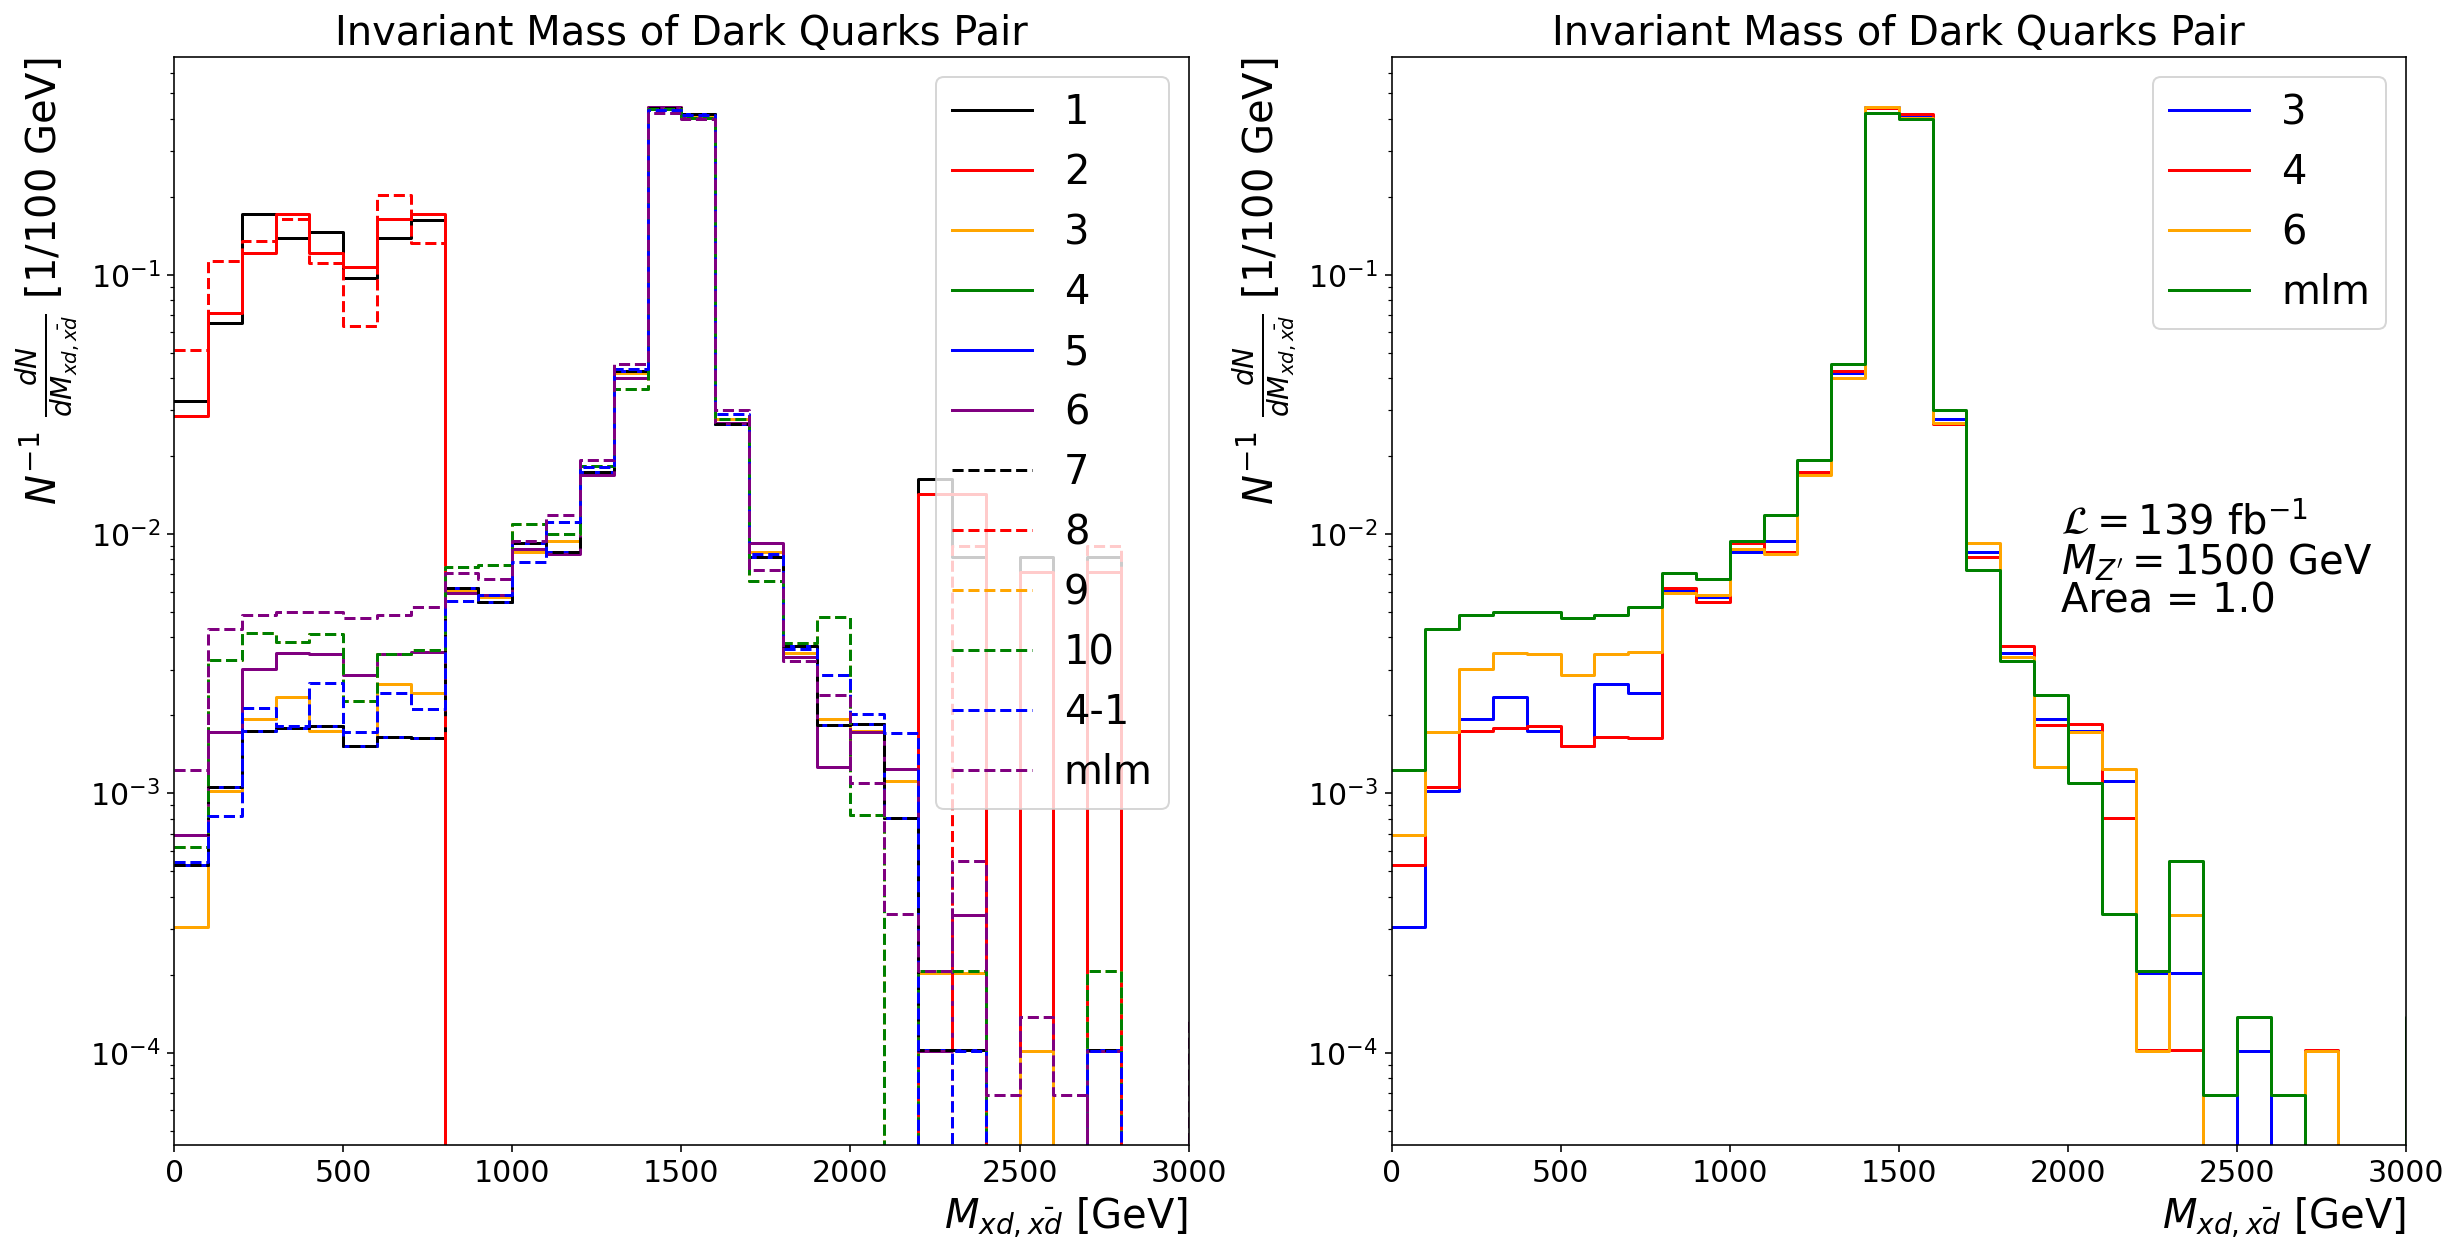

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))
binning = np.linspace(0, 5000, 51)

# figure 1
hist0_1, bins0_1 = np.histogram(m_xdxdbar_1, bins=binning, weights=list_weight[0])
hist0_2, bins0_2 = np.histogram(m_xdxdbar_2, bins=binning, weights=list_weight[1])
hist0_3, bins0_3 = np.histogram(m_xdxdbar_3, bins=binning, weights=list_weight[2])
hist0_4, bins0_4 = np.histogram(m_xdxdbar_4, bins=binning, weights=list_weight[3])
hist0_5, bins0_5 = np.histogram(m_xdxdbar_5, bins=binning, weights=list_weight[4])
hist0_6, bins0_6 = np.histogram(m_xdxdbar_6, bins=binning, weights=list_weight[5])
hist0_7, bins0_7 = np.histogram(m_xdxdbar_7, bins=binning, weights=list_weight[6])
hist0_8, bins0_8 = np.histogram(m_xdxdbar_8, bins=binning, weights=list_weight[7])
hist0_9, bins0_9 = np.histogram(m_xdxdbar_9, bins=binning, weights=list_weight[8])
hist0_10, bins0_10 = np.histogram(m_xdxdbar_10, bins=binning, weights=list_weight[9])
hist0_4_1, bins0_4_1 = np.histogram(m_xdxdbar_4_1, bins=binning, weights=list_weight[10])
hist0_mlm, bins0_mlm = np.histogram(m_xdxdbar_mlm, bins=binning, weights=list_weight[11])

axs[0].step(bins0_1[:-1], hist0_1/np.sum(hist0_1), where='post', color='black', label="1")
axs[0].step(bins0_2[:-1], hist0_2/np.sum(hist0_2), where='post', color='red', label="2")
axs[0].step(bins0_3[:-1], hist0_3/np.sum(hist0_3), where='post', color='orange', label="3")
axs[0].step(bins0_4[:-1], hist0_4/np.sum(hist0_4), where='post', color='green', label="4")
axs[0].step(bins0_5[:-1], hist0_5/np.sum(hist0_5), where='post', color='blue', label="5")
axs[0].step(bins0_6[:-1], hist0_6/np.sum(hist0_6), where='post', color='purple', label="6")
axs[0].step(bins0_7[:-1], hist0_7/np.sum(hist0_7), where='post', color='black', linestyle='--', label="7")
axs[0].step(bins0_8[:-1], hist0_8/np.sum(hist0_8), where='post', color='red', linestyle='--', label="8")
axs[0].step(bins0_9[:-1], hist0_9/np.sum(hist0_9), where='post', color='orange', linestyle='--', label="9")
axs[0].step(bins0_10[:-1], hist0_10/np.sum(hist0_10), where='post', color='green', linestyle='--', label="10")
axs[0].step(bins0_4_1[:-1], hist0_4_1/np.sum(hist0_4_1), where='post', color='blue', linestyle='--', label="4-1")
axs[0].step(bins0_mlm[:-1], hist0_mlm/np.sum(hist0_mlm), where='post', color='purple', linestyle='--', label="mlm")
# text

# axes setting
axs[0].legend(fontsize=20)
axs[0].set_xlabel("$M_{xd,\\bar{xd}}$ [GeV]", fontsize=20, horizontalalignment='right', x=1)
axs[0].set_ylabel("$N^{-1}\ \\frac{dN}{dM_{xd,\\bar{xd}}}$ [1/100 GeV]", fontsize=20, horizontalalignment='right', y=1)
axs[0].set_title("Invariant Mass of Dark Quarks Pair", fontsize=20)
axs[0].set_xlim(0,3000)
axs[0].set_yscale('log')
axs[0].tick_params(axis='both', labelsize=15)


# figure 2
axs[1].step(bins0_3[:-1], hist0_3/np.sum(hist0_3), where='post', color='blue', label="3")
axs[1].step(bins0_4[:-1], hist0_4/np.sum(hist0_4), where='post', color='red', label="4")
axs[1].step(bins0_6[:-1], hist0_6/np.sum(hist0_6), where='post', color='orange', label="6")
axs[1].step(bins0_mlm[:-1], hist0_mlm/np.sum(hist0_mlm), where='post', color='green', label="mlm")
# text
axs[1].text(1980, 0.01, "$\mathcal{L} = $"+str(LUMINOSITY)+"$\ \mathrm{fb}^{-1}$", fontsize=20)
axs[1].text(1980, 0.007, "$M_{Z^\prime} = 1500$ GeV", fontsize=20)
axs[1].text(1980, 0.005, "Area = "+str(np.round(np.sum(hist0_3.astype(np.float32)/np.sum(hist0_3)),2)), fontsize=20)
# axes setting
axs[1].legend(fontsize=20)
axs[1].set_xlabel("$M_{xd,\\bar{xd}}$ [GeV]", fontsize=20, horizontalalignment='right', x=1)
axs[1].set_ylabel("$N^{-1}\ \\frac{dN}{dM_{xd,\\bar{xd}}}$ [1/100 GeV]", fontsize=20, horizontalalignment='right', y=1)
axs[1].set_title("Invariant Mass of Dark Quarks Pair", fontsize=20)
axs[1].set_xlim(0,3000)
axs[1].set_yscale('log')
axs[1].tick_params(axis='both', labelsize=15)

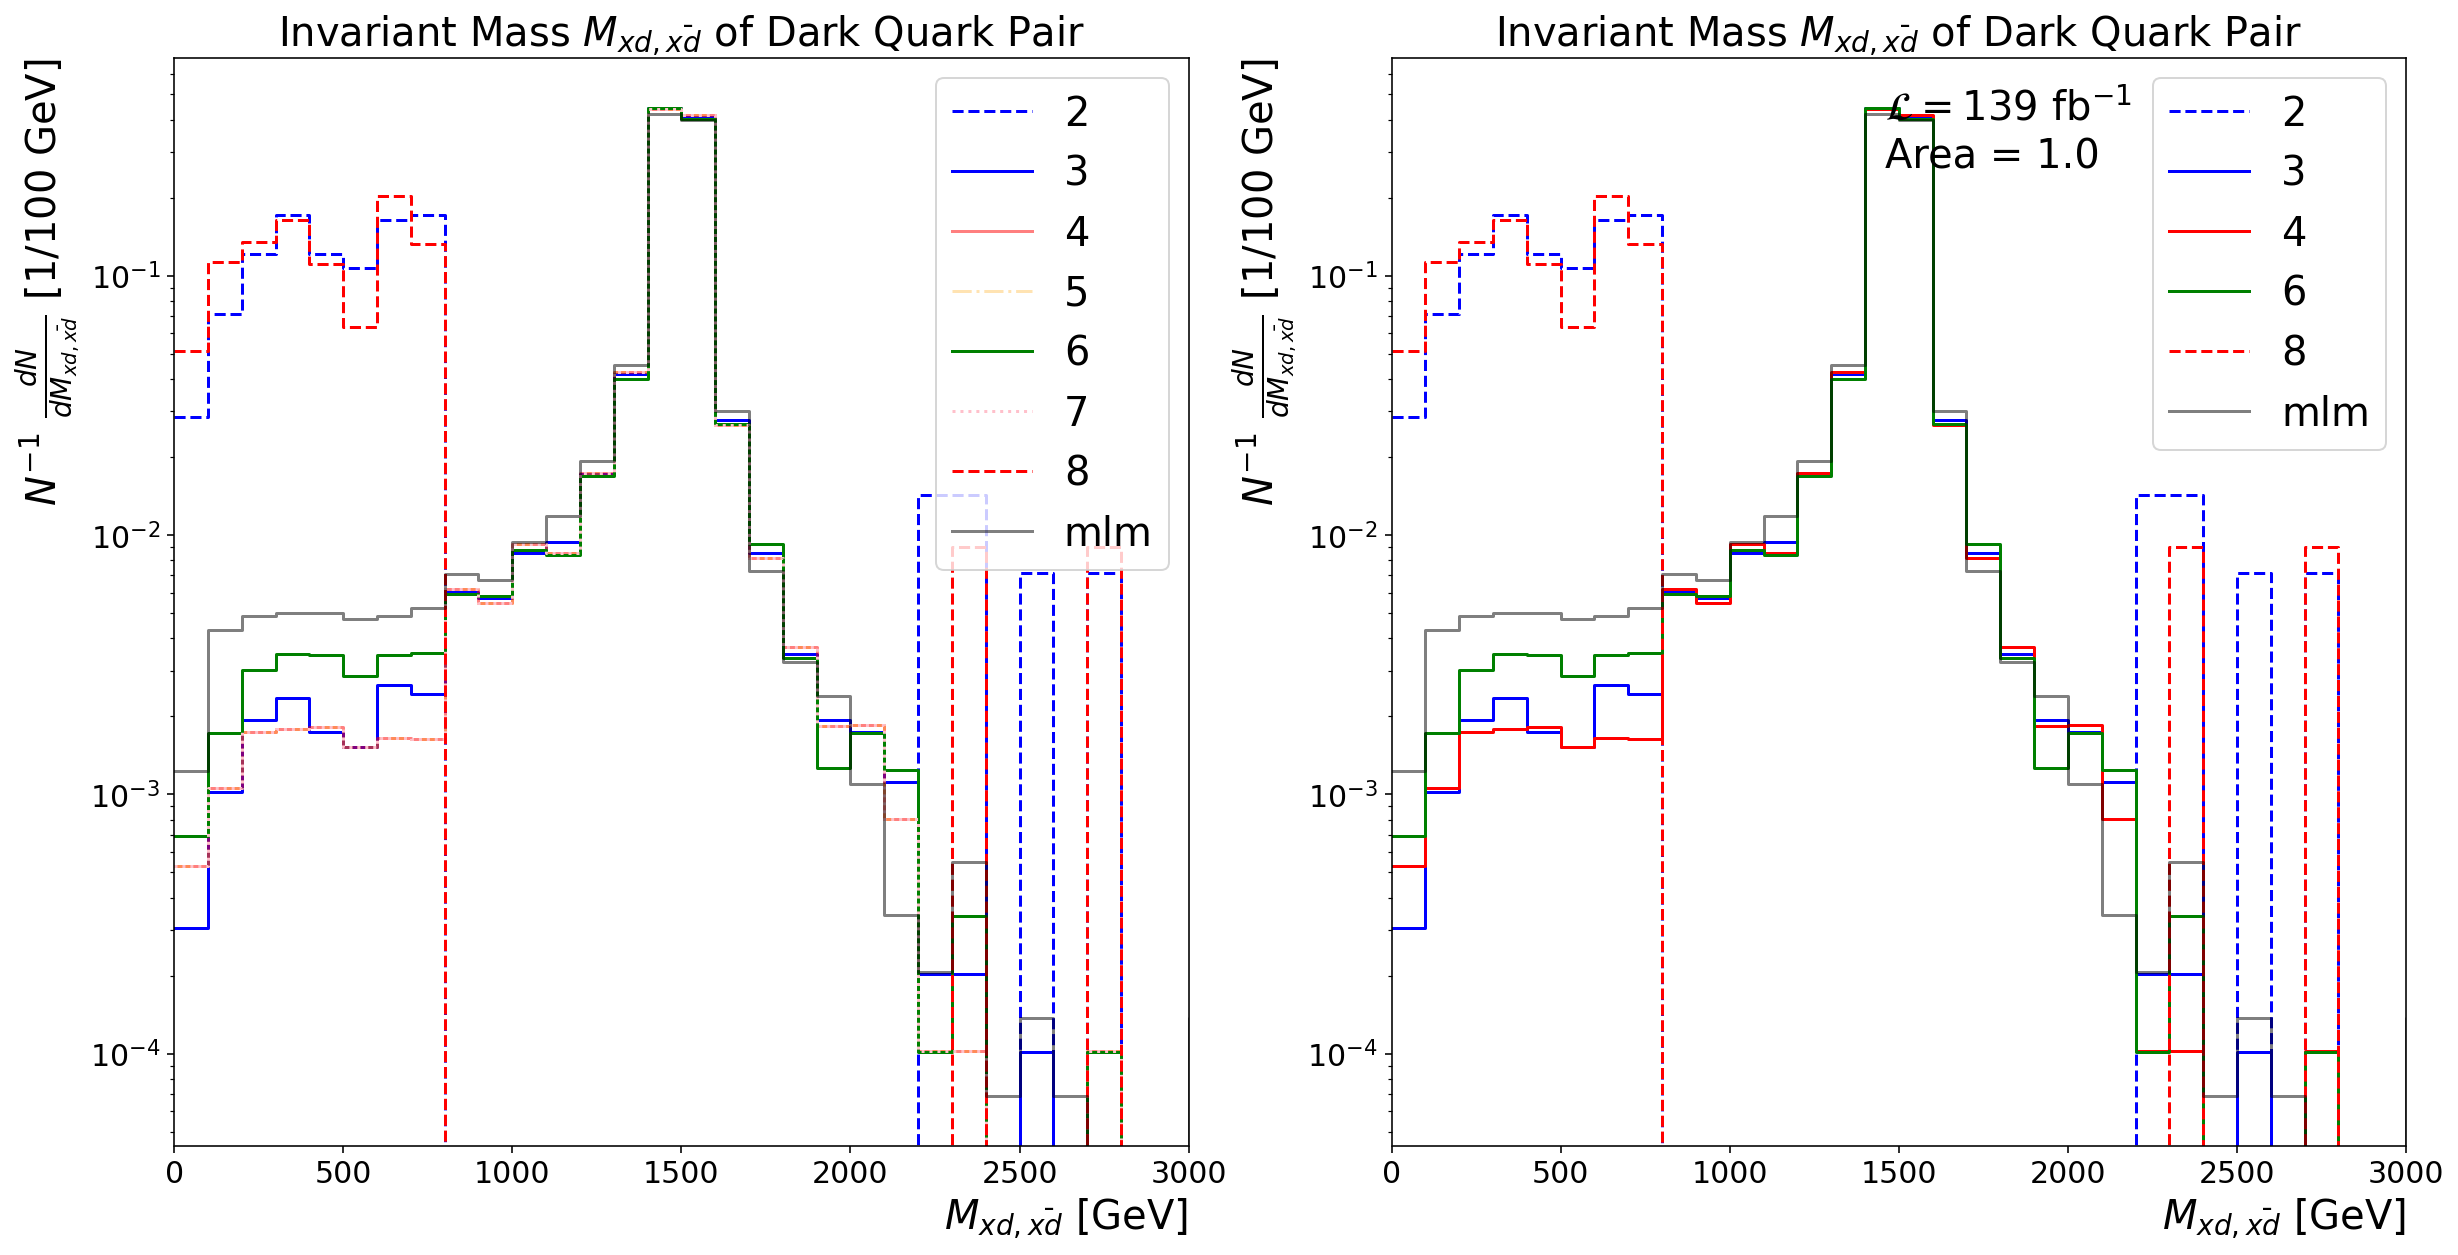

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))
binning = np.linspace(0, 5000, 51)

hist_1, bins_1 = np.histogram(m_xdxdbar_1, bins=binning, weights=list_weight[0])
hist_2, bins_2 = np.histogram(m_xdxdbar_2, bins=binning, weights=list_weight[1])
hist_3, bins_3 = np.histogram(m_xdxdbar_3, bins=binning, weights=list_weight[2])
hist_4, bins_4 = np.histogram(m_xdxdbar_4, bins=binning, weights=list_weight[3])
hist_5, bins_5 = np.histogram(m_xdxdbar_5, bins=binning, weights=list_weight[4])
hist_6, bins_6 = np.histogram(m_xdxdbar_6, bins=binning, weights=list_weight[5])
hist_7, bins_7 = np.histogram(m_xdxdbar_7, bins=binning, weights=list_weight[6])
hist_8, bins_8 = np.histogram(m_xdxdbar_8, bins=binning, weights=list_weight[7])
hist_9, bins_9 = np.histogram(m_xdxdbar_9, bins=binning, weights=list_weight[8])
hist_10, bins_10 = np.histogram(m_xdxdbar_10, bins=binning, weights=list_weight[9])
hist_4_1, bins_4_1 = np.histogram(m_xdxdbar_4_1, bins=binning, weights=list_weight[10])
hist_mlm, bins_mlm = np.histogram(m_xdxdbar_mlm, bins=binning, weights=list_weight[11])


# figure 1
axs[0].step(bins_2[:-1], hist_2/np.sum(hist_2), where='post', color='blue', linestyle='--', label="2")
axs[0].step(bins_3[:-1], hist_3/np.sum(hist_3), where='post', color='blue', label="3")
axs[0].step(bins_4[:-1], hist_4/np.sum(hist_4), where='post', color='red', alpha=0.5, label="4")
axs[0].step(bins_5[:-1], hist_5/np.sum(hist_5), where='post', color='orange', linestyle='-.', alpha=0.3, label="5")
axs[0].step(bins_6[:-1], hist_6/np.sum(hist_6), where='post', color='green', label="6")
axs[0].step(bins_7[:-1], hist_7/np.sum(hist_7), where='post', color='pink', linestyle=':', label="7")
axs[0].step(bins_8[:-1], hist_8/np.sum(hist_8), where='post', color='red', linestyle='--', label="8")
axs[0].step(bins_mlm[:-1], hist_mlm/np.sum(hist_mlm), where='post', color='black', alpha=0.5, label="mlm")
# text
# axs[0].text(1980, 0.01, "$\mathcal{L} = $"+str(LUMINOSITY)+"$\ \mathrm{fb}^{-1}$", fontsize=20)
# axs[0].text(1980, 0.007, "$M_{Z^\prime} = 1500$ GeV", fontsize=20)
# axs[0].text(1980, 0.005, "Area = "+str(np.round(np.sum(hist_4.astype(np.float32)/np.sum(hist_4)),2)), fontsize=20)
# axes setting
axs[0].legend(fontsize=20)
axs[0].set_xlabel("$M_{xd,\\bar{xd}}$ [GeV]", fontsize=20, horizontalalignment='right', x=1)
axs[0].set_ylabel("$N^{-1}\ \\frac{dN}{dM_{xd,\\bar{xd}}}$ [1/100 GeV]", fontsize=20, horizontalalignment='right', y=1)
axs[0].set_title("Invariant Mass $M_{xd,\\bar{xd}}$ of Dark Quark Pair", fontsize=20)
axs[0].set_xlim(0,3000)
axs[0].set_yscale('log')
axs[0].tick_params(axis='both', labelsize=15)


# figure 2
axs[1].step(bins_2[:-1], hist_2/np.sum(hist_2), where='post', color='blue', linestyle='--', label="2")
axs[1].step(bins_3[:-1], hist_3/np.sum(hist_3), where='post', color='blue', label="3")
axs[1].step(bins_4[:-1], hist_4/np.sum(hist_4), where='post', color='red', label="4")
# axs[0].step(bins_5[:-1], hist_5/np.sum(hist_5), where='post', color='orange', linestyle='-.', alpha=0.5, label="5")
axs[1].step(bins_6[:-1], hist_6/np.sum(hist_6), where='post', color='green', label="6")
# axs[0].step(bins_7[:-1], hist_7/np.sum(hist_7), where='post', color='pink', alpha=0.5, label="7")
axs[1].step(bins_8[:-1], hist_8/np.sum(hist_8), where='post', color='red', linestyle='--', label="8")
axs[1].step(bins_mlm[:-1], hist_mlm/np.sum(hist_mlm), where='post', color='black', alpha=0.5, label="mlm")
# text
axs[1].text(1460, 0.4, "$\mathcal{L} = $"+str(LUMINOSITY)+"$\ \mathrm{fb}^{-1}$", fontsize=20)
# axs[1].text(1980, 0.007, "$M_{Z^\prime} = 1500$ GeV", fontsize=20)
axs[1].text(1460, 0.26, "Area = "+str(np.round(np.sum(hist_4.astype(np.float32)/np.sum(hist_4)),2)), fontsize=20)
# axes setting
axs[1].legend(fontsize=20)
axs[1].set_xlabel("$M_{xd,\\bar{xd}}$ [GeV]", fontsize=20, horizontalalignment='right', x=1)
axs[1].set_ylabel("$N^{-1}\ \\frac{dN}{dM_{xd,\\bar{xd}}}$ [1/100 GeV]", fontsize=20, horizontalalignment='right', y=1)
axs[1].set_title("Invariant Mass $M_{xd,\\bar{xd}}$ of Dark Quark Pair", fontsize=20)
axs[1].set_xlim(0,3000)
axs[1].set_yscale('log')
axs[1].tick_params(axis='both', labelsize=15)

### 7-2. Invariant mass $M$

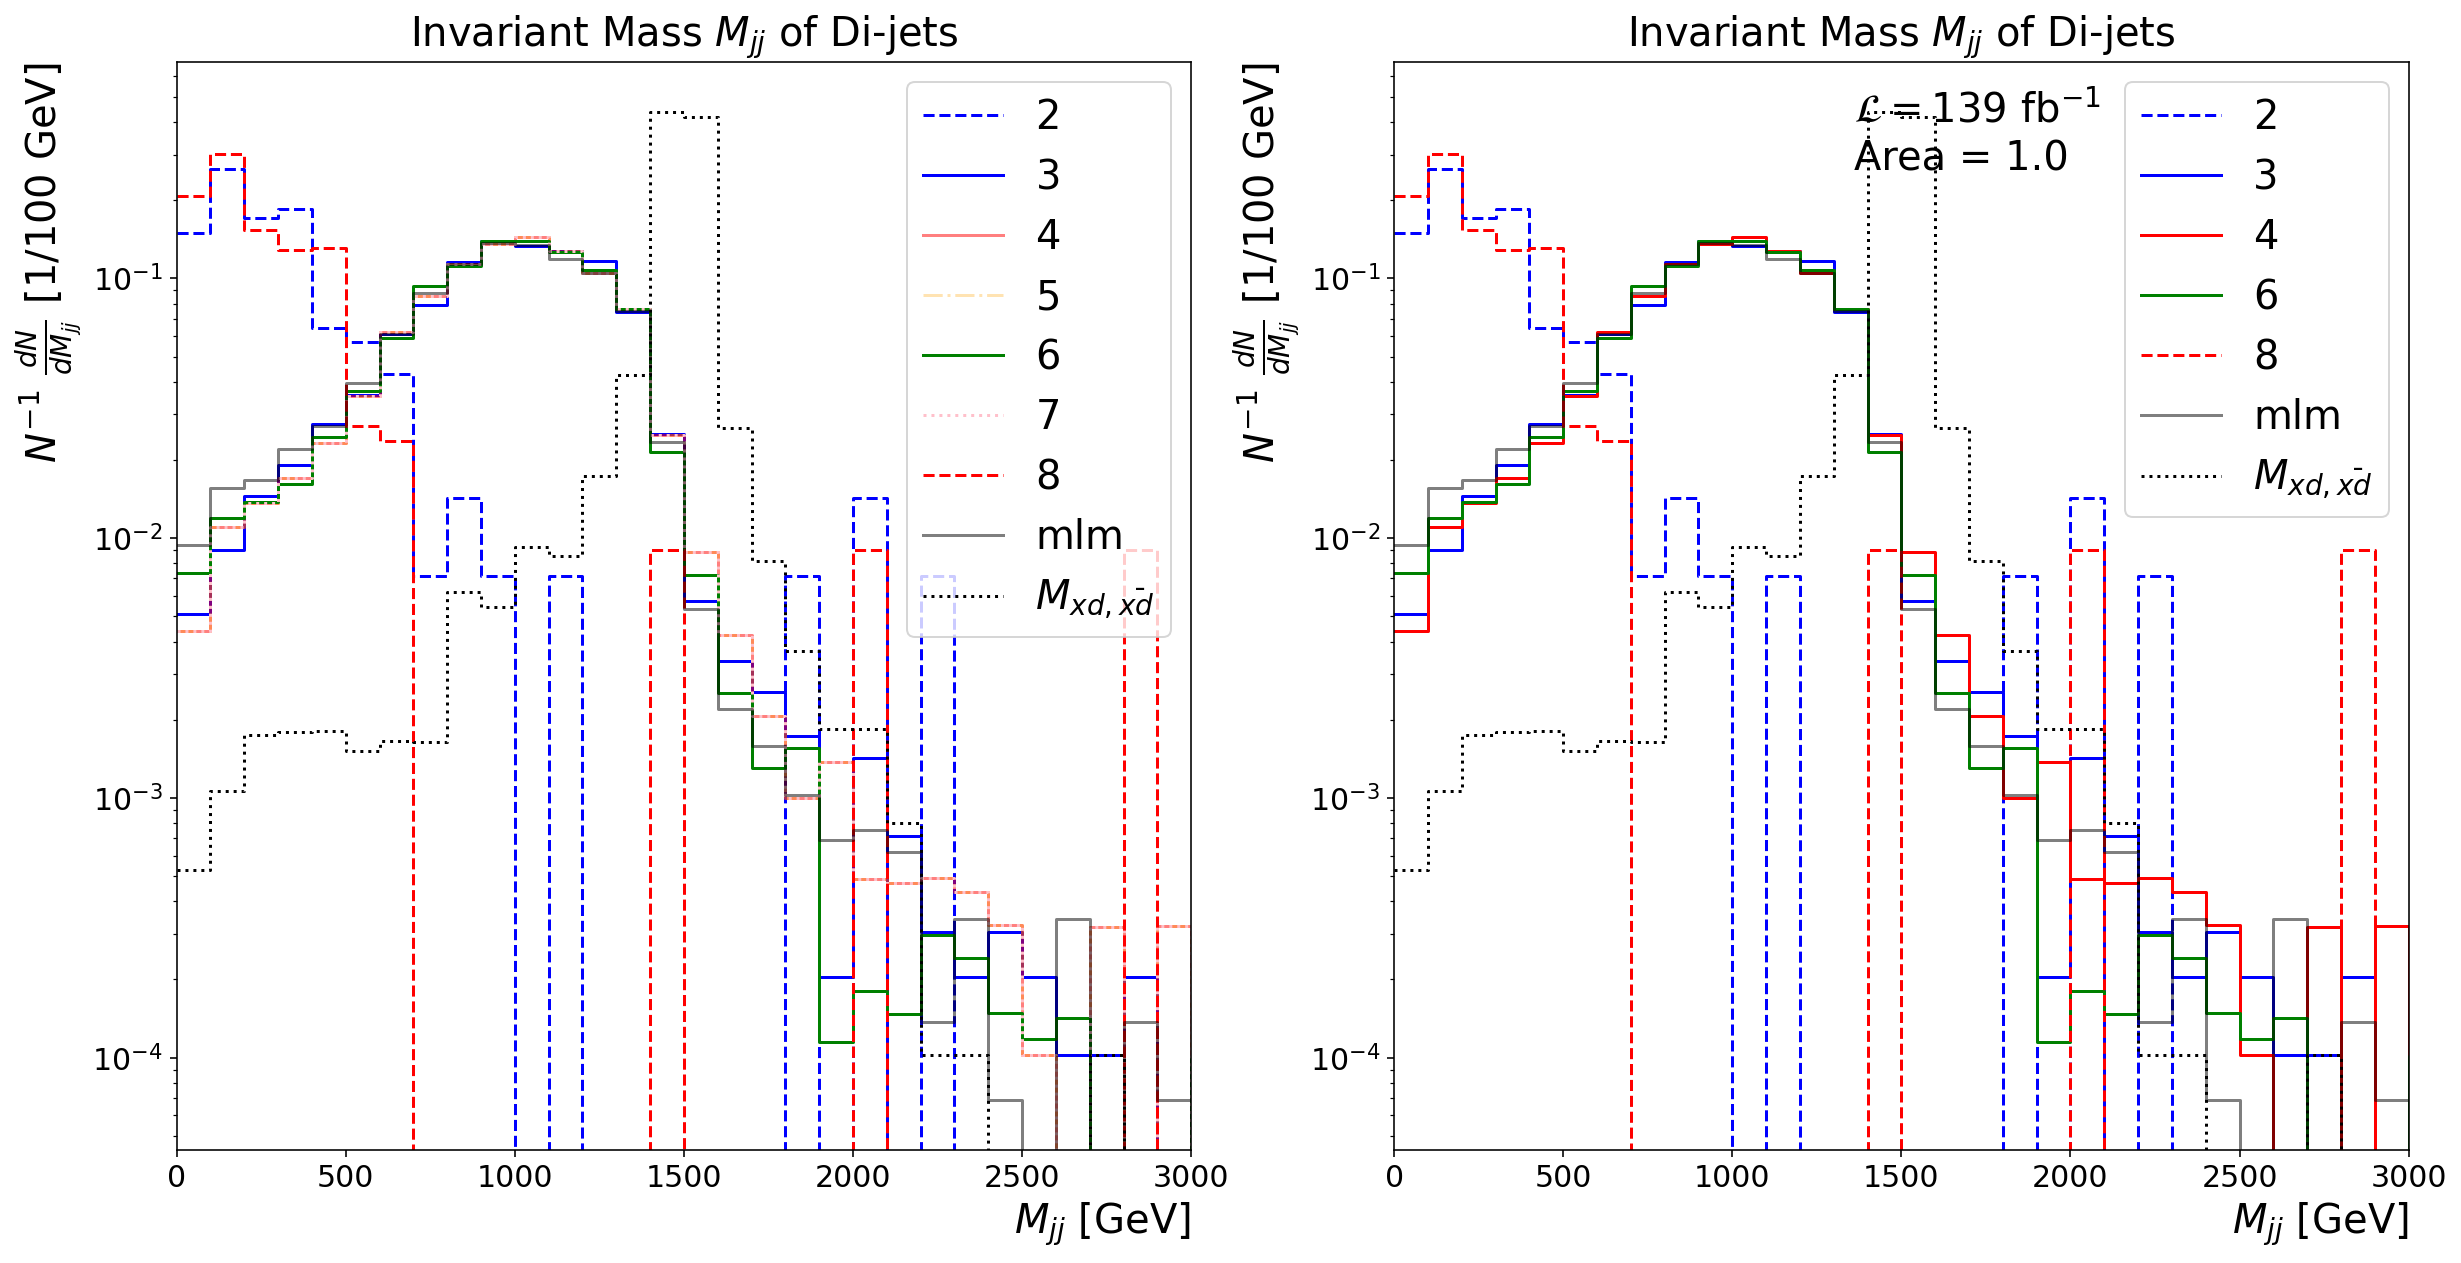

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))
binning = np.linspace(0, 5000, 51)

hist_1, bins_1 = np.histogram(list_truth_results_filterDM_1[0], bins=binning,
                              weights=list_weight[0][list_truth_results_filterDM_1[3]]*LUMINOSITY*1000)
hist_2, bins_2 = np.histogram(list_truth_results_filterDM_2[0], bins=binning,
                              weights=list_weight[1][list_truth_results_filterDM_2[3]]*LUMINOSITY*1000)
hist_3, bins_3 = np.histogram(list_truth_results_filterDM_3[0], bins=binning,
                              weights=list_weight[2][list_truth_results_filterDM_3[3]]*LUMINOSITY*1000)
hist_4, bins_4 = np.histogram(list_truth_results_filterDM_4[0], bins=binning,
                              weights=list_weight[3][list_truth_results_filterDM_4[3]]*LUMINOSITY*1000)
hist_5, bins_5 = np.histogram(list_truth_results_filterDM_5[0], bins=binning,
                              weights=list_weight[4][list_truth_results_filterDM_5[3]]*LUMINOSITY*1000)
hist_6, bins_6 = np.histogram(list_truth_results_filterDM_6[0], bins=binning,
                              weights=list_weight[5][list_truth_results_filterDM_6[3]]*LUMINOSITY*1000)
hist_7, bins_7 = np.histogram(list_truth_results_filterDM_7[0], bins=binning,
                              weights=list_weight[6][list_truth_results_filterDM_7[3]]*LUMINOSITY*1000)
hist_8, bins_8 = np.histogram(list_truth_results_filterDM_8[0], bins=binning,
                              weights=list_weight[7][list_truth_results_filterDM_8[3]]*LUMINOSITY*1000)
hist_9, bins_9 = np.histogram(list_truth_results_filterDM_9[0], bins=binning,
                              weights=list_weight[8][list_truth_results_filterDM_9[3]]*LUMINOSITY*1000)
hist_10, bins_10 = np.histogram(list_truth_results_filterDM_10[0], bins=binning,
                              weights=list_weight[9][list_truth_results_filterDM_10[3]]*LUMINOSITY*1000)
hist_4_1, bins_4_1 = np.histogram(list_truth_results_filterDM_4_1[0], bins=binning,
                              weights=list_weight[10][list_truth_results_filterDM_4_1[3]]*LUMINOSITY*1000)
hist_mlm, bins_mlm = np.histogram(list_truth_results_filterDM_mlm[0], bins=binning,
                              weights=list_weight[11][list_truth_results_filterDM_mlm[3]]*LUMINOSITY*1000)
hist_4_xdxdx, bins_4_xdxdx = np.histogram(m_xdxdbar_4, bins=binning, weights=list_weight[3])


# figure 1
axs[0].step(bins_2[:-1], hist_2/np.sum(hist_2), where='post', color='blue', linestyle='--', label="2")
axs[0].step(bins_3[:-1], hist_3/np.sum(hist_3), where='post', color='blue', label="3")
axs[0].step(bins_4[:-1], hist_4/np.sum(hist_4), where='post', color='red', alpha=0.5, label="4")
axs[0].step(bins_5[:-1], hist_5/np.sum(hist_5), where='post', color='orange', linestyle='-.', alpha=0.3, label="5")
axs[0].step(bins_6[:-1], hist_6/np.sum(hist_6), where='post', color='green', label="6")
axs[0].step(bins_7[:-1], hist_7/np.sum(hist_7), where='post', color='pink', linestyle=':', label="7")
axs[0].step(bins_8[:-1], hist_8/np.sum(hist_8), where='post', color='red', linestyle='--', label="8")
axs[0].step(bins_mlm[:-1], hist_mlm/np.sum(hist_mlm), where='post', color='black', alpha=0.5, label="mlm")
axs[0].step(bins_4_xdxdx[:-1], hist_4_xdxdx/np.sum(hist_4_xdxdx), where='post', color='black',
            linestyle=':', label="$M_{xd,\\bar{xd}}$")
# axes setting
axs[0].legend(fontsize=20)
axs[0].set_xlabel("$M_{jj}$ [GeV]", fontsize=20, horizontalalignment='right', x=1)
axs[0].set_ylabel("$N^{-1}\ \\frac{dN}{dM_{jj}}$ [1/100 GeV]", fontsize=20, horizontalalignment='right', y=1)
axs[0].set_title("Invariant Mass $M_{jj}$ of Di-jets", fontsize=20)
axs[0].set_xlim(0,3000)
axs[0].set_yscale('log')
axs[0].tick_params(axis='both', labelsize=15)


# figure 2
axs[1].step(bins_2[:-1], hist_2/np.sum(hist_2), where='post', color='blue', linestyle='--', label="2")
axs[1].step(bins_3[:-1], hist_3/np.sum(hist_3), where='post', color='blue', label="3")
axs[1].step(bins_4[:-1], hist_4/np.sum(hist_4), where='post', color='red', label="4")
# axs[0].step(bins_5[:-1], hist_5/np.sum(hist_5), where='post', color='orange', linestyle='-.', alpha=0.5, label="5")
axs[1].step(bins_6[:-1], hist_6/np.sum(hist_6), where='post', color='green', label="6")
# axs[0].step(bins_7[:-1], hist_7/np.sum(hist_7), where='post', color='pink', alpha=0.5, label="7")
axs[1].step(bins_8[:-1], hist_8/np.sum(hist_8), where='post', color='red', linestyle='--', label="8")
axs[1].step(bins_mlm[:-1], hist_mlm/np.sum(hist_mlm), where='post', color='black', alpha=0.5, label="mlm")
# text
axs[1].text(1360, 0.4, "$\mathcal{L} = $"+str(LUMINOSITY)+"$\ \mathrm{fb}^{-1}$", fontsize=20)
# axs[1].text(1980, 0.007, "$M_{Z^\prime} = 1500$ GeV", fontsize=20)
axs[1].text(1360, 0.26, "Area = "+str(np.round(np.sum(hist_4.astype(np.float32)/np.sum(hist_4)),2)), fontsize=20)
axs[1].step(bins_4_xdxdx[:-1], hist_4_xdxdx/np.sum(hist_4_xdxdx), where='post', color='black',
            linestyle=':', label="$M_{xd,\\bar{xd}}$")
# axes setting
axs[1].legend(fontsize=20)
axs[1].set_xlabel("$M_{jj}$ [GeV]", fontsize=20, horizontalalignment='right', x=1)
axs[1].set_ylabel("$N^{-1}\ \\frac{dN}{dM_{jj}}$ [1/100 GeV]", fontsize=20, horizontalalignment='right', y=1)
axs[1].set_title("Invariant Mass $M_{jj}$ of Di-jets", fontsize=20)
axs[1].set_xlim(0,3000)
axs[1].set_yscale('log')
axs[1].tick_params(axis='both', labelsize=15)

### 7-3. Transverse mass $M_T$

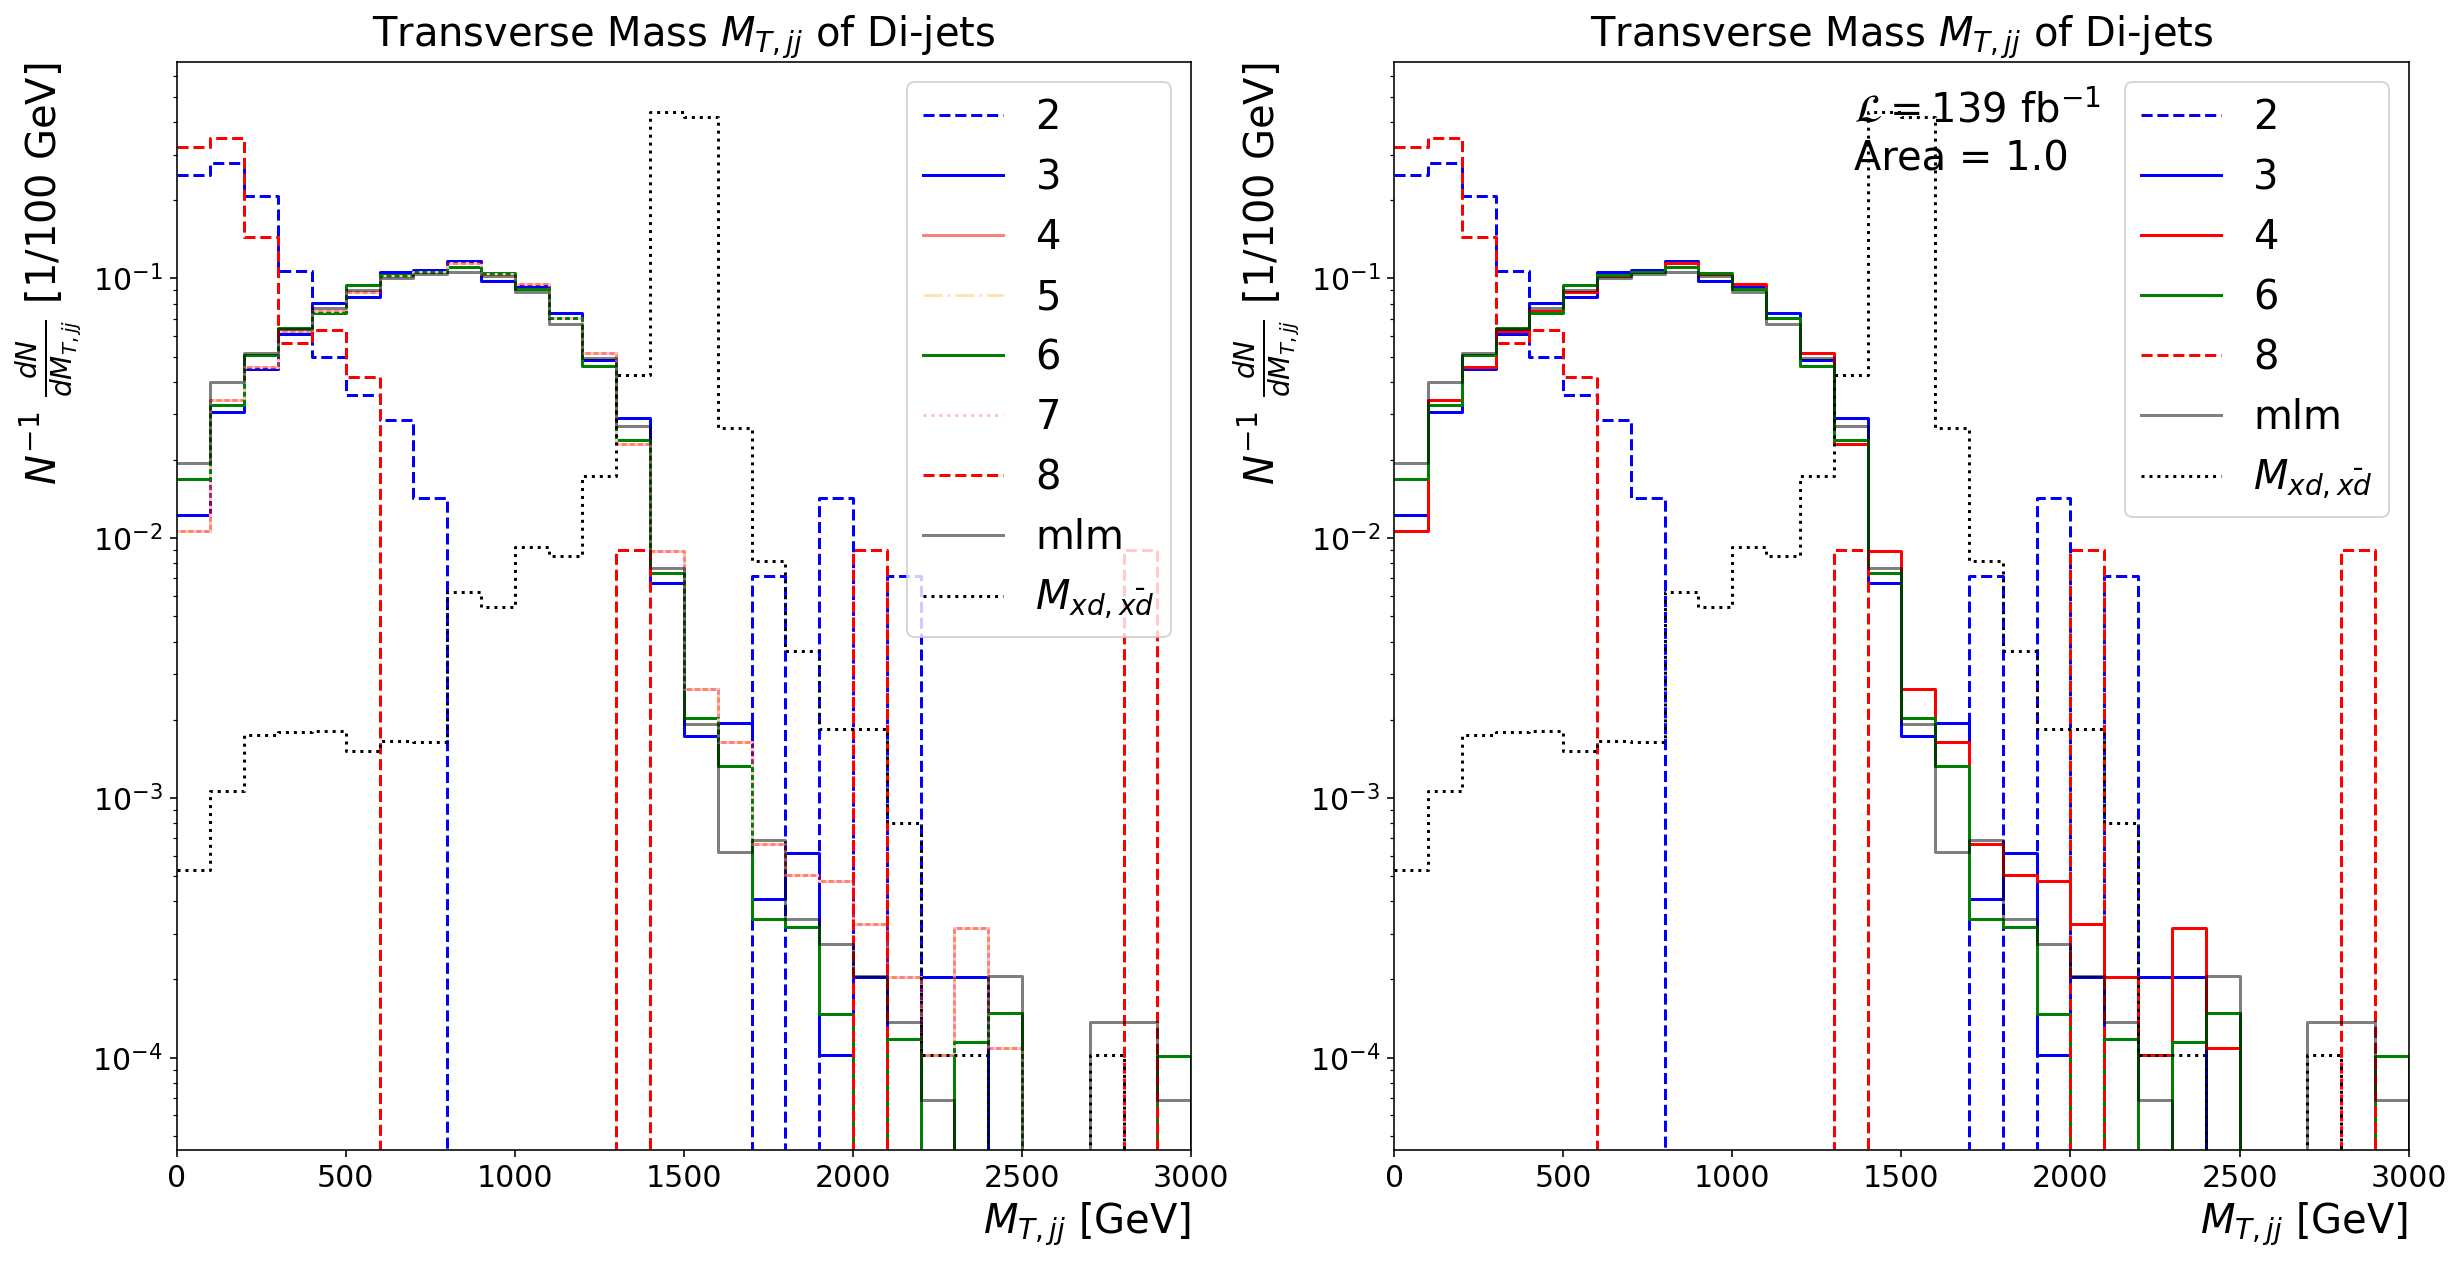

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))
binning = np.linspace(0, 5000, 51)

hist_1, bins_1 = np.histogram(list_truth_results_filterDM_1[1], bins=binning,
                              weights=list_weight[0][list_truth_results_filterDM_1[3]]*LUMINOSITY*1000)
hist_2, bins_2 = np.histogram(list_truth_results_filterDM_2[1], bins=binning,
                              weights=list_weight[1][list_truth_results_filterDM_2[3]]*LUMINOSITY*1000)
hist_3, bins_3 = np.histogram(list_truth_results_filterDM_3[1], bins=binning,
                              weights=list_weight[2][list_truth_results_filterDM_3[3]]*LUMINOSITY*1000)
hist_4, bins_4 = np.histogram(list_truth_results_filterDM_4[1], bins=binning,
                              weights=list_weight[3][list_truth_results_filterDM_4[3]]*LUMINOSITY*1000)
hist_5, bins_5 = np.histogram(list_truth_results_filterDM_5[1], bins=binning,
                              weights=list_weight[4][list_truth_results_filterDM_5[3]]*LUMINOSITY*1000)
hist_6, bins_6 = np.histogram(list_truth_results_filterDM_6[1], bins=binning,
                              weights=list_weight[5][list_truth_results_filterDM_6[3]]*LUMINOSITY*1000)
hist_7, bins_7 = np.histogram(list_truth_results_filterDM_7[1], bins=binning,
                              weights=list_weight[6][list_truth_results_filterDM_7[3]]*LUMINOSITY*1000)
hist_8, bins_8 = np.histogram(list_truth_results_filterDM_8[1], bins=binning,
                              weights=list_weight[7][list_truth_results_filterDM_8[3]]*LUMINOSITY*1000)
hist_9, bins_9 = np.histogram(list_truth_results_filterDM_9[1], bins=binning,
                              weights=list_weight[8][list_truth_results_filterDM_9[3]]*LUMINOSITY*1000)
hist_10, bins_10 = np.histogram(list_truth_results_filterDM_10[1], bins=binning,
                              weights=list_weight[9][list_truth_results_filterDM_10[3]]*LUMINOSITY*1000)
hist_4_1, bins_4_1 = np.histogram(list_truth_results_filterDM_4_1[1], bins=binning,
                              weights=list_weight[10][list_truth_results_filterDM_4_1[3]]*LUMINOSITY*1000)
hist_mlm, bins_mlm = np.histogram(list_truth_results_filterDM_mlm[1], bins=binning,
                              weights=list_weight[11][list_truth_results_filterDM_mlm[3]]*LUMINOSITY*1000)
hist_4_xdxdx, bins_4_xdxdx = np.histogram(m_xdxdbar_4, bins=binning, weights=list_weight[3])


# figure 1
axs[0].step(bins_2[:-1], hist_2/np.sum(hist_2), where='post', color='blue', linestyle='--', label="2")
axs[0].step(bins_3[:-1], hist_3/np.sum(hist_3), where='post', color='blue', label="3")
axs[0].step(bins_4[:-1], hist_4/np.sum(hist_4), where='post', color='red', alpha=0.5, label="4")
axs[0].step(bins_5[:-1], hist_5/np.sum(hist_5), where='post', color='orange', linestyle='-.', alpha=0.3, label="5")
axs[0].step(bins_6[:-1], hist_6/np.sum(hist_6), where='post', color='green', label="6")
axs[0].step(bins_7[:-1], hist_7/np.sum(hist_7), where='post', color='pink', linestyle=':', label="7")
axs[0].step(bins_8[:-1], hist_8/np.sum(hist_8), where='post', color='red', linestyle='--', label="8")
axs[0].step(bins_mlm[:-1], hist_mlm/np.sum(hist_mlm), where='post', color='black', alpha=0.5, label="mlm")
axs[0].step(bins_4_xdxdx[:-1], hist_4_xdxdx/np.sum(hist_4_xdxdx), where='post', color='black',
            linestyle=':', label="$M_{xd,\\bar{xd}}$")
# axes setting
axs[0].legend(fontsize=20)
axs[0].set_xlabel("$M_{T,jj}$ [GeV]", fontsize=20, horizontalalignment='right', x=1)
axs[0].set_ylabel("$N^{-1}\ \\frac{dN}{dM_{T,jj}}$ [1/100 GeV]", fontsize=20, horizontalalignment='right', y=1)
axs[0].set_title("Transverse Mass $M_{T,jj}$ of Di-jets", fontsize=20)
axs[0].set_xlim(0,3000)
axs[0].set_yscale('log')
axs[0].tick_params(axis='both', labelsize=15)


# figure 2
axs[1].step(bins_2[:-1], hist_2/np.sum(hist_2), where='post', color='blue', linestyle='--', label="2")
axs[1].step(bins_3[:-1], hist_3/np.sum(hist_3), where='post', color='blue', label="3")
axs[1].step(bins_4[:-1], hist_4/np.sum(hist_4), where='post', color='red', label="4")
# axs[0].step(bins_5[:-1], hist_5/np.sum(hist_5), where='post', color='orange', linestyle='-.', alpha=0.5, label="5")
axs[1].step(bins_6[:-1], hist_6/np.sum(hist_6), where='post', color='green', label="6")
# axs[0].step(bins_7[:-1], hist_7/np.sum(hist_7), where='post', color='pink', alpha=0.5, label="7")
axs[1].step(bins_8[:-1], hist_8/np.sum(hist_8), where='post', color='red', linestyle='--', label="8")
axs[1].step(bins_mlm[:-1], hist_mlm/np.sum(hist_mlm), where='post', color='black', alpha=0.5, label="mlm")
# text
axs[1].text(1360, 0.4, "$\mathcal{L} = $"+str(LUMINOSITY)+"$\ \mathrm{fb}^{-1}$", fontsize=20)
# axs[1].text(1980, 0.007, "$M_{Z^\prime} = 1500$ GeV", fontsize=20)
axs[1].text(1360, 0.26, "Area = "+str(np.round(np.sum(hist_4.astype(np.float32)/np.sum(hist_4)),2)), fontsize=20)
axs[1].step(bins_4_xdxdx[:-1], hist_4_xdxdx/np.sum(hist_4_xdxdx), where='post', color='black',
            linestyle=':', label="$M_{xd,\\bar{xd}}$")
# axes setting
axs[1].legend(fontsize=20)
axs[1].set_xlabel("$M_{T,jj}$ [GeV]", fontsize=20, horizontalalignment='right', x=1)
axs[1].set_ylabel("$N^{-1}\ \\frac{dN}{dM_{T,jj}}$ [1/100 GeV]", fontsize=20, horizontalalignment='right', y=1)
axs[1].set_title("Transverse Mass $M_{T,jj}$ of Di-jets", fontsize=20)
axs[1].set_xlim(0,3000)
axs[1].set_yscale('log')
axs[1].tick_params(axis='both', labelsize=15)

### 7-4. Transverse mass $m_T$

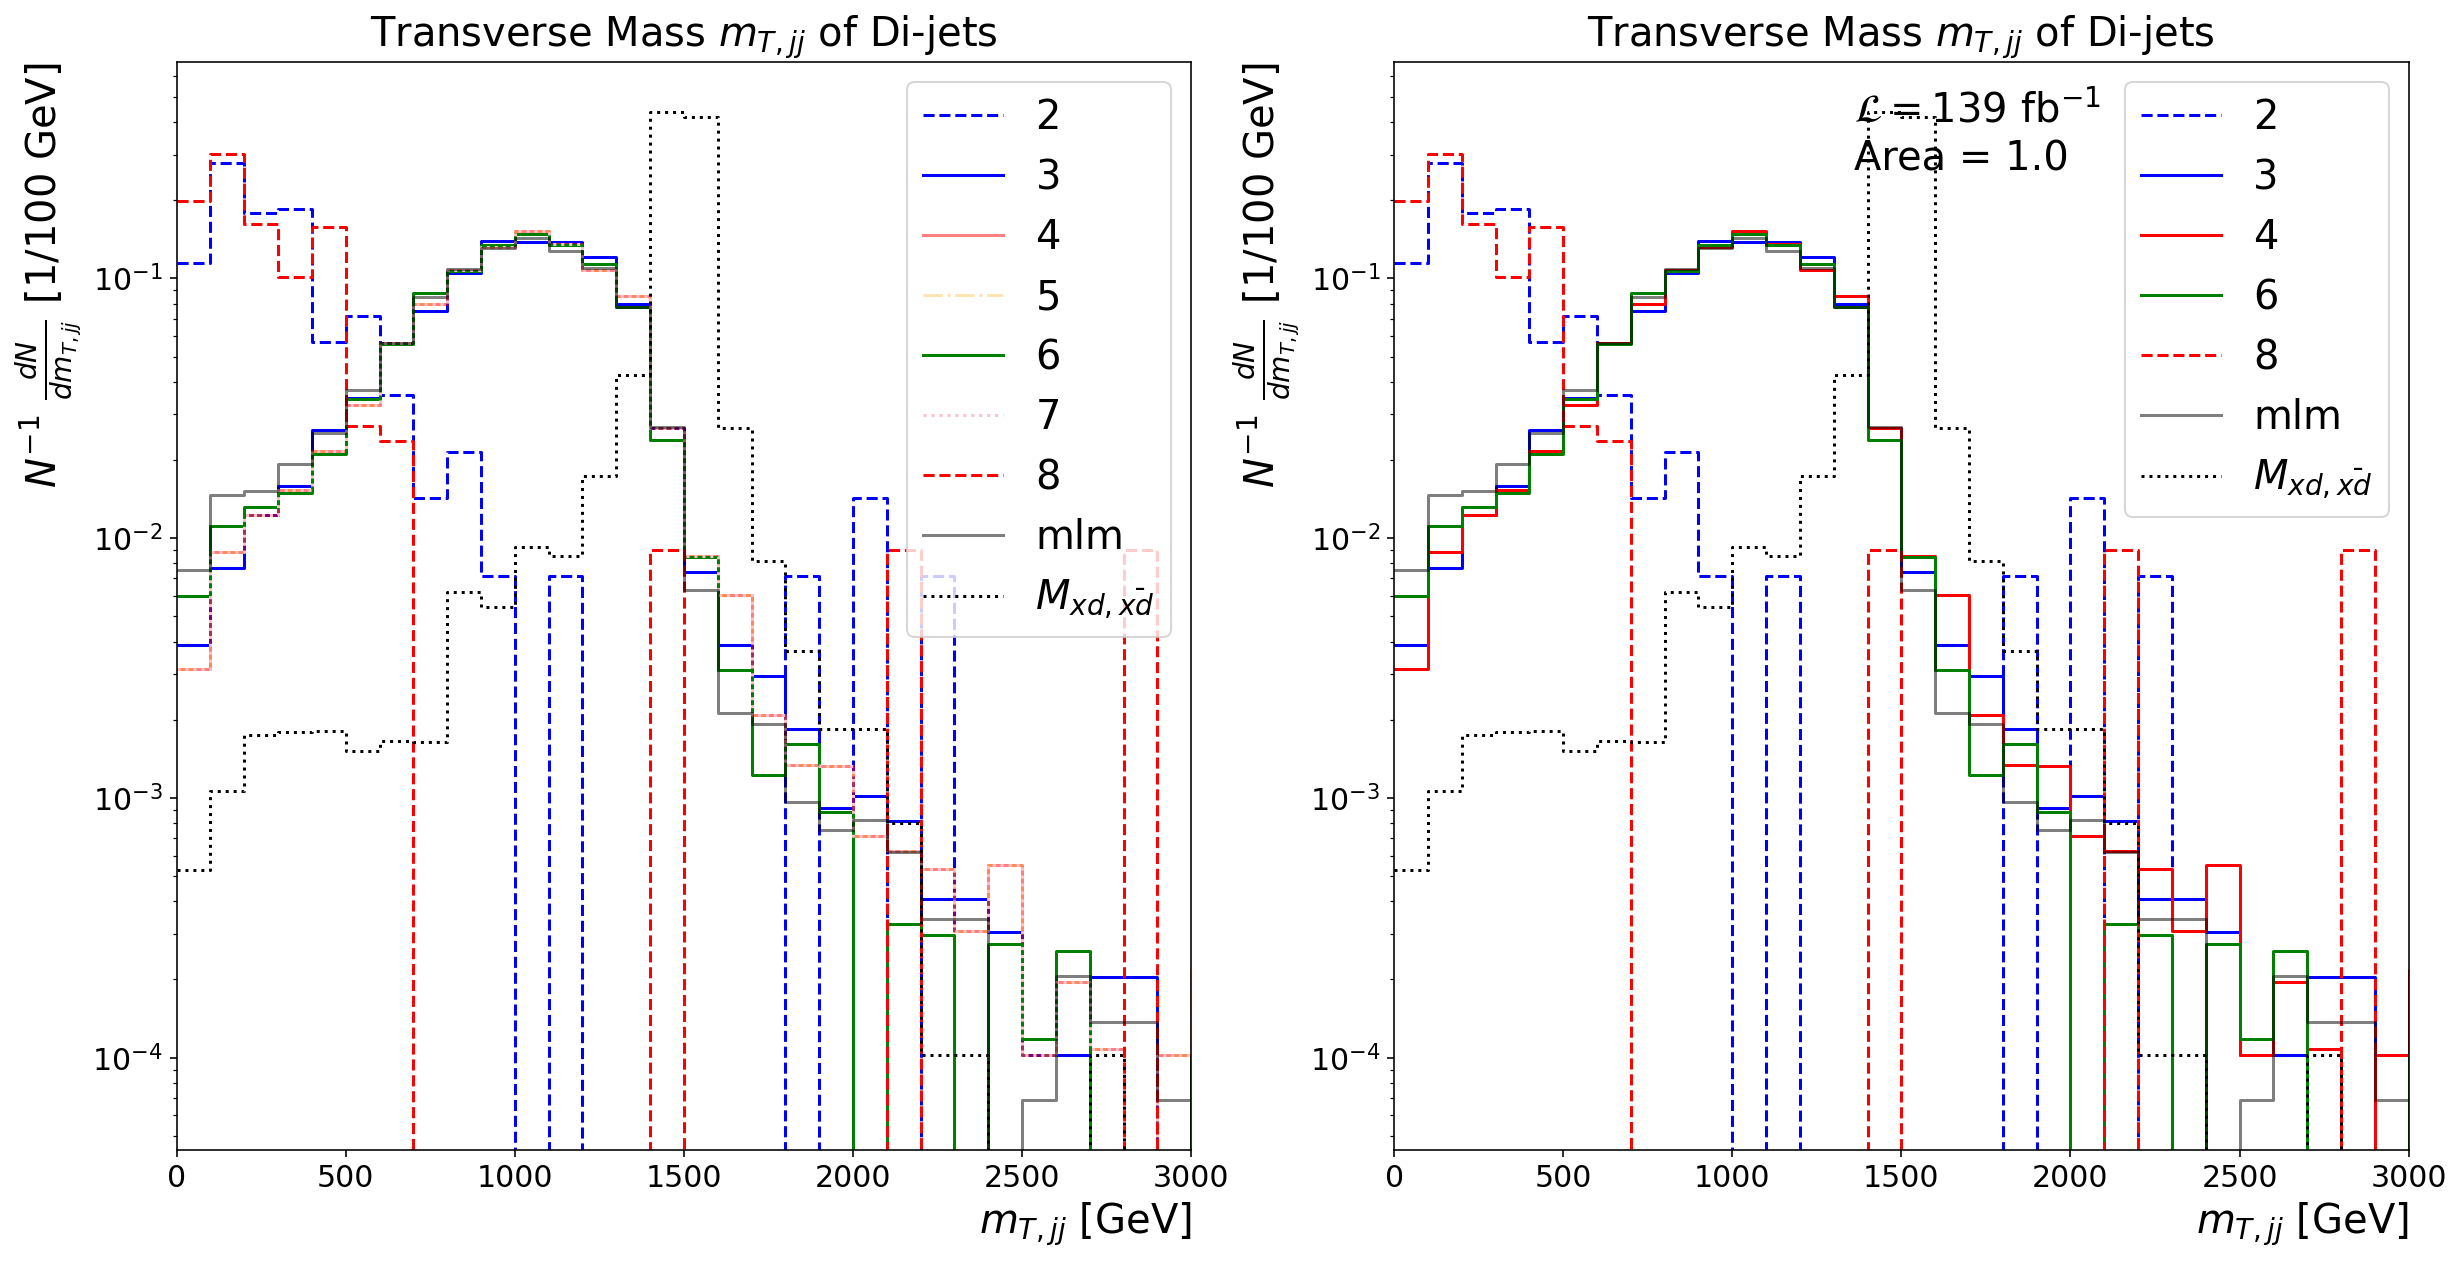

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))
binning = np.linspace(0, 5000, 51)

hist_1, bins_1 = np.histogram(list_truth_results_filterDM_1[2], bins=binning,
                              weights=list_weight[0][list_truth_results_filterDM_1[3]]*LUMINOSITY*1000)
hist_2, bins_2 = np.histogram(list_truth_results_filterDM_2[2], bins=binning,
                              weights=list_weight[1][list_truth_results_filterDM_2[3]]*LUMINOSITY*1000)
hist_3, bins_3 = np.histogram(list_truth_results_filterDM_3[2], bins=binning,
                              weights=list_weight[2][list_truth_results_filterDM_3[3]]*LUMINOSITY*1000)
hist_4, bins_4 = np.histogram(list_truth_results_filterDM_4[2], bins=binning,
                              weights=list_weight[3][list_truth_results_filterDM_4[3]]*LUMINOSITY*1000)
hist_5, bins_5 = np.histogram(list_truth_results_filterDM_5[2], bins=binning,
                              weights=list_weight[4][list_truth_results_filterDM_5[3]]*LUMINOSITY*1000)
hist_6, bins_6 = np.histogram(list_truth_results_filterDM_6[2], bins=binning,
                              weights=list_weight[5][list_truth_results_filterDM_6[3]]*LUMINOSITY*1000)
hist_7, bins_7 = np.histogram(list_truth_results_filterDM_7[2], bins=binning,
                              weights=list_weight[6][list_truth_results_filterDM_7[3]]*LUMINOSITY*1000)
hist_8, bins_8 = np.histogram(list_truth_results_filterDM_8[2], bins=binning,
                              weights=list_weight[7][list_truth_results_filterDM_8[3]]*LUMINOSITY*1000)
hist_9, bins_9 = np.histogram(list_truth_results_filterDM_9[2], bins=binning,
                              weights=list_weight[8][list_truth_results_filterDM_9[3]]*LUMINOSITY*1000)
hist_10, bins_10 = np.histogram(list_truth_results_filterDM_10[2], bins=binning,
                              weights=list_weight[9][list_truth_results_filterDM_10[3]]*LUMINOSITY*1000)
hist_4_1, bins_4_1 = np.histogram(list_truth_results_filterDM_4_1[2], bins=binning,
                              weights=list_weight[10][list_truth_results_filterDM_4_1[3]]*LUMINOSITY*1000)
hist_mlm, bins_mlm = np.histogram(list_truth_results_filterDM_mlm[2], bins=binning,
                              weights=list_weight[11][list_truth_results_filterDM_mlm[3]]*LUMINOSITY*1000)
hist_4_xdxdx, bins_4_xdxdx = np.histogram(m_xdxdbar_4, bins=binning, weights=list_weight[3])


# figure 1
axs[0].step(bins_2[:-1], hist_2/np.sum(hist_2), where='post', color='blue', linestyle='--', label="2")
axs[0].step(bins_3[:-1], hist_3/np.sum(hist_3), where='post', color='blue', label="3")
axs[0].step(bins_4[:-1], hist_4/np.sum(hist_4), where='post', color='red', alpha=0.5, label="4")
axs[0].step(bins_5[:-1], hist_5/np.sum(hist_5), where='post', color='orange', linestyle='-.', alpha=0.3, label="5")
axs[0].step(bins_6[:-1], hist_6/np.sum(hist_6), where='post', color='green', label="6")
axs[0].step(bins_7[:-1], hist_7/np.sum(hist_7), where='post', color='pink', linestyle=':', label="7")
axs[0].step(bins_8[:-1], hist_8/np.sum(hist_8), where='post', color='red', linestyle='--', label="8")
axs[0].step(bins_mlm[:-1], hist_mlm/np.sum(hist_mlm), where='post', color='black', alpha=0.5, label="mlm")
axs[0].step(bins_4_xdxdx[:-1], hist_4_xdxdx/np.sum(hist_4_xdxdx), where='post', color='black',
            linestyle=':', label="$M_{xd,\\bar{xd}}$")
# axes setting
axs[0].legend(fontsize=20)
axs[0].set_xlabel("$m_{T,jj}$ [GeV]", fontsize=20, horizontalalignment='right', x=1)
axs[0].set_ylabel("$N^{-1}\ \\frac{dN}{dm_{T,jj}}$ [1/100 GeV]", fontsize=20, horizontalalignment='right', y=1)
axs[0].set_title("Transverse Mass $m_{T,jj}$ of Di-jets", fontsize=20)
axs[0].set_xlim(0,3000)
axs[0].set_yscale('log')
axs[0].tick_params(axis='both', labelsize=15)


# figure 2
axs[1].step(bins_2[:-1], hist_2/np.sum(hist_2), where='post', color='blue', linestyle='--', label="2")
axs[1].step(bins_3[:-1], hist_3/np.sum(hist_3), where='post', color='blue', label="3")
axs[1].step(bins_4[:-1], hist_4/np.sum(hist_4), where='post', color='red', label="4")
# axs[0].step(bins_5[:-1], hist_5/np.sum(hist_5), where='post', color='orange', linestyle='-.', alpha=0.5, label="5")
axs[1].step(bins_6[:-1], hist_6/np.sum(hist_6), where='post', color='green', label="6")
# axs[0].step(bins_7[:-1], hist_7/np.sum(hist_7), where='post', color='pink', alpha=0.5, label="7")
axs[1].step(bins_8[:-1], hist_8/np.sum(hist_8), where='post', color='red', linestyle='--', label="8")
axs[1].step(bins_mlm[:-1], hist_mlm/np.sum(hist_mlm), where='post', color='black', alpha=0.5, label="mlm")
# text
axs[1].text(1360, 0.4, "$\mathcal{L} = $"+str(LUMINOSITY)+"$\ \mathrm{fb}^{-1}$", fontsize=20)
# axs[1].text(1980, 0.007, "$M_{Z^\prime} = 1500$ GeV", fontsize=20)
axs[1].text(1360, 0.26, "Area = "+str(np.round(np.sum(hist_4.astype(np.float32)/np.sum(hist_4)),2)), fontsize=20)
axs[1].step(bins_4_xdxdx[:-1], hist_4_xdxdx/np.sum(hist_4_xdxdx), where='post', color='black',
            linestyle=':', label="$M_{xd,\\bar{xd}}$")
# axes setting
axs[1].legend(fontsize=20)
axs[1].set_xlabel("$m_{T,jj}$ [GeV]", fontsize=20, horizontalalignment='right', x=1)
axs[1].set_ylabel("$N^{-1}\ \\frac{dN}{dm_{T,jj}}$ [1/100 GeV]", fontsize=20, horizontalalignment='right', y=1)
axs[1].set_title("Transverse Mass $m_{T,jj}$ of Di-jets", fontsize=20)
axs[1].set_xlim(0,3000)
axs[1].set_yscale('log')
axs[1].tick_params(axis='both', labelsize=15)

### 7-5. Leading jet $p_T$

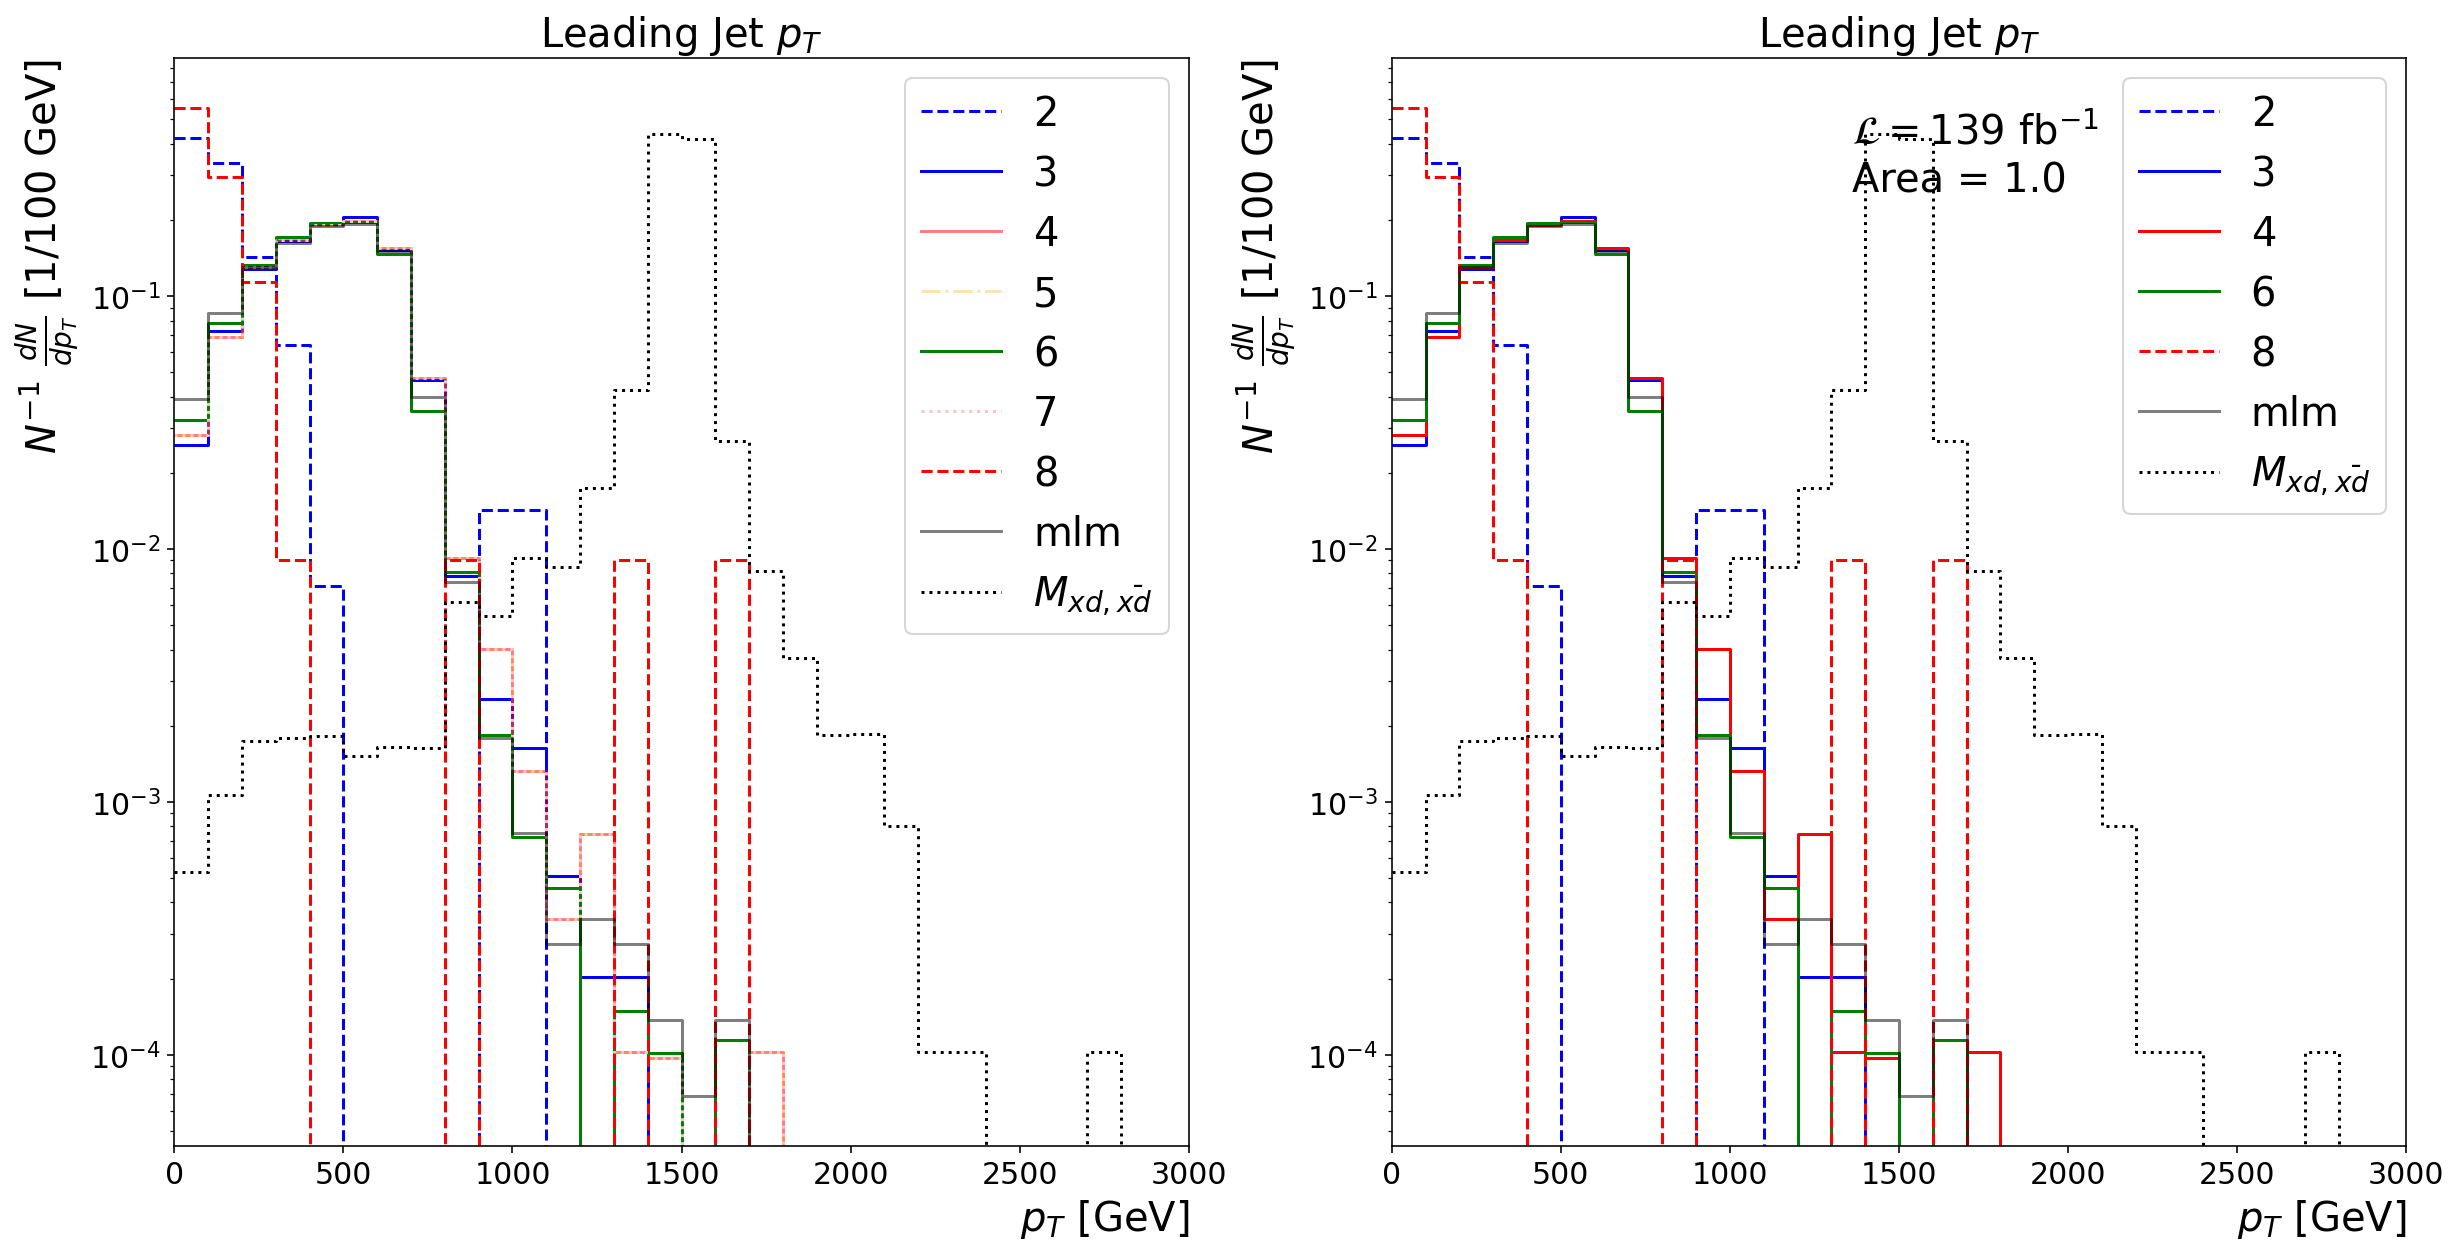

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))
binning = np.linspace(0, 5000, 51)

hist_1, bins_1 = np.histogram(list_truth_results_filterDM_1[4], bins=binning,
                              weights=list_weight[0][list_truth_results_filterDM_1[3]]*LUMINOSITY*1000)
hist_2, bins_2 = np.histogram(list_truth_results_filterDM_2[4], bins=binning,
                              weights=list_weight[1][list_truth_results_filterDM_2[3]]*LUMINOSITY*1000)
hist_3, bins_3 = np.histogram(list_truth_results_filterDM_3[4], bins=binning,
                              weights=list_weight[2][list_truth_results_filterDM_3[3]]*LUMINOSITY*1000)
hist_4, bins_4 = np.histogram(list_truth_results_filterDM_4[4], bins=binning,
                              weights=list_weight[3][list_truth_results_filterDM_4[3]]*LUMINOSITY*1000)
hist_5, bins_5 = np.histogram(list_truth_results_filterDM_5[4], bins=binning,
                              weights=list_weight[4][list_truth_results_filterDM_5[3]]*LUMINOSITY*1000)
hist_6, bins_6 = np.histogram(list_truth_results_filterDM_6[4], bins=binning,
                              weights=list_weight[5][list_truth_results_filterDM_6[3]]*LUMINOSITY*1000)
hist_7, bins_7 = np.histogram(list_truth_results_filterDM_7[4], bins=binning,
                              weights=list_weight[6][list_truth_results_filterDM_7[3]]*LUMINOSITY*1000)
hist_8, bins_8 = np.histogram(list_truth_results_filterDM_8[4], bins=binning,
                              weights=list_weight[7][list_truth_results_filterDM_8[3]]*LUMINOSITY*1000)
hist_9, bins_9 = np.histogram(list_truth_results_filterDM_9[4], bins=binning,
                              weights=list_weight[8][list_truth_results_filterDM_9[3]]*LUMINOSITY*1000)
hist_10, bins_10 = np.histogram(list_truth_results_filterDM_10[4], bins=binning,
                              weights=list_weight[9][list_truth_results_filterDM_10[3]]*LUMINOSITY*1000)
hist_4_1, bins_4_1 = np.histogram(list_truth_results_filterDM_4_1[4], bins=binning,
                              weights=list_weight[10][list_truth_results_filterDM_4_1[3]]*LUMINOSITY*1000)
hist_mlm, bins_mlm = np.histogram(list_truth_results_filterDM_mlm[4], bins=binning,
                              weights=list_weight[11][list_truth_results_filterDM_mlm[3]]*LUMINOSITY*1000)
hist_4_xdxdx, bins_4_xdxdx = np.histogram(m_xdxdbar_4, bins=binning, weights=list_weight[3])


# figure 1
axs[0].step(bins_2[:-1], hist_2/np.sum(hist_2), where='post', color='blue', linestyle='--', label="2")
axs[0].step(bins_3[:-1], hist_3/np.sum(hist_3), where='post', color='blue', label="3")
axs[0].step(bins_4[:-1], hist_4/np.sum(hist_4), where='post', color='red', alpha=0.5, label="4")
axs[0].step(bins_5[:-1], hist_5/np.sum(hist_5), where='post', color='orange', linestyle='-.', alpha=0.3, label="5")
axs[0].step(bins_6[:-1], hist_6/np.sum(hist_6), where='post', color='green', label="6")
axs[0].step(bins_7[:-1], hist_7/np.sum(hist_7), where='post', color='pink', linestyle=':', label="7")
axs[0].step(bins_8[:-1], hist_8/np.sum(hist_8), where='post', color='red', linestyle='--', label="8")
axs[0].step(bins_mlm[:-1], hist_mlm/np.sum(hist_mlm), where='post', color='black', alpha=0.5, label="mlm")
axs[0].step(bins_4_xdxdx[:-1], hist_4_xdxdx/np.sum(hist_4_xdxdx), where='post', color='black',
            linestyle=':', label="$M_{xd,\\bar{xd}}$")
# axes setting
axs[0].legend(fontsize=20)
axs[0].set_xlabel("$p_T$ [GeV]", fontsize=20, horizontalalignment='right', x=1)
axs[0].set_ylabel("$N^{-1}\ \\frac{dN}{dp_T}$ [1/100 GeV]", fontsize=20, horizontalalignment='right', y=1)
axs[0].set_title("Leading Jet $p_T$", fontsize=20)
axs[0].set_xlim(0,3000)
axs[0].set_yscale('log')
axs[0].tick_params(axis='both', labelsize=15)


# figure 2
axs[1].step(bins_2[:-1], hist_2/np.sum(hist_2), where='post', color='blue', linestyle='--', label="2")
axs[1].step(bins_3[:-1], hist_3/np.sum(hist_3), where='post', color='blue', label="3")
axs[1].step(bins_4[:-1], hist_4/np.sum(hist_4), where='post', color='red', label="4")
# axs[0].step(bins_5[:-1], hist_5/np.sum(hist_5), where='post', color='orange', linestyle='-.', alpha=0.5, label="5")
axs[1].step(bins_6[:-1], hist_6/np.sum(hist_6), where='post', color='green', label="6")
# axs[0].step(bins_7[:-1], hist_7/np.sum(hist_7), where='post', color='pink', alpha=0.5, label="7")
axs[1].step(bins_8[:-1], hist_8/np.sum(hist_8), where='post', color='red', linestyle='--', label="8")
axs[1].step(bins_mlm[:-1], hist_mlm/np.sum(hist_mlm), where='post', color='black', alpha=0.5, label="mlm")
# text
axs[1].text(1360, 0.4, "$\mathcal{L} = $"+str(LUMINOSITY)+"$\ \mathrm{fb}^{-1}$", fontsize=20)
# axs[1].text(1980, 0.007, "$M_{Z^\prime} = 1500$ GeV", fontsize=20)
axs[1].text(1360, 0.26, "Area = "+str(np.round(np.sum(hist_4.astype(np.float32)/np.sum(hist_4)),2)), fontsize=20)
axs[1].step(bins_4_xdxdx[:-1], hist_4_xdxdx/np.sum(hist_4_xdxdx), where='post', color='black',
            linestyle=':', label="$M_{xd,\\bar{xd}}$")
# axes setting
axs[1].legend(fontsize=20)
axs[1].set_xlabel("$p_T$ [GeV]", fontsize=20, horizontalalignment='right', x=1)
axs[1].set_ylabel("$N^{-1}\ \\frac{dN}{dp_T}$ [1/100 GeV]", fontsize=20, horizontalalignment='right', y=1)
axs[1].set_title("Leading Jet $p_T$", fontsize=20)
axs[1].set_xlim(0,3000)
axs[1].set_yscale('log')
axs[1].tick_params(axis='both', labelsize=15)

### 7-6. Sub-leading jet $p_T$

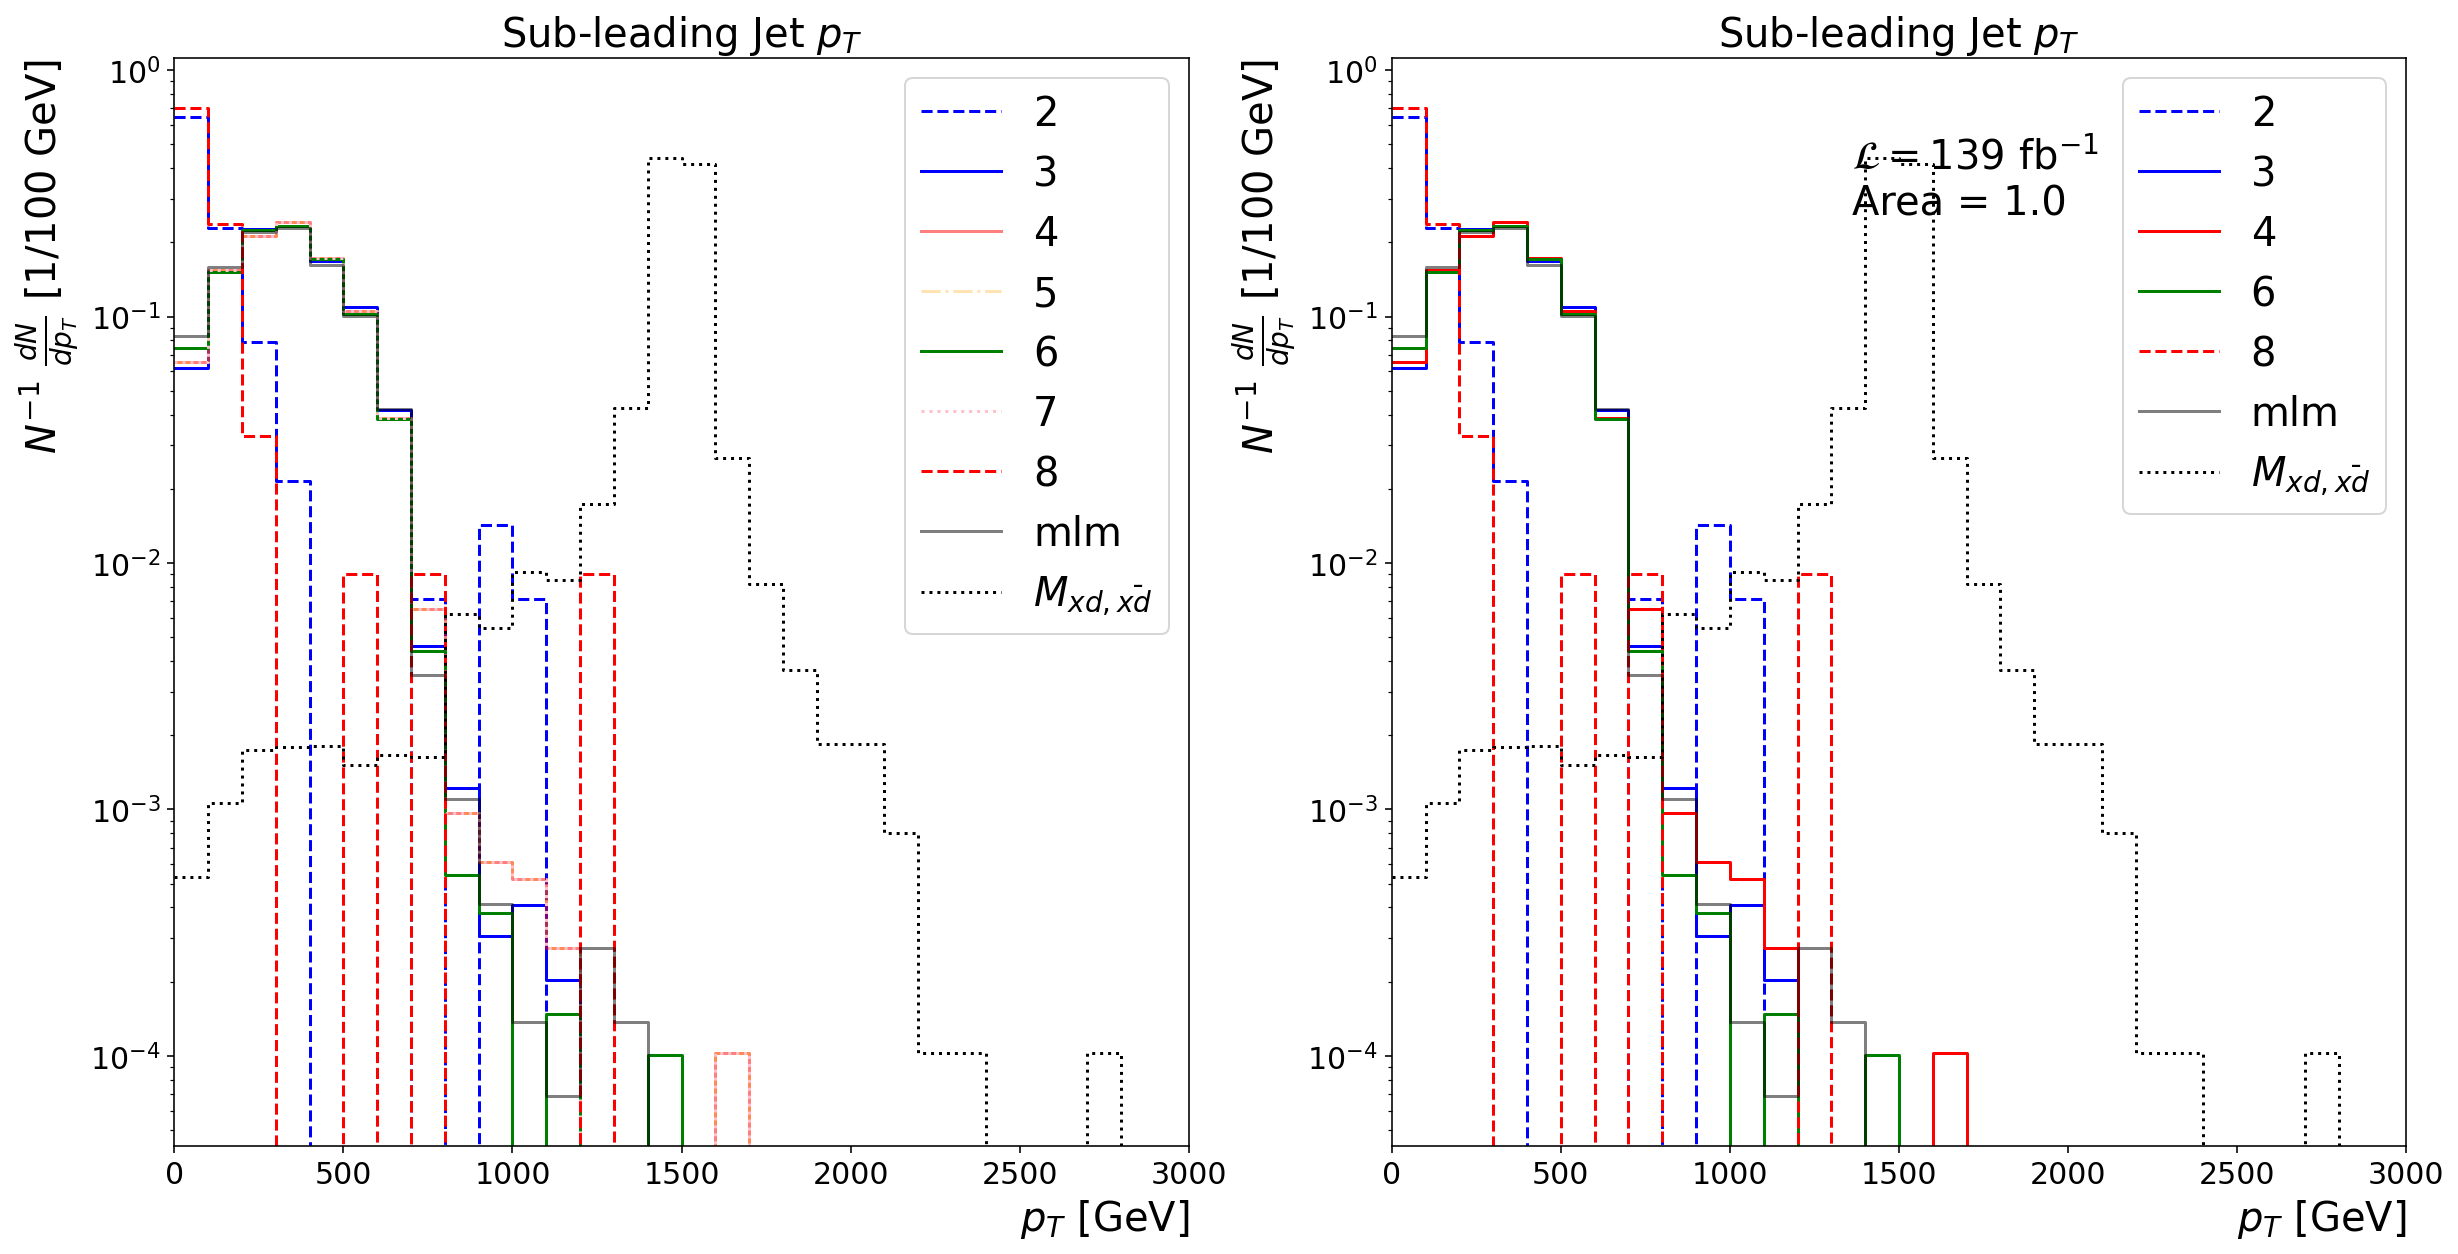

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))
binning = np.linspace(0, 5000, 51)

hist_1, bins_1 = np.histogram(list_truth_results_filterDM_1[5], bins=binning,
                              weights=list_weight[0][list_truth_results_filterDM_1[3]]*LUMINOSITY*1000)
hist_2, bins_2 = np.histogram(list_truth_results_filterDM_2[5], bins=binning,
                              weights=list_weight[1][list_truth_results_filterDM_2[3]]*LUMINOSITY*1000)
hist_3, bins_3 = np.histogram(list_truth_results_filterDM_3[5], bins=binning,
                              weights=list_weight[2][list_truth_results_filterDM_3[3]]*LUMINOSITY*1000)
hist_4, bins_4 = np.histogram(list_truth_results_filterDM_4[5], bins=binning,
                              weights=list_weight[3][list_truth_results_filterDM_4[3]]*LUMINOSITY*1000)
hist_5, bins_5 = np.histogram(list_truth_results_filterDM_5[5], bins=binning,
                              weights=list_weight[4][list_truth_results_filterDM_5[3]]*LUMINOSITY*1000)
hist_6, bins_6 = np.histogram(list_truth_results_filterDM_6[5], bins=binning,
                              weights=list_weight[5][list_truth_results_filterDM_6[3]]*LUMINOSITY*1000)
hist_7, bins_7 = np.histogram(list_truth_results_filterDM_7[5], bins=binning,
                              weights=list_weight[6][list_truth_results_filterDM_7[3]]*LUMINOSITY*1000)
hist_8, bins_8 = np.histogram(list_truth_results_filterDM_8[5], bins=binning,
                              weights=list_weight[7][list_truth_results_filterDM_8[3]]*LUMINOSITY*1000)
hist_9, bins_9 = np.histogram(list_truth_results_filterDM_9[5], bins=binning,
                              weights=list_weight[8][list_truth_results_filterDM_9[3]]*LUMINOSITY*1000)
hist_10, bins_10 = np.histogram(list_truth_results_filterDM_10[5], bins=binning,
                              weights=list_weight[9][list_truth_results_filterDM_10[3]]*LUMINOSITY*1000)
hist_4_1, bins_4_1 = np.histogram(list_truth_results_filterDM_4_1[5], bins=binning,
                              weights=list_weight[10][list_truth_results_filterDM_4_1[3]]*LUMINOSITY*1000)
hist_mlm, bins_mlm = np.histogram(list_truth_results_filterDM_mlm[5], bins=binning,
                              weights=list_weight[11][list_truth_results_filterDM_mlm[3]]*LUMINOSITY*1000)
hist_4_xdxdx, bins_4_xdxdx = np.histogram(m_xdxdbar_4, bins=binning, weights=list_weight[3])


# figure 1
axs[0].step(bins_2[:-1], hist_2/np.sum(hist_2), where='post', color='blue', linestyle='--', label="2")
axs[0].step(bins_3[:-1], hist_3/np.sum(hist_3), where='post', color='blue', label="3")
axs[0].step(bins_4[:-1], hist_4/np.sum(hist_4), where='post', color='red', alpha=0.5, label="4")
axs[0].step(bins_5[:-1], hist_5/np.sum(hist_5), where='post', color='orange', linestyle='-.', alpha=0.3, label="5")
axs[0].step(bins_6[:-1], hist_6/np.sum(hist_6), where='post', color='green', label="6")
axs[0].step(bins_7[:-1], hist_7/np.sum(hist_7), where='post', color='pink', linestyle=':', label="7")
axs[0].step(bins_8[:-1], hist_8/np.sum(hist_8), where='post', color='red', linestyle='--', label="8")
axs[0].step(bins_mlm[:-1], hist_mlm/np.sum(hist_mlm), where='post', color='black', alpha=0.5, label="mlm")
axs[0].step(bins_4_xdxdx[:-1], hist_4_xdxdx/np.sum(hist_4_xdxdx), where='post', color='black',
            linestyle=':', label="$M_{xd,\\bar{xd}}$")
# axes setting
axs[0].legend(fontsize=20)
axs[0].set_xlabel("$p_T$ [GeV]", fontsize=20, horizontalalignment='right', x=1)
axs[0].set_ylabel("$N^{-1}\ \\frac{dN}{dp_T}$ [1/100 GeV]", fontsize=20, horizontalalignment='right', y=1)
axs[0].set_title("Sub-leading Jet $p_T$", fontsize=20)
axs[0].set_xlim(0,3000)
axs[0].set_yscale('log')
axs[0].tick_params(axis='both', labelsize=15)


# figure 2
axs[1].step(bins_2[:-1], hist_2/np.sum(hist_2), where='post', color='blue', linestyle='--', label="2")
axs[1].step(bins_3[:-1], hist_3/np.sum(hist_3), where='post', color='blue', label="3")
axs[1].step(bins_4[:-1], hist_4/np.sum(hist_4), where='post', color='red', label="4")
# axs[0].step(bins_5[:-1], hist_5/np.sum(hist_5), where='post', color='orange', linestyle='-.', alpha=0.5, label="5")
axs[1].step(bins_6[:-1], hist_6/np.sum(hist_6), where='post', color='green', label="6")
# axs[0].step(bins_7[:-1], hist_7/np.sum(hist_7), where='post', color='pink', alpha=0.5, label="7")
axs[1].step(bins_8[:-1], hist_8/np.sum(hist_8), where='post', color='red', linestyle='--', label="8")
axs[1].step(bins_mlm[:-1], hist_mlm/np.sum(hist_mlm), where='post', color='black', alpha=0.5, label="mlm")
# text
axs[1].text(1360, 0.4, "$\mathcal{L} = $"+str(LUMINOSITY)+"$\ \mathrm{fb}^{-1}$", fontsize=20)
# axs[1].text(1980, 0.007, "$M_{Z^\prime} = 1500$ GeV", fontsize=20)
axs[1].text(1360, 0.26, "Area = "+str(np.round(np.sum(hist_4.astype(np.float32)/np.sum(hist_4)),2)), fontsize=20)
axs[1].step(bins_4_xdxdx[:-1], hist_4_xdxdx/np.sum(hist_4_xdxdx), where='post', color='black',
            linestyle=':', label="$M_{xd,\\bar{xd}}$")
# axes setting
axs[1].legend(fontsize=20)
axs[1].set_xlabel("$p_T$ [GeV]", fontsize=20, horizontalalignment='right', x=1)
axs[1].set_ylabel("$N^{-1}\ \\frac{dN}{dp_T}$ [1/100 GeV]", fontsize=20, horizontalalignment='right', y=1)
axs[1].set_title("Sub-leading Jet $p_T$", fontsize=20)
axs[1].set_xlim(0,3000)
axs[1].set_yscale('log')
axs[1].tick_params(axis='both', labelsize=15)

### 7-7. $\Delta\phi(jj)$

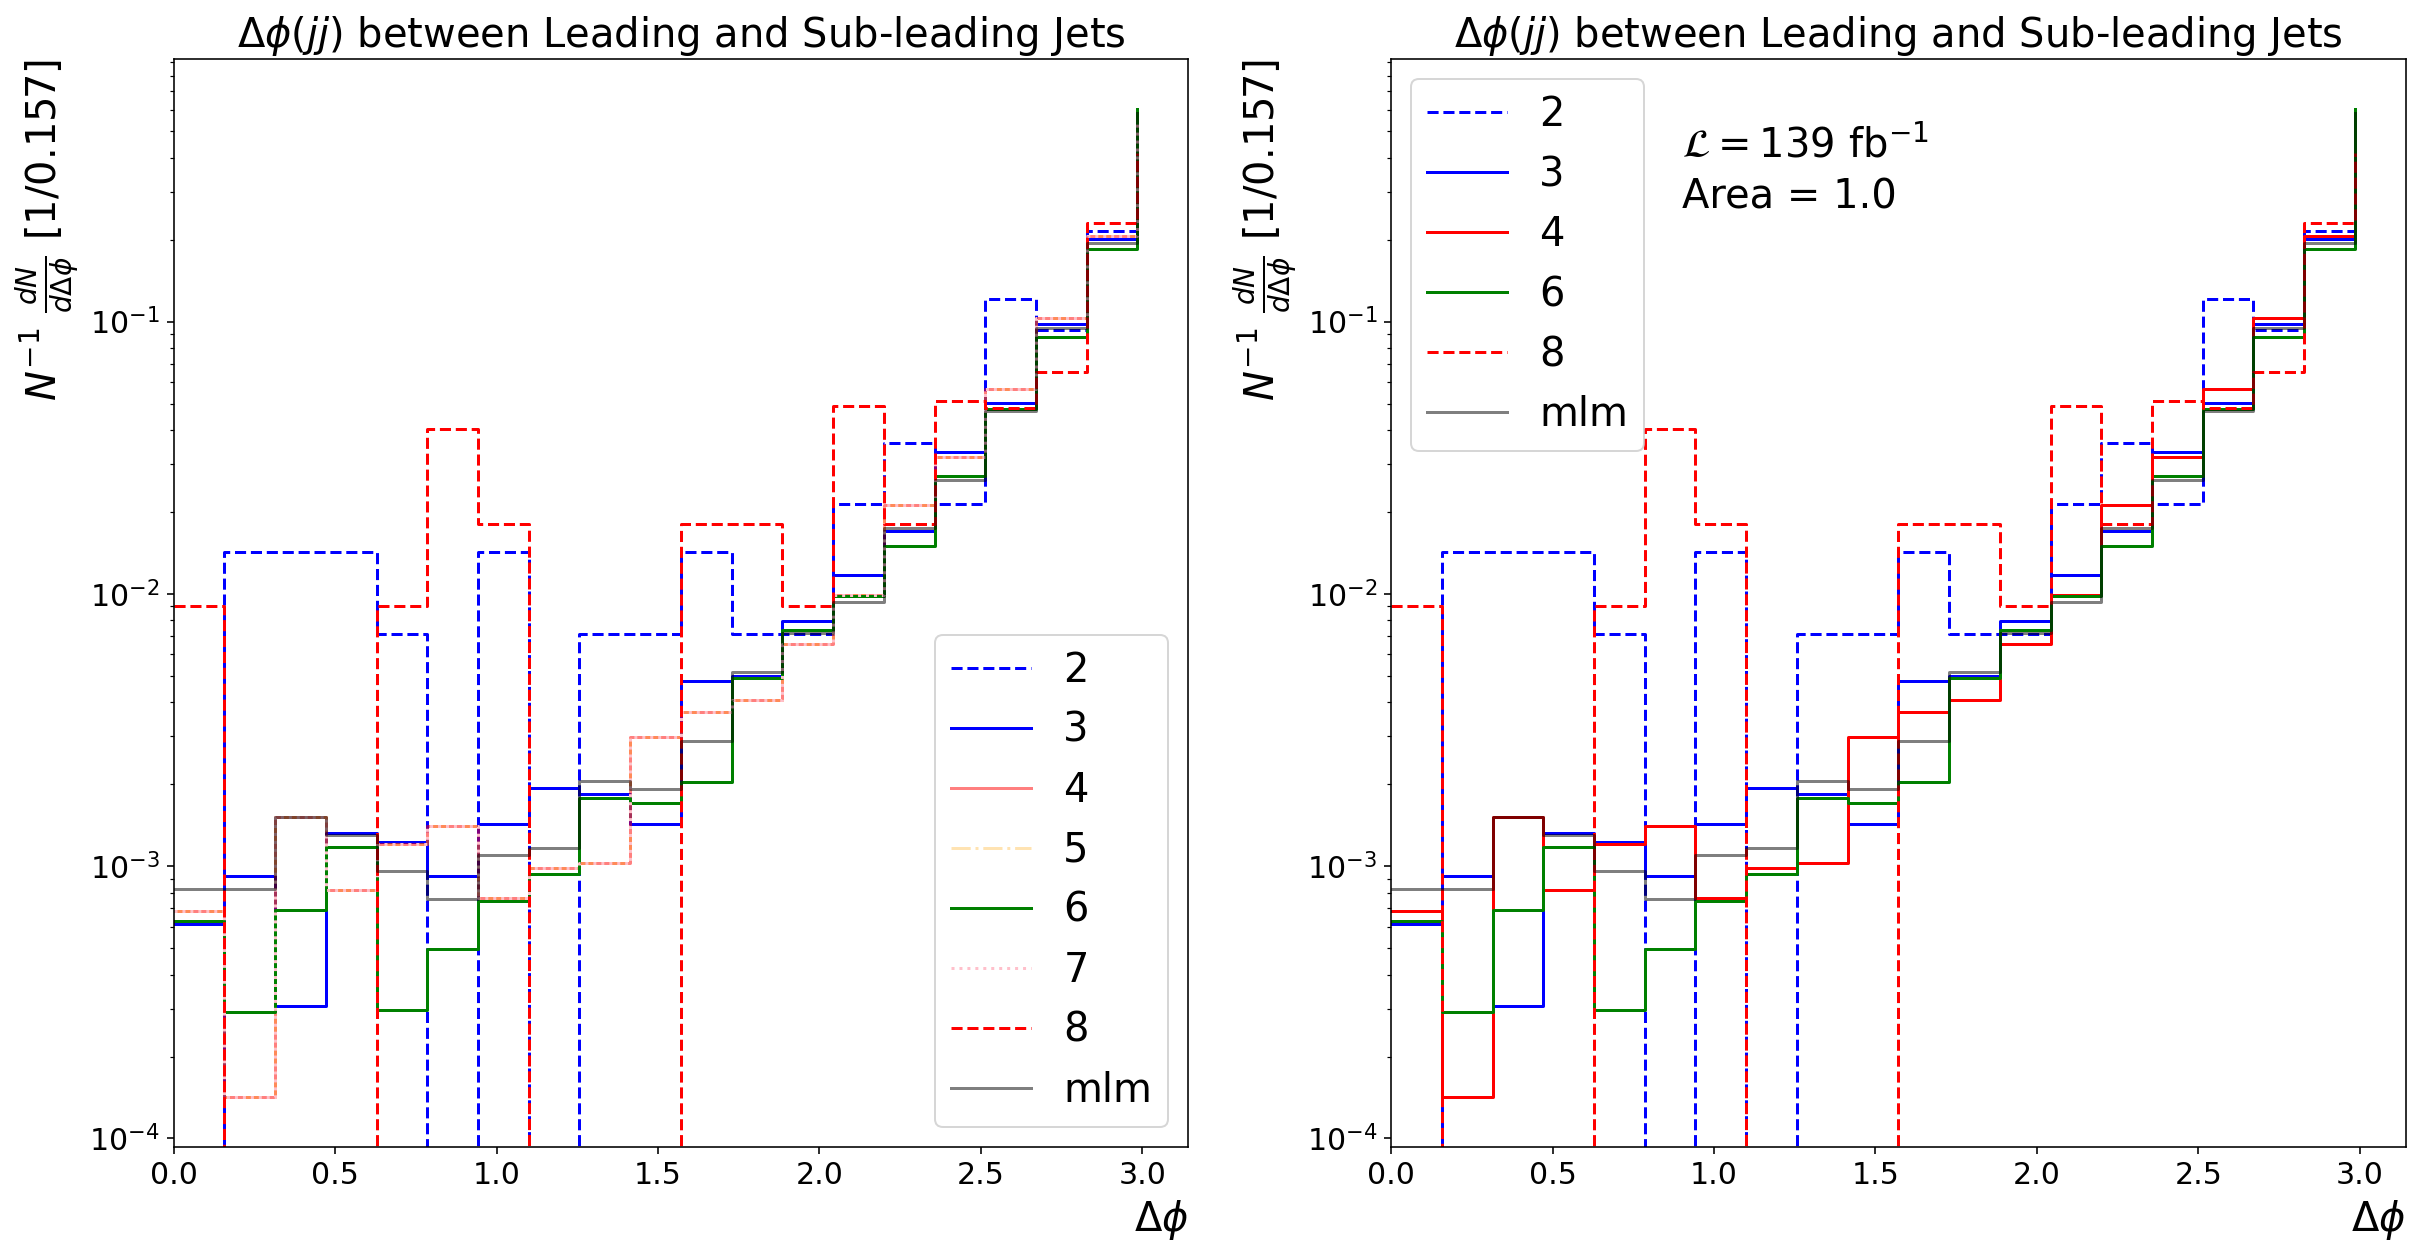

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))
binning = np.linspace(0, np.pi, 21)

hist_1, bins_1 = np.histogram(list_truth_results_filterDM_1[6], bins=binning,
                              weights=list_weight[0][list_truth_results_filterDM_1[3]]*LUMINOSITY*1000)
hist_2, bins_2 = np.histogram(list_truth_results_filterDM_2[6], bins=binning,
                              weights=list_weight[1][list_truth_results_filterDM_2[3]]*LUMINOSITY*1000)
hist_3, bins_3 = np.histogram(list_truth_results_filterDM_3[6], bins=binning,
                              weights=list_weight[2][list_truth_results_filterDM_3[3]]*LUMINOSITY*1000)
hist_4, bins_4 = np.histogram(list_truth_results_filterDM_4[6], bins=binning,
                              weights=list_weight[3][list_truth_results_filterDM_4[3]]*LUMINOSITY*1000)
hist_5, bins_5 = np.histogram(list_truth_results_filterDM_5[6], bins=binning,
                              weights=list_weight[4][list_truth_results_filterDM_5[3]]*LUMINOSITY*1000)
hist_6, bins_6 = np.histogram(list_truth_results_filterDM_6[6], bins=binning,
                              weights=list_weight[5][list_truth_results_filterDM_6[3]]*LUMINOSITY*1000)
hist_7, bins_7 = np.histogram(list_truth_results_filterDM_7[6], bins=binning,
                              weights=list_weight[6][list_truth_results_filterDM_7[3]]*LUMINOSITY*1000)
hist_8, bins_8 = np.histogram(list_truth_results_filterDM_8[6], bins=binning,
                              weights=list_weight[7][list_truth_results_filterDM_8[3]]*LUMINOSITY*1000)
hist_9, bins_9 = np.histogram(list_truth_results_filterDM_9[6], bins=binning,
                              weights=list_weight[8][list_truth_results_filterDM_9[3]]*LUMINOSITY*1000)
hist_10, bins_10 = np.histogram(list_truth_results_filterDM_10[6], bins=binning,
                              weights=list_weight[9][list_truth_results_filterDM_10[3]]*LUMINOSITY*1000)
hist_4_1, bins_4_1 = np.histogram(list_truth_results_filterDM_4_1[6], bins=binning,
                              weights=list_weight[10][list_truth_results_filterDM_4_1[3]]*LUMINOSITY*1000)
hist_mlm, bins_mlm = np.histogram(list_truth_results_filterDM_mlm[6], bins=binning,
                              weights=list_weight[11][list_truth_results_filterDM_mlm[3]]*LUMINOSITY*1000)


# figure 1
axs[0].step(bins_2[:-1], hist_2/np.sum(hist_2), where='post', color='blue', linestyle='--', label="2")
axs[0].step(bins_3[:-1], hist_3/np.sum(hist_3), where='post', color='blue', label="3")
axs[0].step(bins_4[:-1], hist_4/np.sum(hist_4), where='post', color='red', alpha=0.5, label="4")
axs[0].step(bins_5[:-1], hist_5/np.sum(hist_5), where='post', color='orange', linestyle='-.', alpha=0.3, label="5")
axs[0].step(bins_6[:-1], hist_6/np.sum(hist_6), where='post', color='green', label="6")
axs[0].step(bins_7[:-1], hist_7/np.sum(hist_7), where='post', color='pink', linestyle=':', label="7")
axs[0].step(bins_8[:-1], hist_8/np.sum(hist_8), where='post', color='red', linestyle='--', label="8")
axs[0].step(bins_mlm[:-1], hist_mlm/np.sum(hist_mlm), where='post', color='black', alpha=0.5, label="mlm")
# axes setting
axs[0].legend(fontsize=20)
axs[0].set_xlabel("$\Delta\phi$", fontsize=20, horizontalalignment='right', x=1)
axs[0].set_ylabel("$N^{-1}\ \\frac{dN}{d\Delta\phi}$ [1/0.157]", fontsize=20, horizontalalignment='right', y=1)
axs[0].set_title("$\Delta\phi(jj)$ between Leading and Sub-leading Jets", fontsize=20)
axs[0].set_xlim(0,np.pi)
axs[0].set_yscale('log')
axs[0].tick_params(axis='both', labelsize=15)


# figure 2
axs[1].step(bins_2[:-1], hist_2/np.sum(hist_2), where='post', color='blue', linestyle='--', label="2")
axs[1].step(bins_3[:-1], hist_3/np.sum(hist_3), where='post', color='blue', label="3")
axs[1].step(bins_4[:-1], hist_4/np.sum(hist_4), where='post', color='red', label="4")
# axs[0].step(bins_5[:-1], hist_5/np.sum(hist_5), where='post', color='orange', linestyle='-.', alpha=0.5, label="5")
axs[1].step(bins_6[:-1], hist_6/np.sum(hist_6), where='post', color='green', label="6")
# axs[0].step(bins_7[:-1], hist_7/np.sum(hist_7), where='post', color='pink', alpha=0.5, label="7")
axs[1].step(bins_8[:-1], hist_8/np.sum(hist_8), where='post', color='red', linestyle='--', label="8")
axs[1].step(bins_mlm[:-1], hist_mlm/np.sum(hist_mlm), where='post', color='black', alpha=0.5, label="mlm")
# text
axs[1].text(0.9, 0.4, "$\mathcal{L} = $"+str(LUMINOSITY)+"$\ \mathrm{fb}^{-1}$", fontsize=20)
# axs[1].text(1980, 0.007, "$M_{Z^\prime} = 1500$ GeV", fontsize=20)
axs[1].text(0.9, 0.26, "Area = "+str(np.round(np.sum(hist_4.astype(np.float32)/np.sum(hist_4)),2)), fontsize=20)
# axes setting
axs[1].legend(fontsize=20)
axs[1].set_xlabel("$\Delta\phi$", fontsize=20, horizontalalignment='right', x=1)
axs[1].set_ylabel("$N^{-1}\ \\frac{dN}{d\Delta\phi}$ [1/0.157]", fontsize=20, horizontalalignment='right', y=1)
axs[1].set_title("$\Delta\phi(jj)$ between Leading and Sub-leading Jets", fontsize=20)
axs[1].set_xlim(0,np.pi)
axs[1].set_yscale('log')
axs[1].tick_params(axis='both', labelsize=15)

### 7-8. $MET$ and $M_T(jj,MET)$

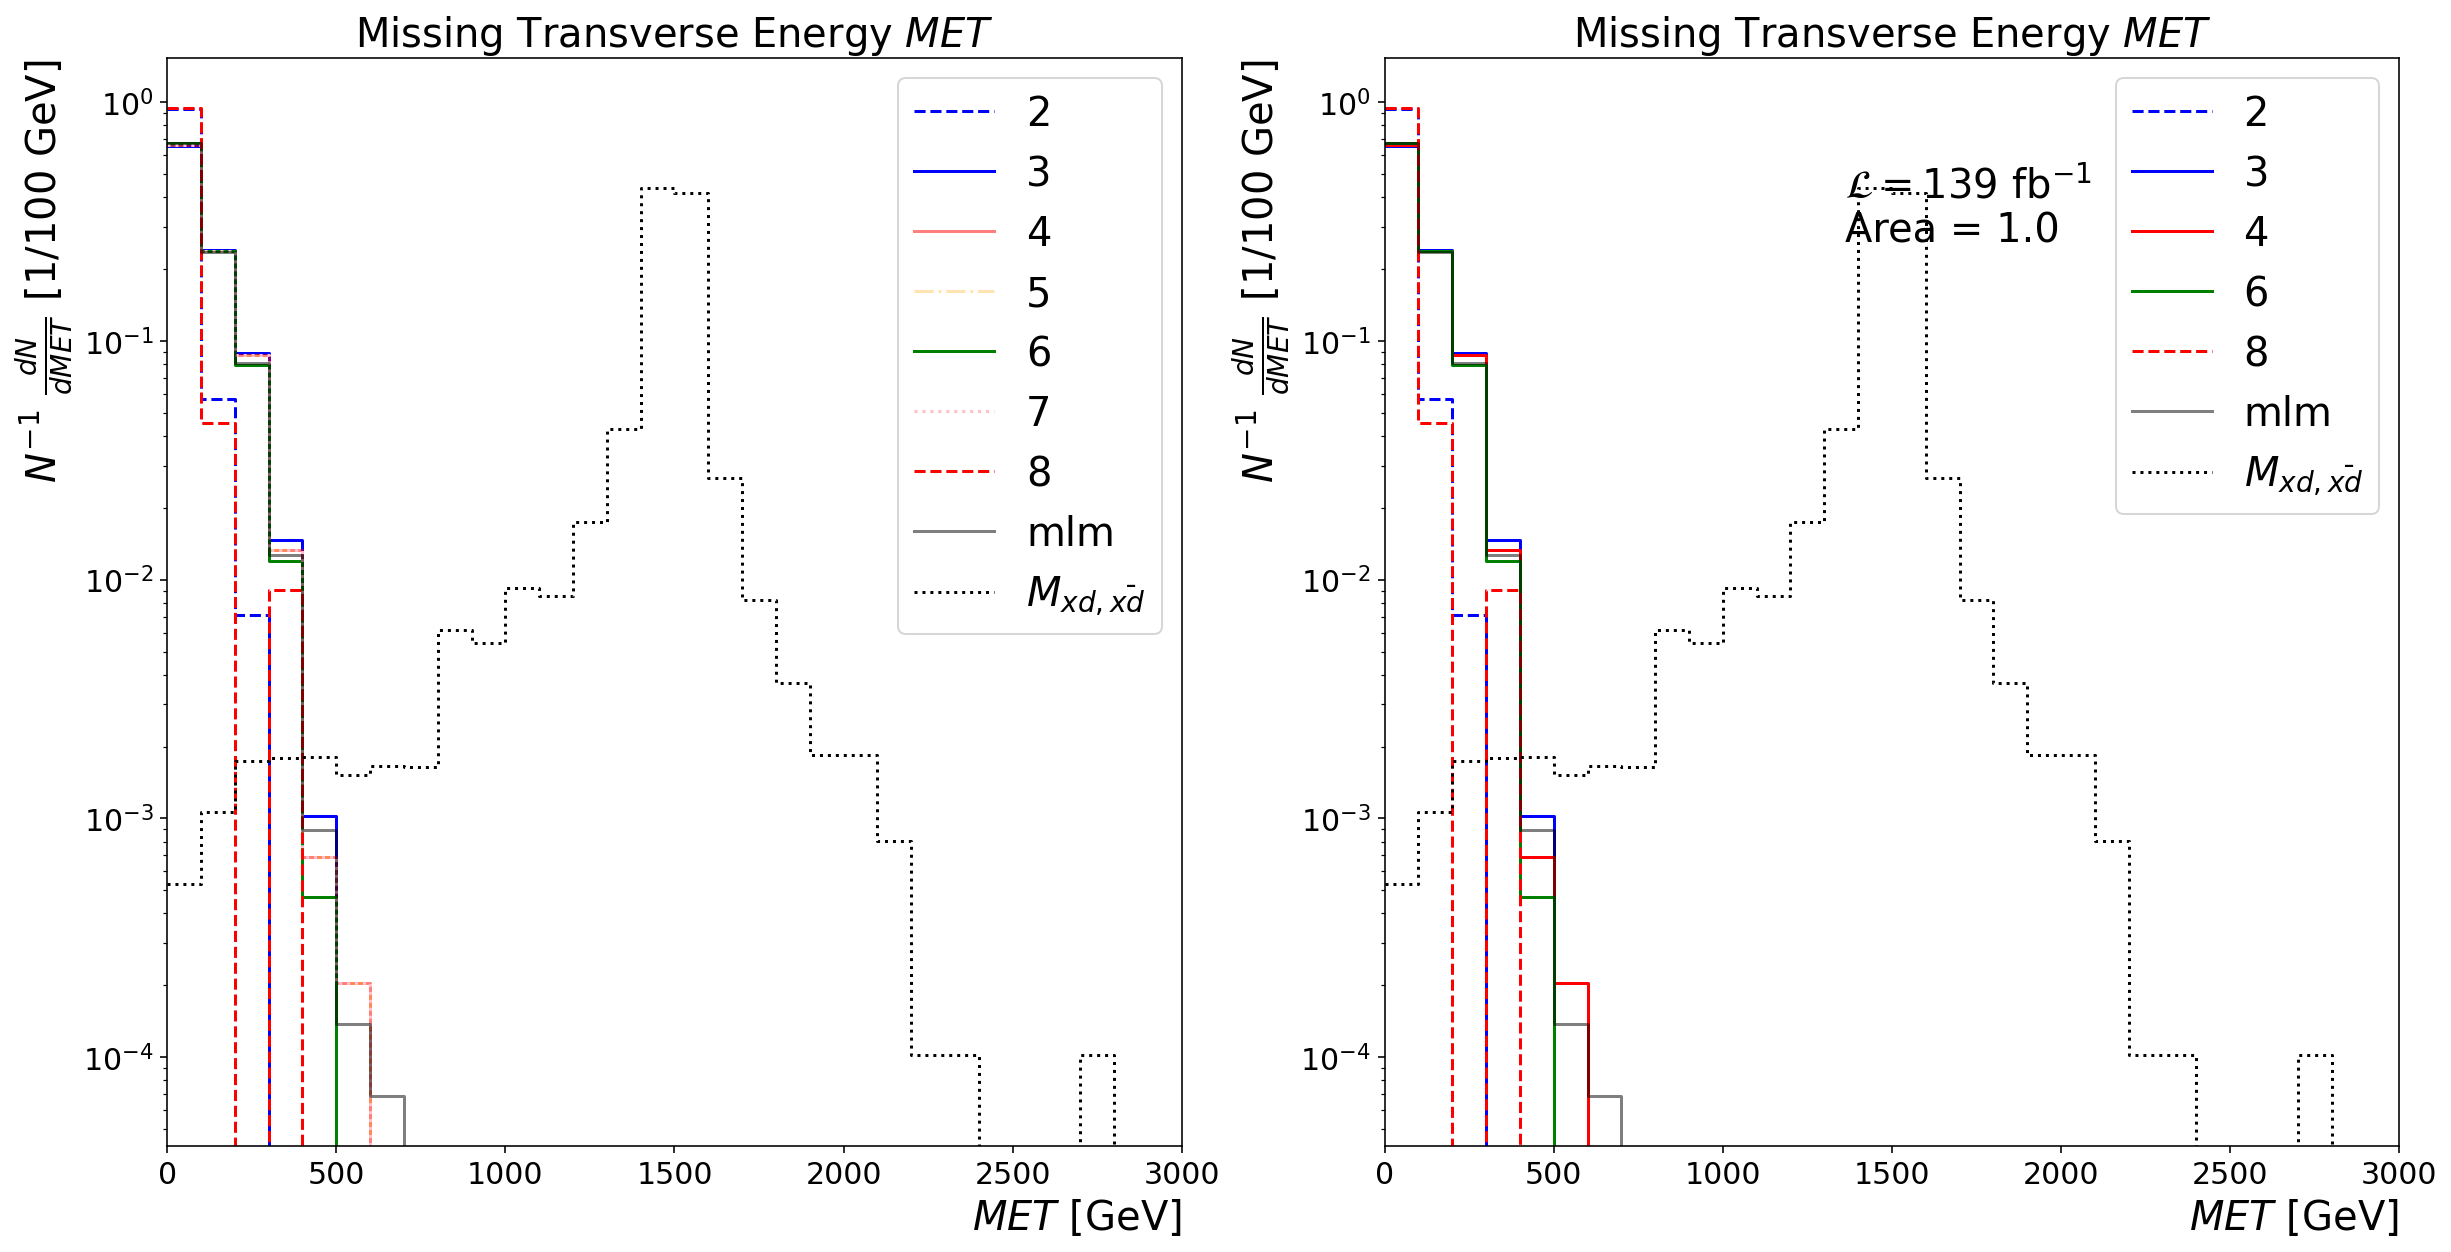

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))
binning = np.linspace(0, 5000, 51)

hist_1, bins_1 = np.histogram(list_MET_truth_results_1[0], bins=binning,
                              weights=list_weight[0])
hist_2, bins_2 = np.histogram(list_MET_truth_results_2[0], bins=binning,
                              weights=list_weight[1])
hist_3, bins_3 = np.histogram(list_MET_truth_results_3[0], bins=binning,
                              weights=list_weight[2])
hist_4, bins_4 = np.histogram(list_MET_truth_results_4[0], bins=binning,
                              weights=list_weight[3])
hist_5, bins_5 = np.histogram(list_MET_truth_results_5[0], bins=binning,
                              weights=list_weight[4])
hist_6, bins_6 = np.histogram(list_MET_truth_results_6[0], bins=binning,
                              weights=list_weight[5])
hist_7, bins_7 = np.histogram(list_MET_truth_results_7[0], bins=binning,
                              weights=list_weight[6])
hist_8, bins_8 = np.histogram(list_MET_truth_results_8[0], bins=binning,
                              weights=list_weight[7])
hist_9, bins_9 = np.histogram(list_MET_truth_results_9[0], bins=binning,
                              weights=list_weight[8])
hist_10, bins_10 = np.histogram(list_MET_truth_results_10[0], bins=binning,
                              weights=list_weight[9])
hist_4_1, bins_4_1 = np.histogram(list_MET_truth_results_4_1[0], bins=binning,
                              weights=list_weight[10])
hist_mlm, bins_mlm = np.histogram(list_MET_truth_results_mlm[0], bins=binning,
                              weights=list_weight[11])
hist_4_xdxdx, bins_4_xdxdx = np.histogram(m_xdxdbar_4, bins=binning, weights=list_weight[3])


# figure 1
axs[0].step(bins_2[:-1], hist_2/np.sum(hist_2), where='post', color='blue', linestyle='--', label="2")
axs[0].step(bins_3[:-1], hist_3/np.sum(hist_3), where='post', color='blue', label="3")
axs[0].step(bins_4[:-1], hist_4/np.sum(hist_4), where='post', color='red', alpha=0.5, label="4")
axs[0].step(bins_5[:-1], hist_5/np.sum(hist_5), where='post', color='orange', linestyle='-.', alpha=0.3, label="5")
axs[0].step(bins_6[:-1], hist_6/np.sum(hist_6), where='post', color='green', label="6")
axs[0].step(bins_7[:-1], hist_7/np.sum(hist_7), where='post', color='pink', linestyle=':', label="7")
axs[0].step(bins_8[:-1], hist_8/np.sum(hist_8), where='post', color='red', linestyle='--', label="8")
axs[0].step(bins_mlm[:-1], hist_mlm/np.sum(hist_mlm), where='post', color='black', alpha=0.5, label="mlm")
axs[0].step(bins_4_xdxdx[:-1], hist_4_xdxdx/np.sum(hist_4_xdxdx), where='post', color='black',
            linestyle=':', label="$M_{xd,\\bar{xd}}$")
# axes setting
axs[0].legend(fontsize=20)
axs[0].set_xlabel("$MET$ [GeV]", fontsize=20, horizontalalignment='right', x=1)
axs[0].set_ylabel("$N^{-1}\ \\frac{dN}{dMET}$ [1/100 GeV]", fontsize=20, horizontalalignment='right', y=1)
axs[0].set_title("Missing Transverse Energy $MET$", fontsize=20)
axs[0].set_xlim(0,3000)
axs[0].set_yscale('log')
axs[0].tick_params(axis='both', labelsize=15)


# figure 2
axs[1].step(bins_2[:-1], hist_2/np.sum(hist_2), where='post', color='blue', linestyle='--', label="2")
axs[1].step(bins_3[:-1], hist_3/np.sum(hist_3), where='post', color='blue', label="3")
axs[1].step(bins_4[:-1], hist_4/np.sum(hist_4), where='post', color='red', label="4")
# axs[0].step(bins_5[:-1], hist_5/np.sum(hist_5), where='post', color='orange', linestyle='-.', alpha=0.5, label="5")
axs[1].step(bins_6[:-1], hist_6/np.sum(hist_6), where='post', color='green', label="6")
# axs[0].step(bins_7[:-1], hist_7/np.sum(hist_7), where='post', color='pink', alpha=0.5, label="7")
axs[1].step(bins_8[:-1], hist_8/np.sum(hist_8), where='post', color='red', linestyle='--', label="8")
axs[1].step(bins_mlm[:-1], hist_mlm/np.sum(hist_mlm), where='post', color='black', alpha=0.5, label="mlm")
# text
axs[1].text(1360, 0.4, "$\mathcal{L} = $"+str(LUMINOSITY)+"$\ \mathrm{fb}^{-1}$", fontsize=20)
# axs[1].text(1980, 0.007, "$M_{Z^\prime} = 1500$ GeV", fontsize=20)
axs[1].text(1360, 0.26, "Area = "+str(np.round(np.sum(hist_4.astype(np.float32)/np.sum(hist_4)),2)), fontsize=20)
axs[1].step(bins_4_xdxdx[:-1], hist_4_xdxdx/np.sum(hist_4_xdxdx), where='post', color='black',
            linestyle=':', label="$M_{xd,\\bar{xd}}$")
# axes setting
axs[1].legend(fontsize=20)
axs[1].set_xlabel("$MET$ [GeV]", fontsize=20, horizontalalignment='right', x=1)
axs[1].set_ylabel("$N^{-1}\ \\frac{dN}{dMET}$ [1/100 GeV]", fontsize=20, horizontalalignment='right', y=1)
axs[1].set_title("Missing Transverse Energy $MET$", fontsize=20)
axs[1].set_xlim(0,3000)
axs[1].set_yscale('log')
axs[1].tick_params(axis='both', labelsize=15)

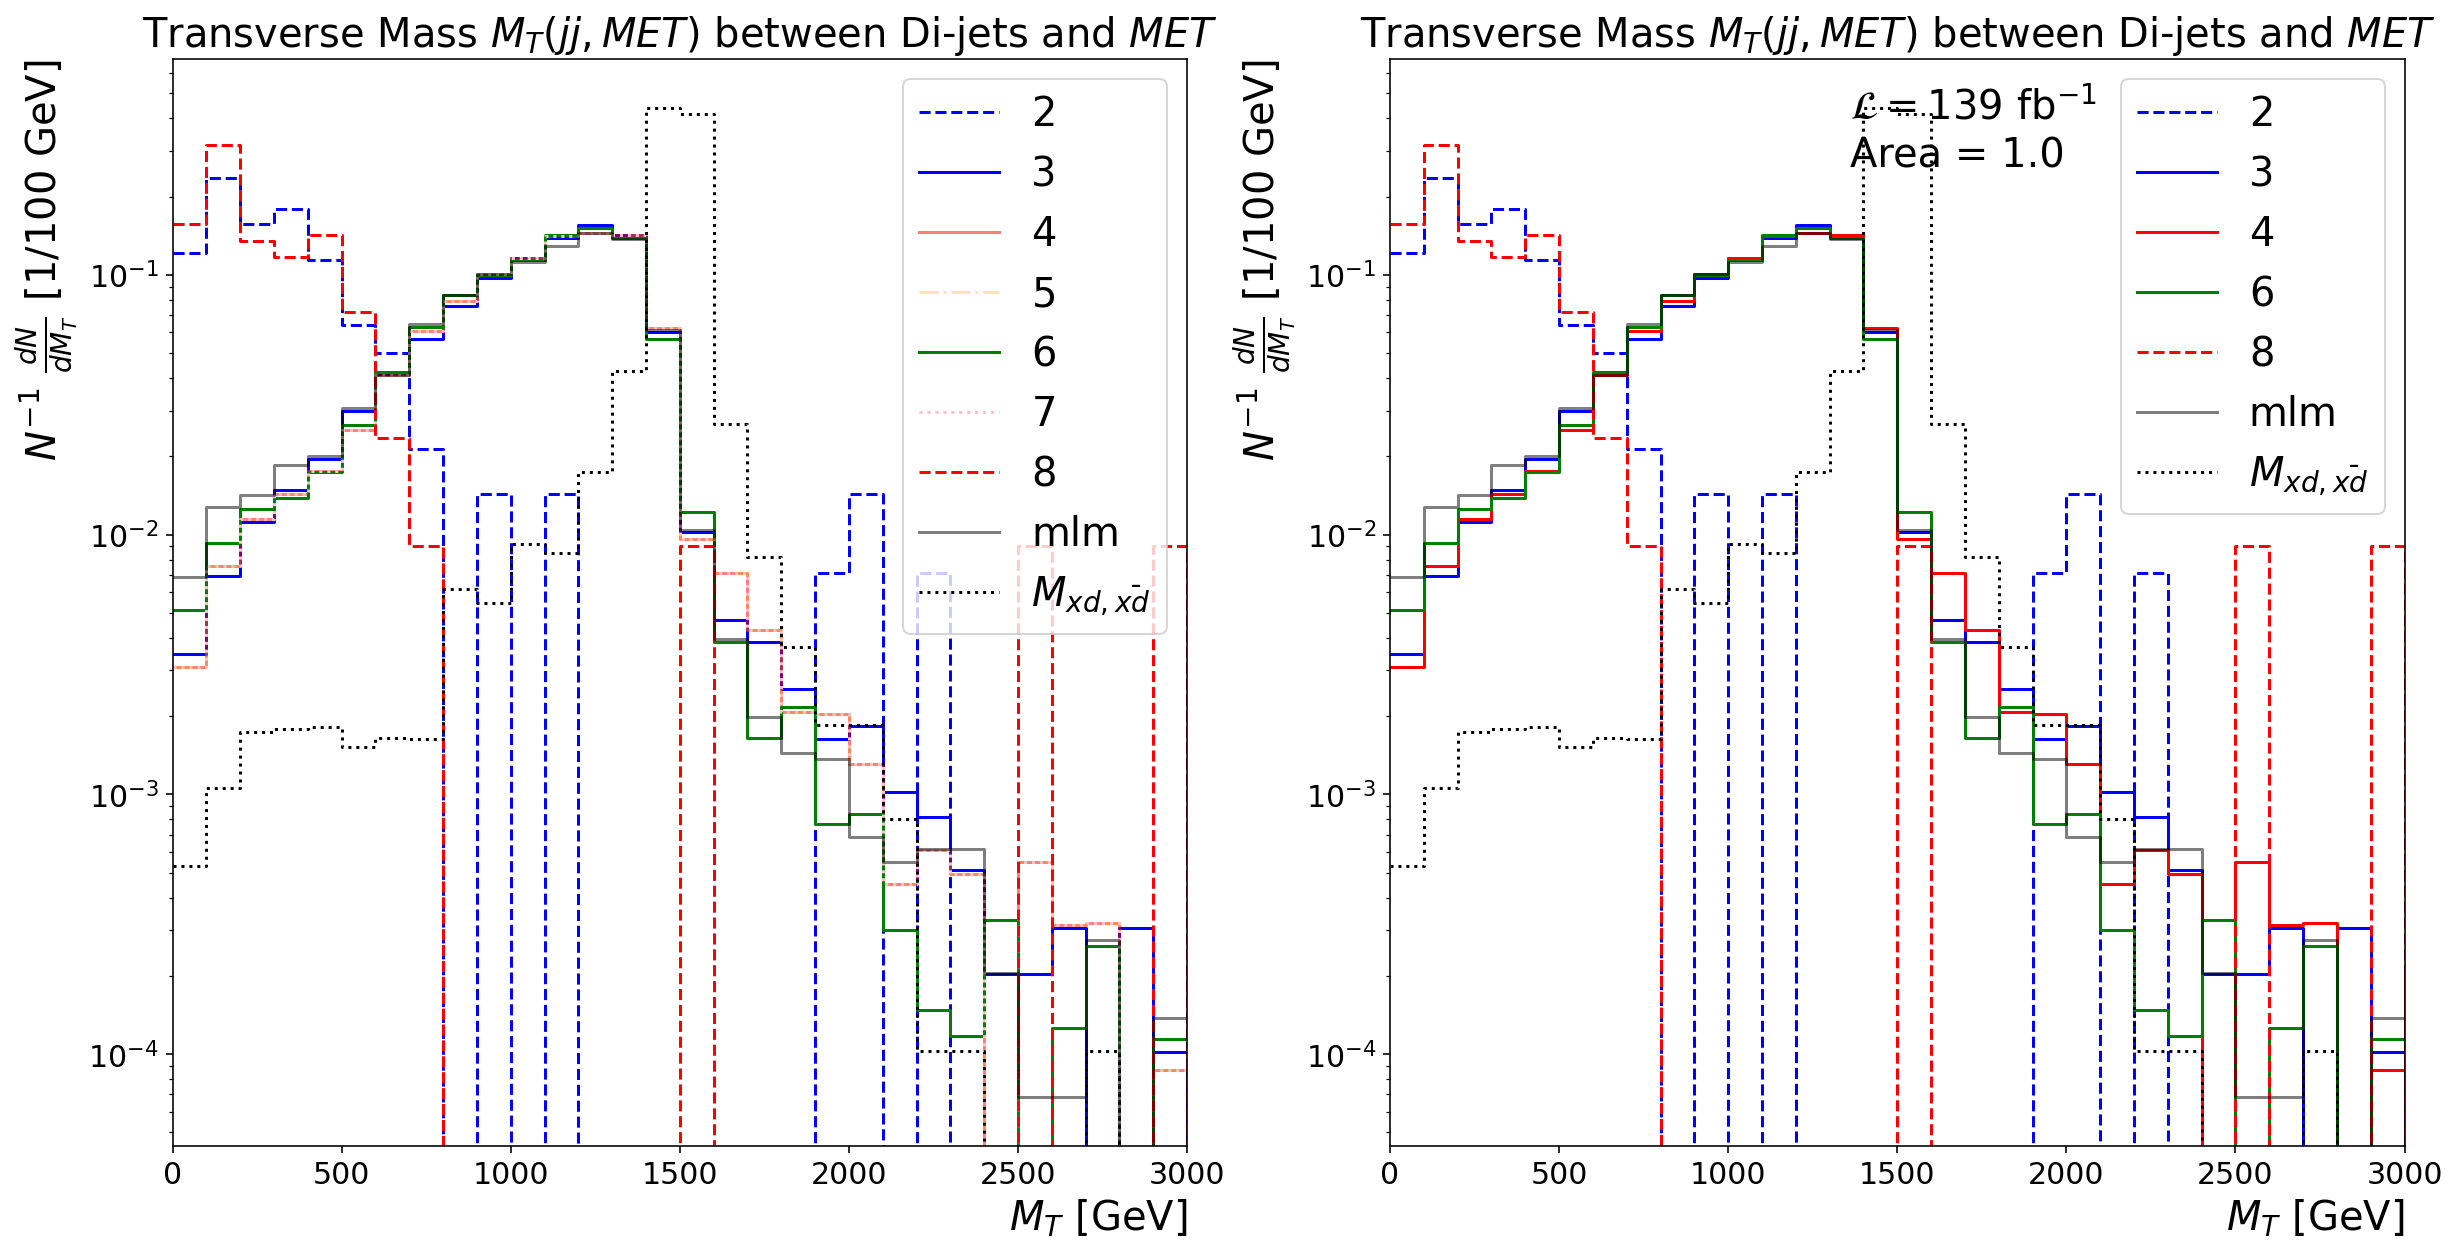

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))
binning = np.linspace(0, 5000, 51)

hist_1, bins_1 = np.histogram(list_MET_truth_results_1[2], bins=binning,
                              weights=list_weight[0][list_truth_results_filterDM_1[3]]*LUMINOSITY*1000)
hist_2, bins_2 = np.histogram(list_MET_truth_results_2[2], bins=binning,
                              weights=list_weight[1][list_truth_results_filterDM_2[3]]*LUMINOSITY*1000)
hist_3, bins_3 = np.histogram(list_MET_truth_results_3[2], bins=binning,
                              weights=list_weight[2][list_truth_results_filterDM_3[3]]*LUMINOSITY*1000)
hist_4, bins_4 = np.histogram(list_MET_truth_results_4[2], bins=binning,
                              weights=list_weight[3][list_truth_results_filterDM_4[3]]*LUMINOSITY*1000)
hist_5, bins_5 = np.histogram(list_MET_truth_results_5[2], bins=binning,
                              weights=list_weight[4][list_truth_results_filterDM_5[3]]*LUMINOSITY*1000)
hist_6, bins_6 = np.histogram(list_MET_truth_results_6[2], bins=binning,
                              weights=list_weight[5][list_truth_results_filterDM_6[3]]*LUMINOSITY*1000)
hist_7, bins_7 = np.histogram(list_MET_truth_results_7[2], bins=binning,
                              weights=list_weight[6][list_truth_results_filterDM_7[3]]*LUMINOSITY*1000)
hist_8, bins_8 = np.histogram(list_MET_truth_results_8[2], bins=binning,
                              weights=list_weight[7][list_truth_results_filterDM_8[3]]*LUMINOSITY*1000)
hist_9, bins_9 = np.histogram(list_MET_truth_results_9[2], bins=binning,
                              weights=list_weight[8][list_truth_results_filterDM_9[3]]*LUMINOSITY*1000)
hist_10, bins_10 = np.histogram(list_MET_truth_results_10[2], bins=binning,
                              weights=list_weight[9][list_truth_results_filterDM_10[3]]*LUMINOSITY*1000)
hist_4_1, bins_4_1 = np.histogram(list_MET_truth_results_4_1[2], bins=binning,
                              weights=list_weight[10][list_truth_results_filterDM_4_1[3]]*LUMINOSITY*1000)
hist_mlm, bins_mlm = np.histogram(list_MET_truth_results_mlm[2], bins=binning,
                              weights=list_weight[11][list_truth_results_filterDM_mlm[3]]*LUMINOSITY*1000)
hist_4_xdxdx, bins_4_xdxdx = np.histogram(m_xdxdbar_4, bins=binning, weights=list_weight[3])


# figure 1
axs[0].step(bins_2[:-1], hist_2/np.sum(hist_2), where='post', color='blue', linestyle='--', label="2")
axs[0].step(bins_3[:-1], hist_3/np.sum(hist_3), where='post', color='blue', label="3")
axs[0].step(bins_4[:-1], hist_4/np.sum(hist_4), where='post', color='red', alpha=0.5, label="4")
axs[0].step(bins_5[:-1], hist_5/np.sum(hist_5), where='post', color='orange', linestyle='-.', alpha=0.3, label="5")
axs[0].step(bins_6[:-1], hist_6/np.sum(hist_6), where='post', color='green', label="6")
axs[0].step(bins_7[:-1], hist_7/np.sum(hist_7), where='post', color='pink', linestyle=':', label="7")
axs[0].step(bins_8[:-1], hist_8/np.sum(hist_8), where='post', color='red', linestyle='--', label="8")
axs[0].step(bins_mlm[:-1], hist_mlm/np.sum(hist_mlm), where='post', color='black', alpha=0.5, label="mlm")
axs[0].step(bins_4_xdxdx[:-1], hist_4_xdxdx/np.sum(hist_4_xdxdx), where='post', color='black',
            linestyle=':', label="$M_{xd,\\bar{xd}}$")
# axes setting
axs[0].legend(fontsize=20)
axs[0].set_xlabel("$M_T$ [GeV]", fontsize=20, horizontalalignment='right', x=1)
axs[0].set_ylabel("$N^{-1}\ \\frac{dN}{dM_T}$ [1/100 GeV]", fontsize=20, horizontalalignment='right', y=1)
axs[0].set_title("Transverse Mass $M_T(jj,MET)$ between Di-jets and $MET$", fontsize=20)
axs[0].set_xlim(0,3000)
axs[0].set_yscale('log')
axs[0].tick_params(axis='both', labelsize=15)


# figure 2
axs[1].step(bins_2[:-1], hist_2/np.sum(hist_2), where='post', color='blue', linestyle='--', label="2")
axs[1].step(bins_3[:-1], hist_3/np.sum(hist_3), where='post', color='blue', label="3")
axs[1].step(bins_4[:-1], hist_4/np.sum(hist_4), where='post', color='red', label="4")
# axs[0].step(bins_5[:-1], hist_5/np.sum(hist_5), where='post', color='orange', linestyle='-.', alpha=0.5, label="5")
axs[1].step(bins_6[:-1], hist_6/np.sum(hist_6), where='post', color='green', label="6")
# axs[0].step(bins_7[:-1], hist_7/np.sum(hist_7), where='post', color='pink', alpha=0.5, label="7")
axs[1].step(bins_8[:-1], hist_8/np.sum(hist_8), where='post', color='red', linestyle='--', label="8")
axs[1].step(bins_mlm[:-1], hist_mlm/np.sum(hist_mlm), where='post', color='black', alpha=0.5, label="mlm")
# text
axs[1].text(1360, 0.4, "$\mathcal{L} = $"+str(LUMINOSITY)+"$\ \mathrm{fb}^{-1}$", fontsize=20)
# axs[1].text(1980, 0.007, "$M_{Z^\prime} = 1500$ GeV", fontsize=20)
axs[1].text(1360, 0.26, "Area = "+str(np.round(np.sum(hist_4.astype(np.float32)/np.sum(hist_4)),2)), fontsize=20)
axs[1].step(bins_4_xdxdx[:-1], hist_4_xdxdx/np.sum(hist_4_xdxdx), where='post', color='black',
            linestyle=':', label="$M_{xd,\\bar{xd}}$")
# axes setting
axs[1].legend(fontsize=20)
axs[1].set_xlabel("$M_T$ [GeV]", fontsize=20, horizontalalignment='right', x=1)
axs[1].set_ylabel("$N^{-1}\ \\frac{dN}{dM_T}$ [1/100 GeV]", fontsize=20, horizontalalignment='right', y=1)
axs[1].set_title("Transverse Mass $M_T(jj,MET)$ between Di-jets and $MET$", fontsize=20)
axs[1].set_xlim(0,3000)
axs[1].set_yscale('log')
axs[1].tick_params(axis='both', labelsize=15)

### 7-9. $\Delta\phi(j_1,MET)$

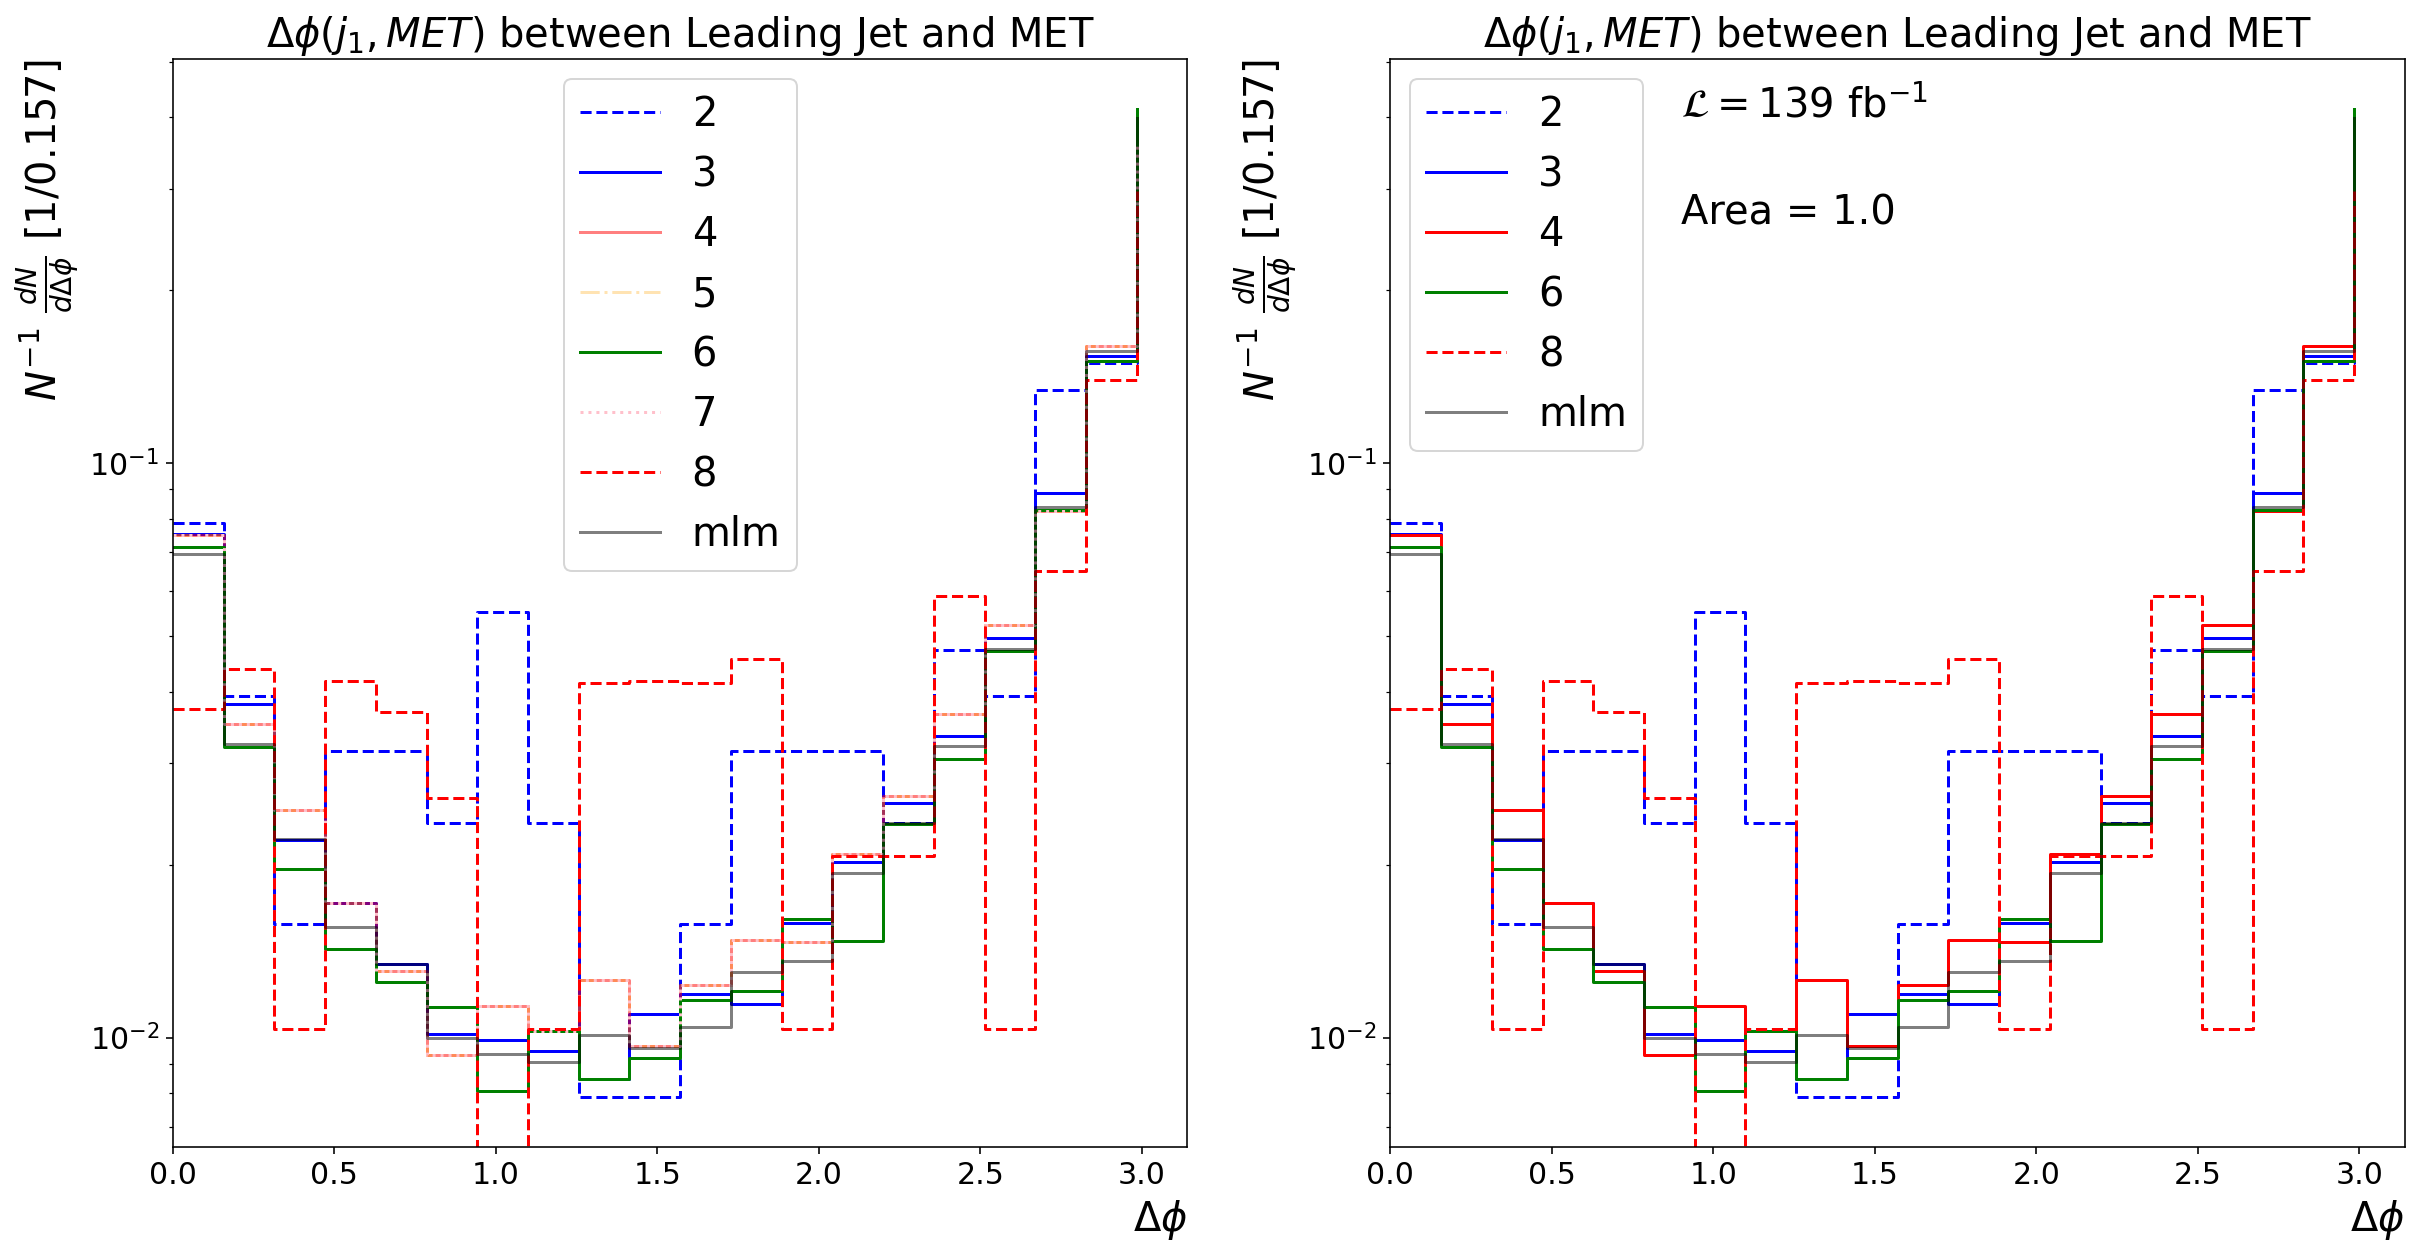

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))
binning = np.linspace(0, np.pi, 21)

hist_1, bins_1 = np.histogram(list_MET_truth_results_1[3], bins=binning,
                              weights=list_weight[0][list_truth_results_filterDM_1[3]]*LUMINOSITY*1000)
hist_2, bins_2 = np.histogram(list_MET_truth_results_2[3], bins=binning,
                              weights=list_weight[1][list_truth_results_filterDM_2[3]]*LUMINOSITY*1000)
hist_3, bins_3 = np.histogram(list_MET_truth_results_3[3], bins=binning,
                              weights=list_weight[2][list_truth_results_filterDM_3[3]]*LUMINOSITY*1000)
hist_4, bins_4 = np.histogram(list_MET_truth_results_4[3], bins=binning,
                              weights=list_weight[3][list_truth_results_filterDM_4[3]]*LUMINOSITY*1000)
hist_5, bins_5 = np.histogram(list_MET_truth_results_5[3], bins=binning,
                              weights=list_weight[4][list_truth_results_filterDM_5[3]]*LUMINOSITY*1000)
hist_6, bins_6 = np.histogram(list_MET_truth_results_6[3], bins=binning,
                              weights=list_weight[5][list_truth_results_filterDM_6[3]]*LUMINOSITY*1000)
hist_7, bins_7 = np.histogram(list_MET_truth_results_7[3], bins=binning,
                              weights=list_weight[6][list_truth_results_filterDM_7[3]]*LUMINOSITY*1000)
hist_8, bins_8 = np.histogram(list_MET_truth_results_8[3], bins=binning,
                              weights=list_weight[7][list_truth_results_filterDM_8[3]]*LUMINOSITY*1000)
hist_9, bins_9 = np.histogram(list_MET_truth_results_9[3], bins=binning,
                              weights=list_weight[8][list_truth_results_filterDM_9[3]]*LUMINOSITY*1000)
hist_10, bins_10 = np.histogram(list_MET_truth_results_10[3], bins=binning,
                              weights=list_weight[9][list_truth_results_filterDM_10[3]]*LUMINOSITY*1000)
hist_4_1, bins_4_1 = np.histogram(list_MET_truth_results_4_1[3], bins=binning,
                              weights=list_weight[10][list_truth_results_filterDM_4_1[3]]*LUMINOSITY*1000)
hist_mlm, bins_mlm = np.histogram(list_MET_truth_results_mlm[3], bins=binning,
                              weights=list_weight[11][list_truth_results_filterDM_mlm[3]]*LUMINOSITY*1000)


# figure 1
axs[0].step(bins_2[:-1], hist_2/np.sum(hist_2), where='post', color='blue', linestyle='--', label="2")
axs[0].step(bins_3[:-1], hist_3/np.sum(hist_3), where='post', color='blue', label="3")
axs[0].step(bins_4[:-1], hist_4/np.sum(hist_4), where='post', color='red', alpha=0.5, label="4")
axs[0].step(bins_5[:-1], hist_5/np.sum(hist_5), where='post', color='orange', linestyle='-.', alpha=0.3, label="5")
axs[0].step(bins_6[:-1], hist_6/np.sum(hist_6), where='post', color='green', label="6")
axs[0].step(bins_7[:-1], hist_7/np.sum(hist_7), where='post', color='pink', linestyle=':', label="7")
axs[0].step(bins_8[:-1], hist_8/np.sum(hist_8), where='post', color='red', linestyle='--', label="8")
axs[0].step(bins_mlm[:-1], hist_mlm/np.sum(hist_mlm), where='post', color='black', alpha=0.5, label="mlm")
# axes setting
axs[0].legend(fontsize=20)
axs[0].set_xlabel("$\Delta\phi$", fontsize=20, horizontalalignment='right', x=1)
axs[0].set_ylabel("$N^{-1}\ \\frac{dN}{d\Delta\phi}$ [1/0.157]", fontsize=20, horizontalalignment='right', y=1)
axs[0].set_title("$\Delta\phi(j_1,MET)$ between Leading Jet and MET", fontsize=20)
axs[0].set_xlim(0,np.pi)
axs[0].set_yscale('log')
axs[0].tick_params(axis='both', labelsize=15)


# figure 2
axs[1].step(bins_2[:-1], hist_2/np.sum(hist_2), where='post', color='blue', linestyle='--', label="2")
axs[1].step(bins_3[:-1], hist_3/np.sum(hist_3), where='post', color='blue', label="3")
axs[1].step(bins_4[:-1], hist_4/np.sum(hist_4), where='post', color='red', label="4")
# axs[0].step(bins_5[:-1], hist_5/np.sum(hist_5), where='post', color='orange', linestyle='-.', alpha=0.5, label="5")
axs[1].step(bins_6[:-1], hist_6/np.sum(hist_6), where='post', color='green', label="6")
# axs[0].step(bins_7[:-1], hist_7/np.sum(hist_7), where='post', color='pink', alpha=0.5, label="7")
axs[1].step(bins_8[:-1], hist_8/np.sum(hist_8), where='post', color='red', linestyle='--', label="8")
axs[1].step(bins_mlm[:-1], hist_mlm/np.sum(hist_mlm), where='post', color='black', alpha=0.5, label="mlm")
# text
axs[1].text(0.9, 0.4, "$\mathcal{L} = $"+str(LUMINOSITY)+"$\ \mathrm{fb}^{-1}$", fontsize=20)
# axs[1].text(1980, 0.007, "$M_{Z^\prime} = 1500$ GeV", fontsize=20)
axs[1].text(0.9, 0.26, "Area = "+str(np.round(np.sum(hist_4.astype(np.float32)/np.sum(hist_4)),2)), fontsize=20)
# axes setting
axs[1].legend(fontsize=20)
axs[1].set_xlabel("$\Delta\phi$", fontsize=20, horizontalalignment='right', x=1)
axs[1].set_ylabel("$N^{-1}\ \\frac{dN}{d\Delta\phi}$ [1/0.157]", fontsize=20, horizontalalignment='right', y=1)
axs[1].set_title("$\Delta\phi(j_1,MET)$ between Leading Jet and MET", fontsize=20)
axs[1].set_xlim(0,np.pi)
axs[1].set_yscale('log')
axs[1].tick_params(axis='both', labelsize=15)


## 8. Plot 2

### 8-1. Transverse mass $M_T$ and $m_T$

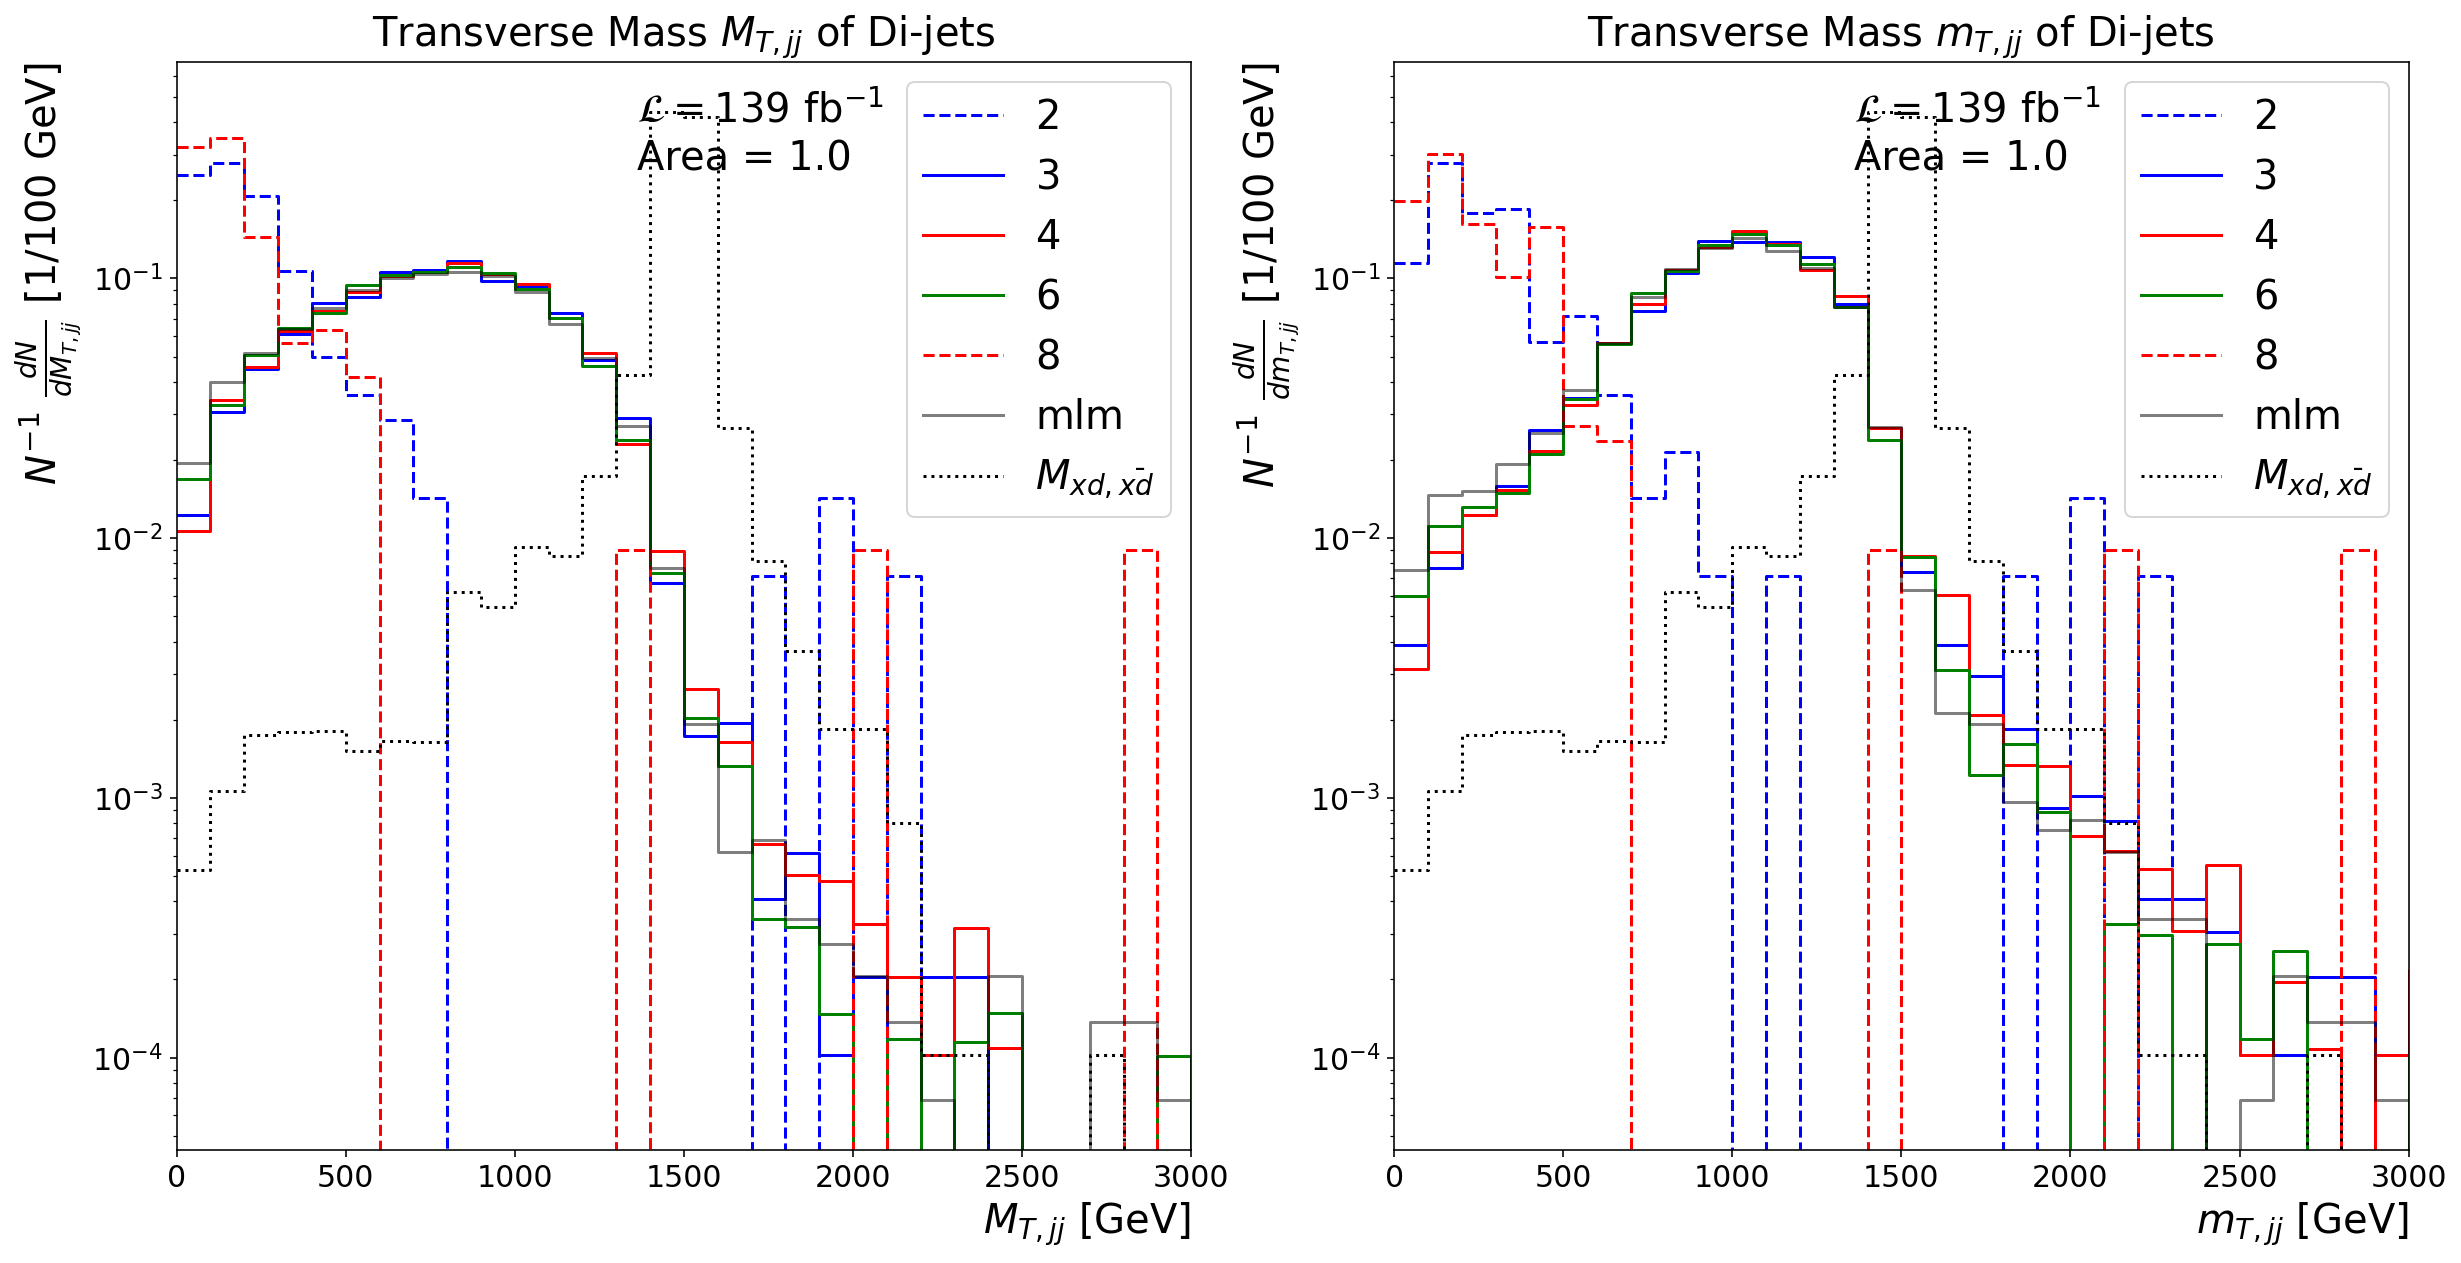

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))
binning = np.linspace(0, 5000, 51)

# figure 1
hist_1, bins_1 = np.histogram(list_truth_results_filterDM_1[1], bins=binning,
                              weights=list_weight[0][list_truth_results_filterDM_1[3]]*LUMINOSITY*1000)
hist_2, bins_2 = np.histogram(list_truth_results_filterDM_2[1], bins=binning,
                              weights=list_weight[1][list_truth_results_filterDM_2[3]]*LUMINOSITY*1000)
hist_3, bins_3 = np.histogram(list_truth_results_filterDM_3[1], bins=binning,
                              weights=list_weight[2][list_truth_results_filterDM_3[3]]*LUMINOSITY*1000)
hist_4, bins_4 = np.histogram(list_truth_results_filterDM_4[1], bins=binning,
                              weights=list_weight[3][list_truth_results_filterDM_4[3]]*LUMINOSITY*1000)
hist_5, bins_5 = np.histogram(list_truth_results_filterDM_5[1], bins=binning,
                              weights=list_weight[4][list_truth_results_filterDM_5[3]]*LUMINOSITY*1000)
hist_6, bins_6 = np.histogram(list_truth_results_filterDM_6[1], bins=binning,
                              weights=list_weight[5][list_truth_results_filterDM_6[3]]*LUMINOSITY*1000)
hist_7, bins_7 = np.histogram(list_truth_results_filterDM_7[1], bins=binning,
                              weights=list_weight[6][list_truth_results_filterDM_7[3]]*LUMINOSITY*1000)
hist_8, bins_8 = np.histogram(list_truth_results_filterDM_8[1], bins=binning,
                              weights=list_weight[7][list_truth_results_filterDM_8[3]]*LUMINOSITY*1000)
hist_9, bins_9 = np.histogram(list_truth_results_filterDM_9[1], bins=binning,
                              weights=list_weight[8][list_truth_results_filterDM_9[3]]*LUMINOSITY*1000)
hist_10, bins_10 = np.histogram(list_truth_results_filterDM_10[1], bins=binning,
                              weights=list_weight[9][list_truth_results_filterDM_10[3]]*LUMINOSITY*1000)
hist_4_1, bins_4_1 = np.histogram(list_truth_results_filterDM_4_1[1], bins=binning,
                              weights=list_weight[10][list_truth_results_filterDM_4_1[3]]*LUMINOSITY*1000)
hist_mlm, bins_mlm = np.histogram(list_truth_results_filterDM_mlm[1], bins=binning,
                              weights=list_weight[11][list_truth_results_filterDM_mlm[3]]*LUMINOSITY*1000)
hist_4_xdxdx, bins_4_xdxdx = np.histogram(m_xdxdbar_4, bins=binning, weights=list_weight[3])

axs[0].step(bins_2[:-1], hist_2/np.sum(hist_2), where='post', color='blue', linestyle='--', label="2")
axs[0].step(bins_3[:-1], hist_3/np.sum(hist_3), where='post', color='blue', label="3")
axs[0].step(bins_4[:-1], hist_4/np.sum(hist_4), where='post', color='red', label="4")
# axs[0].step(bins_5[:-1], hist_5/np.sum(hist_5), where='post', color='orange', linestyle='-.', alpha=0.5, label="5")
axs[0].step(bins_6[:-1], hist_6/np.sum(hist_6), where='post', color='green', label="6")
# axs[0].step(bins_7[:-1], hist_7/np.sum(hist_7), where='post', color='pink', alpha=0.5, label="7")
axs[0].step(bins_8[:-1], hist_8/np.sum(hist_8), where='post', color='red', linestyle='--', label="8")
axs[0].step(bins_mlm[:-1], hist_mlm/np.sum(hist_mlm), where='post', color='black', alpha=0.5, label="mlm")
# text
axs[0].text(1360, 0.4, "$\mathcal{L} = $"+str(LUMINOSITY)+"$\ \mathrm{fb}^{-1}$", fontsize=20)
# axs[1].text(1980, 0.007, "$M_{Z^\prime} = 1500$ GeV", fontsize=20)
axs[0].text(1360, 0.26, "Area = "+str(np.round(np.sum(hist_4.astype(np.float32)/np.sum(hist_4)),2)), fontsize=20)
axs[0].step(bins_4_xdxdx[:-1], hist_4_xdxdx/np.sum(hist_4_xdxdx), where='post', color='black',
            linestyle=':', label="$M_{xd,\\bar{xd}}$")
# axes setting
axs[0].legend(fontsize=20)
axs[0].set_xlabel("$M_{T,jj}$ [GeV]", fontsize=20, horizontalalignment='right', x=1)
axs[0].set_ylabel("$N^{-1}\ \\frac{dN}{dM_{T,jj}}$ [1/100 GeV]", fontsize=20, horizontalalignment='right', y=1)
axs[0].set_title("Transverse Mass $M_{T,jj}$ of Di-jets", fontsize=20)
axs[0].set_xlim(0,3000)
axs[0].set_yscale('log')
axs[0].tick_params(axis='both', labelsize=15)


# figure 2
hist_1, bins_1 = np.histogram(list_truth_results_filterDM_1[2], bins=binning,
                              weights=list_weight[0][list_truth_results_filterDM_1[3]]*LUMINOSITY*1000)
hist_2, bins_2 = np.histogram(list_truth_results_filterDM_2[2], bins=binning,
                              weights=list_weight[1][list_truth_results_filterDM_2[3]]*LUMINOSITY*1000)
hist_3, bins_3 = np.histogram(list_truth_results_filterDM_3[2], bins=binning,
                              weights=list_weight[2][list_truth_results_filterDM_3[3]]*LUMINOSITY*1000)
hist_4, bins_4 = np.histogram(list_truth_results_filterDM_4[2], bins=binning,
                              weights=list_weight[3][list_truth_results_filterDM_4[3]]*LUMINOSITY*1000)
hist_5, bins_5 = np.histogram(list_truth_results_filterDM_5[2], bins=binning,
                              weights=list_weight[4][list_truth_results_filterDM_5[3]]*LUMINOSITY*1000)
hist_6, bins_6 = np.histogram(list_truth_results_filterDM_6[2], bins=binning,
                              weights=list_weight[5][list_truth_results_filterDM_6[3]]*LUMINOSITY*1000)
hist_7, bins_7 = np.histogram(list_truth_results_filterDM_7[2], bins=binning,
                              weights=list_weight[6][list_truth_results_filterDM_7[3]]*LUMINOSITY*1000)
hist_8, bins_8 = np.histogram(list_truth_results_filterDM_8[2], bins=binning,
                              weights=list_weight[7][list_truth_results_filterDM_8[3]]*LUMINOSITY*1000)
hist_9, bins_9 = np.histogram(list_truth_results_filterDM_9[2], bins=binning,
                              weights=list_weight[8][list_truth_results_filterDM_9[3]]*LUMINOSITY*1000)
hist_10, bins_10 = np.histogram(list_truth_results_filterDM_10[2], bins=binning,
                              weights=list_weight[9][list_truth_results_filterDM_10[3]]*LUMINOSITY*1000)
hist_4_1, bins_4_1 = np.histogram(list_truth_results_filterDM_4_1[2], bins=binning,
                              weights=list_weight[10][list_truth_results_filterDM_4_1[3]]*LUMINOSITY*1000)
hist_mlm, bins_mlm = np.histogram(list_truth_results_filterDM_mlm[2], bins=binning,
                              weights=list_weight[11][list_truth_results_filterDM_mlm[3]]*LUMINOSITY*1000)
hist_4_xdxdx, bins_4_xdxdx = np.histogram(m_xdxdbar_4, bins=binning, weights=list_weight[3])

axs[1].step(bins_2[:-1], hist_2/np.sum(hist_2), where='post', color='blue', linestyle='--', label="2")
axs[1].step(bins_3[:-1], hist_3/np.sum(hist_3), where='post', color='blue', label="3")
axs[1].step(bins_4[:-1], hist_4/np.sum(hist_4), where='post', color='red', label="4")
# axs[0].step(bins_5[:-1], hist_5/np.sum(hist_5), where='post', color='orange', linestyle='-.', alpha=0.5, label="5")
axs[1].step(bins_6[:-1], hist_6/np.sum(hist_6), where='post', color='green', label="6")
# axs[0].step(bins_7[:-1], hist_7/np.sum(hist_7), where='post', color='pink', alpha=0.5, label="7")
axs[1].step(bins_8[:-1], hist_8/np.sum(hist_8), where='post', color='red', linestyle='--', label="8")
axs[1].step(bins_mlm[:-1], hist_mlm/np.sum(hist_mlm), where='post', color='black', alpha=0.5, label="mlm")
# text
axs[1].text(1360, 0.4, "$\mathcal{L} = $"+str(LUMINOSITY)+"$\ \mathrm{fb}^{-1}$", fontsize=20)
# axs[1].text(1980, 0.007, "$M_{Z^\prime} = 1500$ GeV", fontsize=20)
axs[1].text(1360, 0.26, "Area = "+str(np.round(np.sum(hist_4.astype(np.float32)/np.sum(hist_4)),2)), fontsize=20)
axs[1].step(bins_4_xdxdx[:-1], hist_4_xdxdx/np.sum(hist_4_xdxdx), where='post', color='black',
            linestyle=':', label="$M_{xd,\\bar{xd}}$")
# axes setting
axs[1].legend(fontsize=20)
axs[1].set_xlabel("$m_{T,jj}$ [GeV]", fontsize=20, horizontalalignment='right', x=1)
axs[1].set_ylabel("$N^{-1}\ \\frac{dN}{dm_{T,jj}}$ [1/100 GeV]", fontsize=20, horizontalalignment='right', y=1)
axs[1].set_title("Transverse Mass $m_{T,jj}$ of Di-jets", fontsize=20)
axs[1].set_xlim(0,3000)
axs[1].set_yscale('log')
axs[1].tick_params(axis='both', labelsize=15)

### 8-2. Leading and sub-leading jets $p_T$

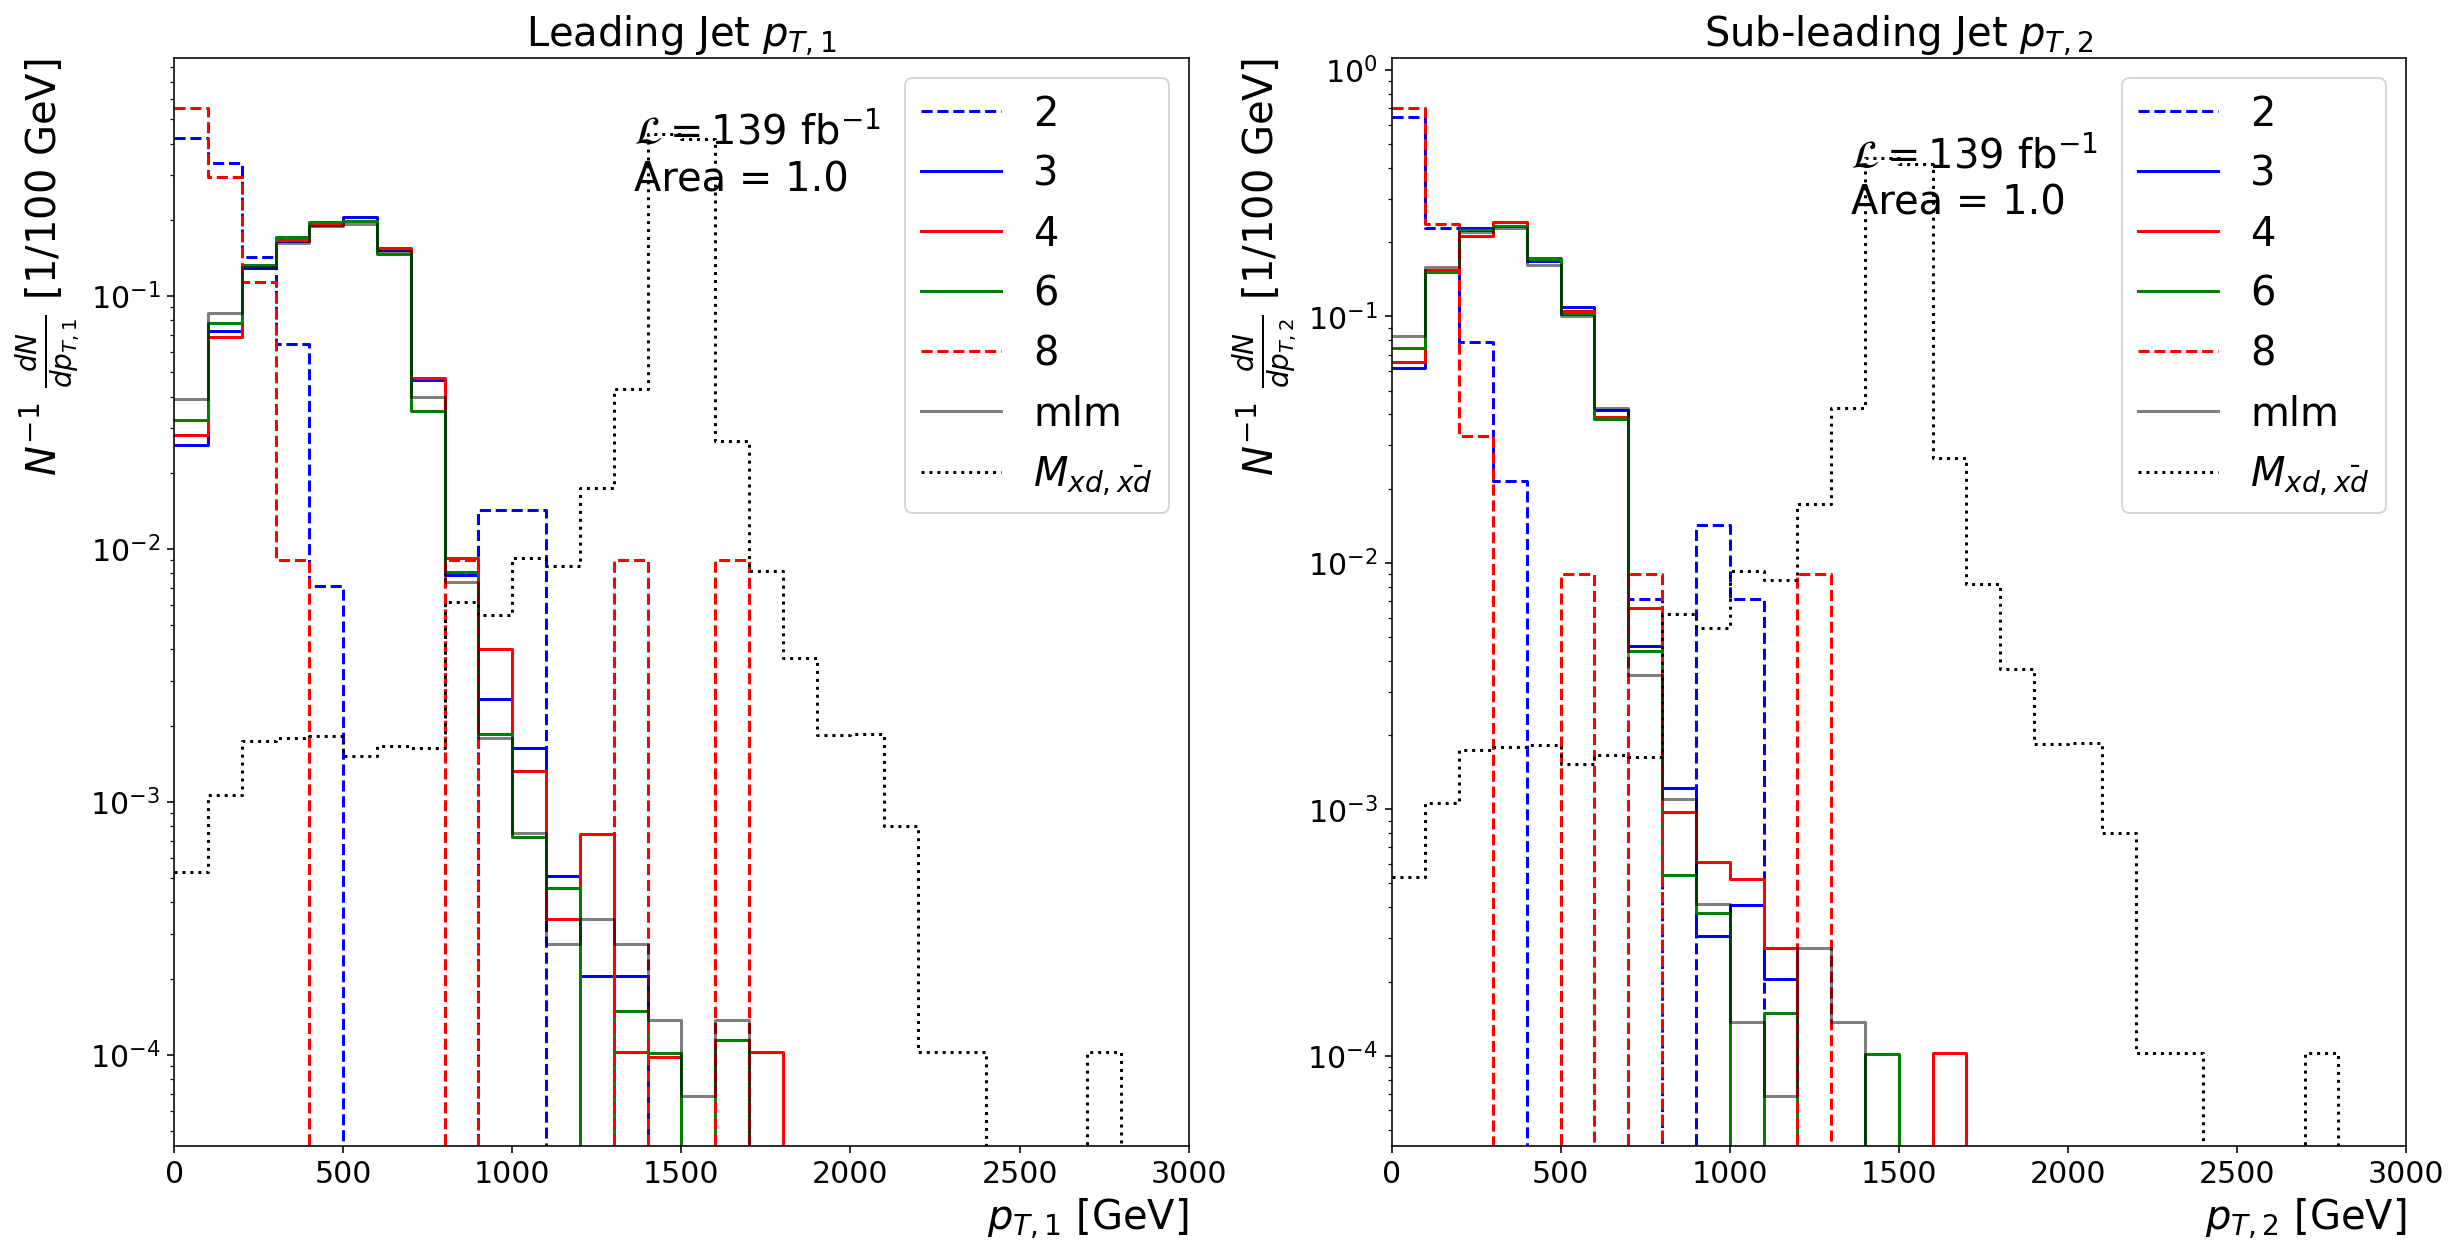

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))
binning = np.linspace(0, 5000, 51)

# figure 1
hist_1, bins_1 = np.histogram(list_truth_results_filterDM_1[4], bins=binning,
                              weights=list_weight[0][list_truth_results_filterDM_1[3]]*LUMINOSITY*1000)
hist_2, bins_2 = np.histogram(list_truth_results_filterDM_2[4], bins=binning,
                              weights=list_weight[1][list_truth_results_filterDM_2[3]]*LUMINOSITY*1000)
hist_3, bins_3 = np.histogram(list_truth_results_filterDM_3[4], bins=binning,
                              weights=list_weight[2][list_truth_results_filterDM_3[3]]*LUMINOSITY*1000)
hist_4, bins_4 = np.histogram(list_truth_results_filterDM_4[4], bins=binning,
                              weights=list_weight[3][list_truth_results_filterDM_4[3]]*LUMINOSITY*1000)
hist_5, bins_5 = np.histogram(list_truth_results_filterDM_5[4], bins=binning,
                              weights=list_weight[4][list_truth_results_filterDM_5[3]]*LUMINOSITY*1000)
hist_6, bins_6 = np.histogram(list_truth_results_filterDM_6[4], bins=binning,
                              weights=list_weight[5][list_truth_results_filterDM_6[3]]*LUMINOSITY*1000)
hist_7, bins_7 = np.histogram(list_truth_results_filterDM_7[4], bins=binning,
                              weights=list_weight[6][list_truth_results_filterDM_7[3]]*LUMINOSITY*1000)
hist_8, bins_8 = np.histogram(list_truth_results_filterDM_8[4], bins=binning,
                              weights=list_weight[7][list_truth_results_filterDM_8[3]]*LUMINOSITY*1000)
hist_9, bins_9 = np.histogram(list_truth_results_filterDM_9[4], bins=binning,
                              weights=list_weight[8][list_truth_results_filterDM_9[3]]*LUMINOSITY*1000)
hist_10, bins_10 = np.histogram(list_truth_results_filterDM_10[4], bins=binning,
                              weights=list_weight[9][list_truth_results_filterDM_10[3]]*LUMINOSITY*1000)
hist_4_1, bins_4_1 = np.histogram(list_truth_results_filterDM_4_1[4], bins=binning,
                              weights=list_weight[10][list_truth_results_filterDM_4_1[3]]*LUMINOSITY*1000)
hist_mlm, bins_mlm = np.histogram(list_truth_results_filterDM_mlm[4], bins=binning,
                              weights=list_weight[11][list_truth_results_filterDM_mlm[3]]*LUMINOSITY*1000)
hist_4_xdxdx, bins_4_xdxdx = np.histogram(m_xdxdbar_4, bins=binning, weights=list_weight[3])

axs[0].step(bins_2[:-1], hist_2/np.sum(hist_2), where='post', color='blue', linestyle='--', label="2")
axs[0].step(bins_3[:-1], hist_3/np.sum(hist_3), where='post', color='blue', label="3")
axs[0].step(bins_4[:-1], hist_4/np.sum(hist_4), where='post', color='red', label="4")
# axs[0].step(bins_5[:-1], hist_5/np.sum(hist_5), where='post', color='orange', linestyle='-.', alpha=0.5, label="5")
axs[0].step(bins_6[:-1], hist_6/np.sum(hist_6), where='post', color='green', label="6")
# axs[0].step(bins_7[:-1], hist_7/np.sum(hist_7), where='post', color='pink', alpha=0.5, label="7")
axs[0].step(bins_8[:-1], hist_8/np.sum(hist_8), where='post', color='red', linestyle='--', label="8")
axs[0].step(bins_mlm[:-1], hist_mlm/np.sum(hist_mlm), where='post', color='black', alpha=0.5, label="mlm")
# text
axs[0].text(1360, 0.4, "$\mathcal{L} = $"+str(LUMINOSITY)+"$\ \mathrm{fb}^{-1}$", fontsize=20)
# axs[1].text(1980, 0.007, "$M_{Z^\prime} = 1500$ GeV", fontsize=20)
axs[0].text(1360, 0.26, "Area = "+str(np.round(np.sum(hist_4.astype(np.float32)/np.sum(hist_4)),2)), fontsize=20)
axs[0].step(bins_4_xdxdx[:-1], hist_4_xdxdx/np.sum(hist_4_xdxdx), where='post', color='black',
            linestyle=':', label="$M_{xd,\\bar{xd}}$")
# axes setting
axs[0].legend(fontsize=20)
axs[0].set_xlabel("$p_{T,1}$ [GeV]", fontsize=20, horizontalalignment='right', x=1)
axs[0].set_ylabel("$N^{-1}\ \\frac{dN}{dp_{T,1}}$ [1/100 GeV]", fontsize=20, horizontalalignment='right', y=1)
axs[0].set_title("Leading Jet $p_{T,1}$", fontsize=20)
axs[0].set_xlim(0,3000)
axs[0].set_yscale('log')
axs[0].tick_params(axis='both', labelsize=15)


# figure 2
hist_1, bins_1 = np.histogram(list_truth_results_filterDM_1[5], bins=binning,
                              weights=list_weight[0][list_truth_results_filterDM_1[3]]*LUMINOSITY*1000)
hist_2, bins_2 = np.histogram(list_truth_results_filterDM_2[5], bins=binning,
                              weights=list_weight[1][list_truth_results_filterDM_2[3]]*LUMINOSITY*1000)
hist_3, bins_3 = np.histogram(list_truth_results_filterDM_3[5], bins=binning,
                              weights=list_weight[2][list_truth_results_filterDM_3[3]]*LUMINOSITY*1000)
hist_4, bins_4 = np.histogram(list_truth_results_filterDM_4[5], bins=binning,
                              weights=list_weight[3][list_truth_results_filterDM_4[3]]*LUMINOSITY*1000)
hist_5, bins_5 = np.histogram(list_truth_results_filterDM_5[5], bins=binning,
                              weights=list_weight[4][list_truth_results_filterDM_5[3]]*LUMINOSITY*1000)
hist_6, bins_6 = np.histogram(list_truth_results_filterDM_6[5], bins=binning,
                              weights=list_weight[5][list_truth_results_filterDM_6[3]]*LUMINOSITY*1000)
hist_7, bins_7 = np.histogram(list_truth_results_filterDM_7[5], bins=binning,
                              weights=list_weight[6][list_truth_results_filterDM_7[3]]*LUMINOSITY*1000)
hist_8, bins_8 = np.histogram(list_truth_results_filterDM_8[5], bins=binning,
                              weights=list_weight[7][list_truth_results_filterDM_8[3]]*LUMINOSITY*1000)
hist_9, bins_9 = np.histogram(list_truth_results_filterDM_9[5], bins=binning,
                              weights=list_weight[8][list_truth_results_filterDM_9[3]]*LUMINOSITY*1000)
hist_10, bins_10 = np.histogram(list_truth_results_filterDM_10[5], bins=binning,
                              weights=list_weight[9][list_truth_results_filterDM_10[3]]*LUMINOSITY*1000)
hist_4_1, bins_4_1 = np.histogram(list_truth_results_filterDM_4_1[5], bins=binning,
                              weights=list_weight[10][list_truth_results_filterDM_4_1[3]]*LUMINOSITY*1000)
hist_mlm, bins_mlm = np.histogram(list_truth_results_filterDM_mlm[5], bins=binning,
                              weights=list_weight[11][list_truth_results_filterDM_mlm[3]]*LUMINOSITY*1000)
hist_4_xdxdx, bins_4_xdxdx = np.histogram(m_xdxdbar_4, bins=binning, weights=list_weight[3])

axs[1].step(bins_2[:-1], hist_2/np.sum(hist_2), where='post', color='blue', linestyle='--', label="2")
axs[1].step(bins_3[:-1], hist_3/np.sum(hist_3), where='post', color='blue', label="3")
axs[1].step(bins_4[:-1], hist_4/np.sum(hist_4), where='post', color='red', label="4")
# axs[0].step(bins_5[:-1], hist_5/np.sum(hist_5), where='post', color='orange', linestyle='-.', alpha=0.5, label="5")
axs[1].step(bins_6[:-1], hist_6/np.sum(hist_6), where='post', color='green', label="6")
# axs[0].step(bins_7[:-1], hist_7/np.sum(hist_7), where='post', color='pink', alpha=0.5, label="7")
axs[1].step(bins_8[:-1], hist_8/np.sum(hist_8), where='post', color='red', linestyle='--', label="8")
axs[1].step(bins_mlm[:-1], hist_mlm/np.sum(hist_mlm), where='post', color='black', alpha=0.5, label="mlm")
# text
axs[1].text(1360, 0.4, "$\mathcal{L} = $"+str(LUMINOSITY)+"$\ \mathrm{fb}^{-1}$", fontsize=20)
# axs[1].text(1980, 0.007, "$M_{Z^\prime} = 1500$ GeV", fontsize=20)
axs[1].text(1360, 0.26, "Area = "+str(np.round(np.sum(hist_4.astype(np.float32)/np.sum(hist_4)),2)), fontsize=20)
axs[1].step(bins_4_xdxdx[:-1], hist_4_xdxdx/np.sum(hist_4_xdxdx), where='post', color='black',
            linestyle=':', label="$M_{xd,\\bar{xd}}$")
# axes setting
axs[1].legend(fontsize=20)
axs[1].set_xlabel("$p_{T,2}$ [GeV]", fontsize=20, horizontalalignment='right', x=1)
axs[1].set_ylabel("$N^{-1}\ \\frac{dN}{dp_{T,2}}$ [1/100 GeV]", fontsize=20, horizontalalignment='right', y=1)
axs[1].set_title("Sub-leading Jet $p_{T,2}$", fontsize=20)
axs[1].set_xlim(0,3000)
axs[1].set_yscale('log')
axs[1].tick_params(axis='both', labelsize=15)

### 8-3. $MET$ and $M_T(jj,MET)$

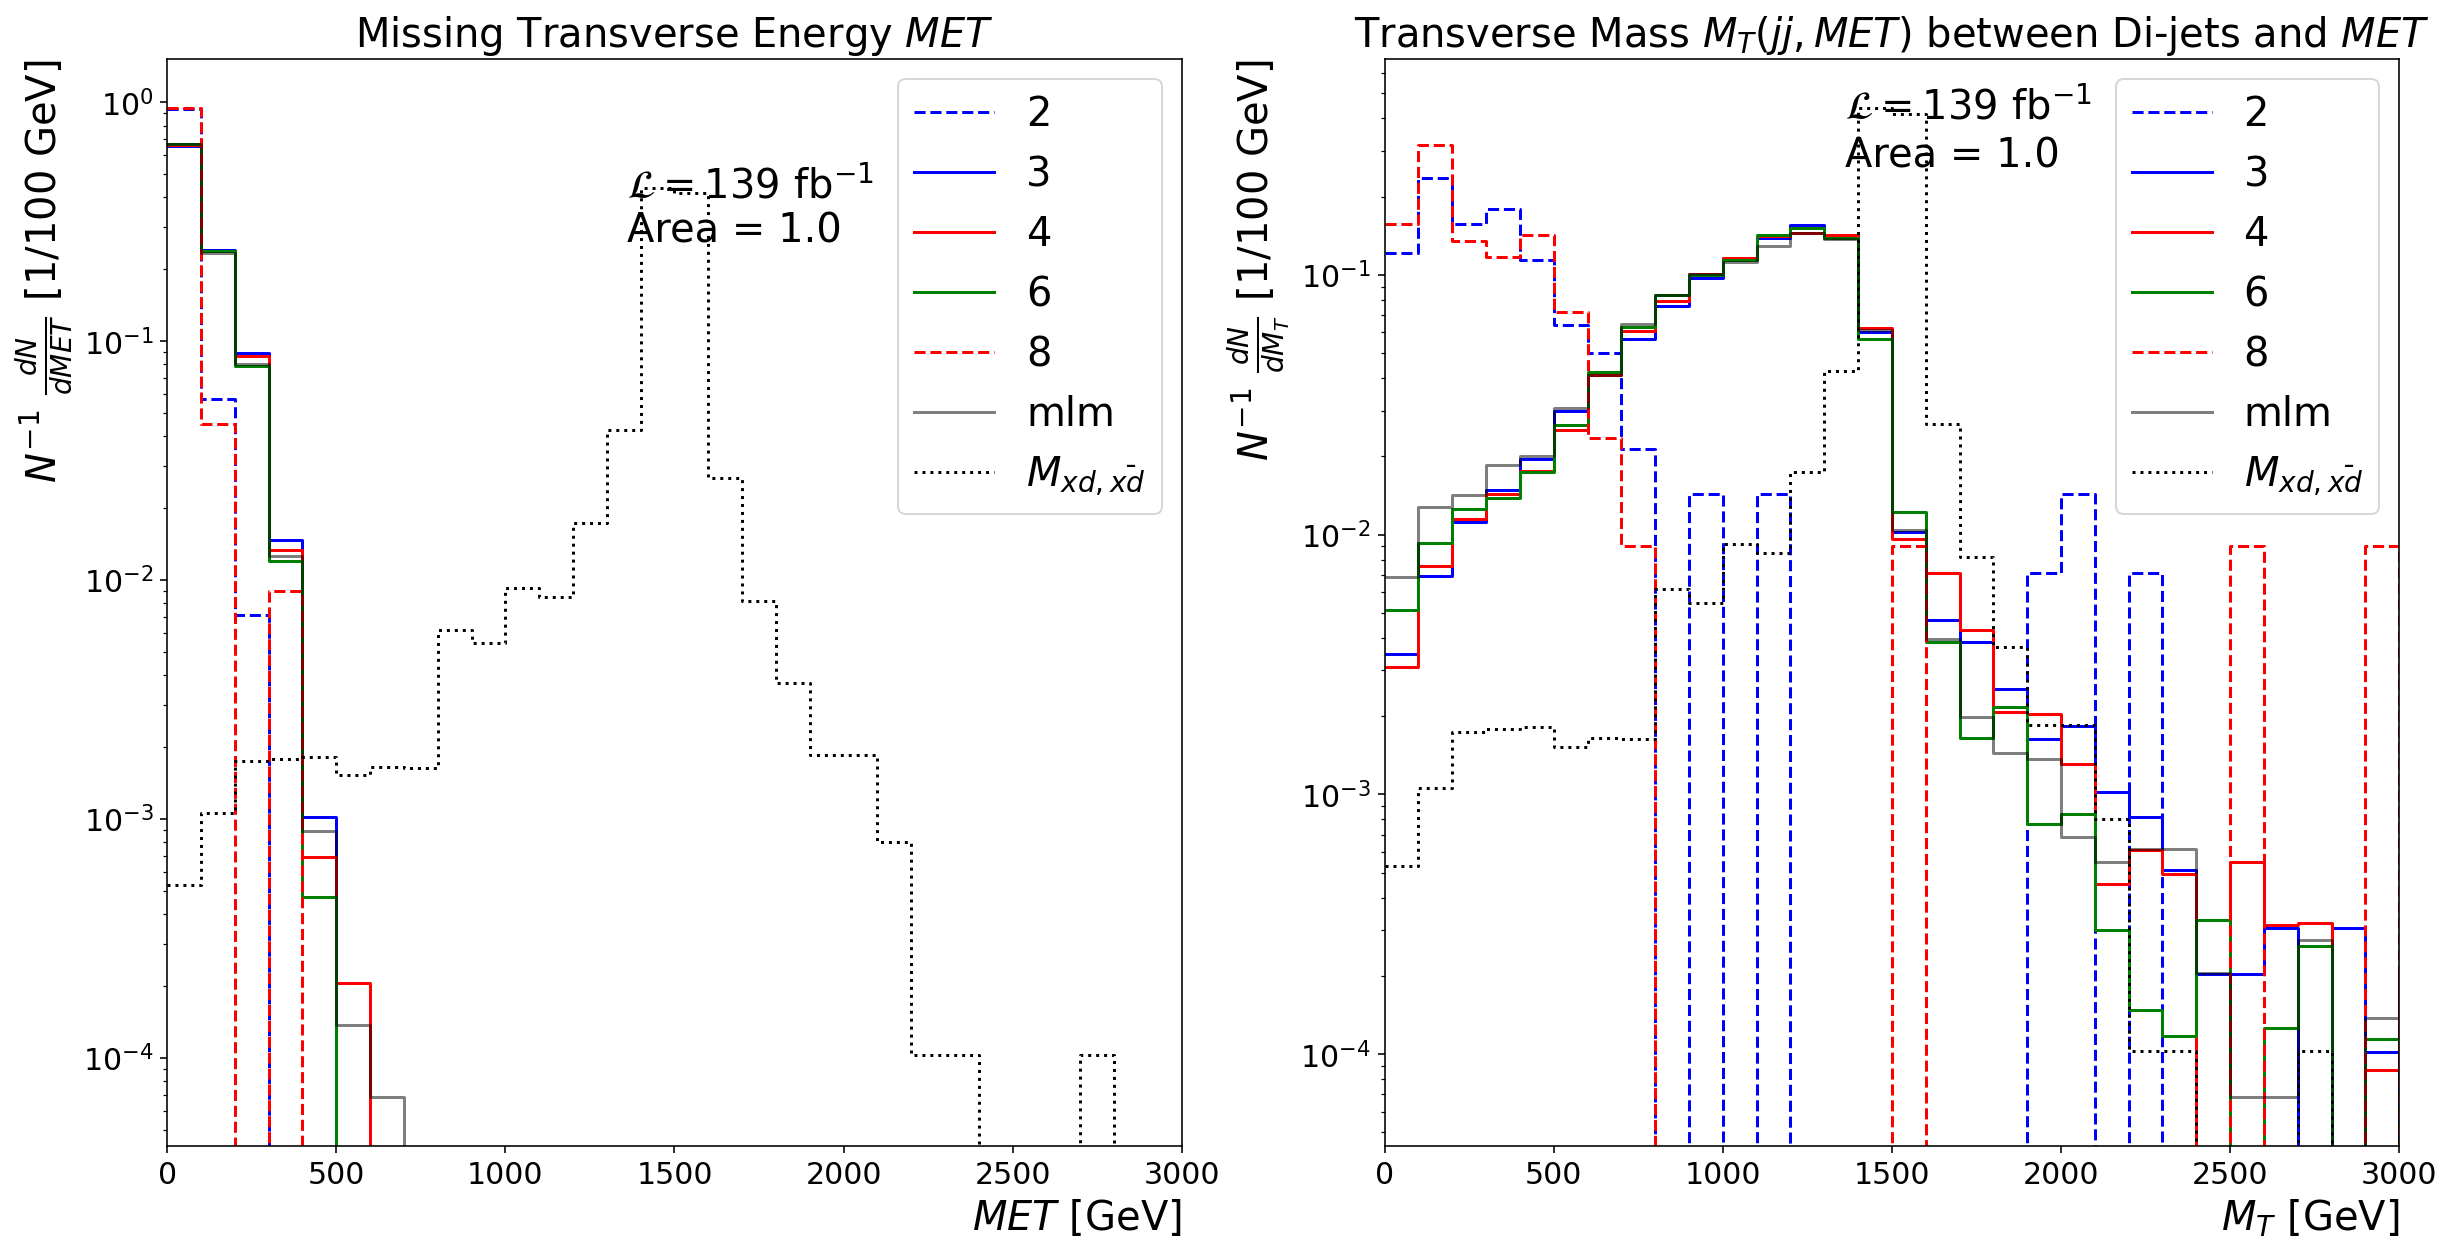

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))
binning = np.linspace(0, 5000, 51)

# figure 1
hist_1, bins_1 = np.histogram(list_MET_truth_results_1[0], bins=binning,
                              weights=list_weight[0])
hist_2, bins_2 = np.histogram(list_MET_truth_results_2[0], bins=binning,
                              weights=list_weight[1])
hist_3, bins_3 = np.histogram(list_MET_truth_results_3[0], bins=binning,
                              weights=list_weight[2])
hist_4, bins_4 = np.histogram(list_MET_truth_results_4[0], bins=binning,
                              weights=list_weight[3])
hist_5, bins_5 = np.histogram(list_MET_truth_results_5[0], bins=binning,
                              weights=list_weight[4])
hist_6, bins_6 = np.histogram(list_MET_truth_results_6[0], bins=binning,
                              weights=list_weight[5])
hist_7, bins_7 = np.histogram(list_MET_truth_results_7[0], bins=binning,
                              weights=list_weight[6])
hist_8, bins_8 = np.histogram(list_MET_truth_results_8[0], bins=binning,
                              weights=list_weight[7])
hist_9, bins_9 = np.histogram(list_MET_truth_results_9[0], bins=binning,
                              weights=list_weight[8])
hist_10, bins_10 = np.histogram(list_MET_truth_results_10[0], bins=binning,
                              weights=list_weight[9])
hist_4_1, bins_4_1 = np.histogram(list_MET_truth_results_4_1[0], bins=binning,
                              weights=list_weight[10])
hist_mlm, bins_mlm = np.histogram(list_MET_truth_results_mlm[0], bins=binning,
                              weights=list_weight[11])
hist_4_xdxdx, bins_4_xdxdx = np.histogram(m_xdxdbar_4, bins=binning, weights=list_weight[3])

axs[0].step(bins_2[:-1], hist_2/np.sum(hist_2), where='post', color='blue', linestyle='--', label="2")
axs[0].step(bins_3[:-1], hist_3/np.sum(hist_3), where='post', color='blue', label="3")
axs[0].step(bins_4[:-1], hist_4/np.sum(hist_4), where='post', color='red', label="4")
# axs[0].step(bins_5[:-1], hist_5/np.sum(hist_5), where='post', color='orange', linestyle='-.', alpha=0.5, label="5")
axs[0].step(bins_6[:-1], hist_6/np.sum(hist_6), where='post', color='green', label="6")
# axs[0].step(bins_7[:-1], hist_7/np.sum(hist_7), where='post', color='pink', alpha=0.5, label="7")
axs[0].step(bins_8[:-1], hist_8/np.sum(hist_8), where='post', color='red', linestyle='--', label="8")
axs[0].step(bins_mlm[:-1], hist_mlm/np.sum(hist_mlm), where='post', color='black', alpha=0.5, label="mlm")
# text
axs[0].text(1360, 0.4, "$\mathcal{L} = $"+str(LUMINOSITY)+"$\ \mathrm{fb}^{-1}$", fontsize=20)
# axs[1].text(1980, 0.007, "$M_{Z^\prime} = 1500$ GeV", fontsize=20)
axs[0].text(1360, 0.26, "Area = "+str(np.round(np.sum(hist_4.astype(np.float32)/np.sum(hist_4)),2)), fontsize=20)
axs[0].step(bins_4_xdxdx[:-1], hist_4_xdxdx/np.sum(hist_4_xdxdx), where='post', color='black',
            linestyle=':', label="$M_{xd,\\bar{xd}}$")
# axes setting
axs[0].legend(fontsize=20)
axs[0].set_xlabel("$MET$ [GeV]", fontsize=20, horizontalalignment='right', x=1)
axs[0].set_ylabel("$N^{-1}\ \\frac{dN}{dMET}$ [1/100 GeV]", fontsize=20, horizontalalignment='right', y=1)
axs[0].set_title("Missing Transverse Energy $MET$", fontsize=20)
axs[0].set_xlim(0,3000)
axs[0].set_yscale('log')
axs[0].tick_params(axis='both', labelsize=15)


# figure 2
hist_1, bins_1 = np.histogram(list_MET_truth_results_1[2], bins=binning,
                              weights=list_weight[0][list_truth_results_filterDM_1[3]]*LUMINOSITY*1000)
hist_2, bins_2 = np.histogram(list_MET_truth_results_2[2], bins=binning,
                              weights=list_weight[1][list_truth_results_filterDM_2[3]]*LUMINOSITY*1000)
hist_3, bins_3 = np.histogram(list_MET_truth_results_3[2], bins=binning,
                              weights=list_weight[2][list_truth_results_filterDM_3[3]]*LUMINOSITY*1000)
hist_4, bins_4 = np.histogram(list_MET_truth_results_4[2], bins=binning,
                              weights=list_weight[3][list_truth_results_filterDM_4[3]]*LUMINOSITY*1000)
hist_5, bins_5 = np.histogram(list_MET_truth_results_5[2], bins=binning,
                              weights=list_weight[4][list_truth_results_filterDM_5[3]]*LUMINOSITY*1000)
hist_6, bins_6 = np.histogram(list_MET_truth_results_6[2], bins=binning,
                              weights=list_weight[5][list_truth_results_filterDM_6[3]]*LUMINOSITY*1000)
hist_7, bins_7 = np.histogram(list_MET_truth_results_7[2], bins=binning,
                              weights=list_weight[6][list_truth_results_filterDM_7[3]]*LUMINOSITY*1000)
hist_8, bins_8 = np.histogram(list_MET_truth_results_8[2], bins=binning,
                              weights=list_weight[7][list_truth_results_filterDM_8[3]]*LUMINOSITY*1000)
hist_9, bins_9 = np.histogram(list_MET_truth_results_9[2], bins=binning,
                              weights=list_weight[8][list_truth_results_filterDM_9[3]]*LUMINOSITY*1000)
hist_10, bins_10 = np.histogram(list_MET_truth_results_10[2], bins=binning,
                              weights=list_weight[9][list_truth_results_filterDM_10[3]]*LUMINOSITY*1000)
hist_4_1, bins_4_1 = np.histogram(list_MET_truth_results_4_1[2], bins=binning,
                              weights=list_weight[10][list_truth_results_filterDM_4_1[3]]*LUMINOSITY*1000)
hist_mlm, bins_mlm = np.histogram(list_MET_truth_results_mlm[2], bins=binning,
                              weights=list_weight[11][list_truth_results_filterDM_mlm[3]]*LUMINOSITY*1000)
hist_4_xdxdx, bins_4_xdxdx = np.histogram(m_xdxdbar_4, bins=binning, weights=list_weight[3])

axs[1].step(bins_2[:-1], hist_2/np.sum(hist_2), where='post', color='blue', linestyle='--', label="2")
axs[1].step(bins_3[:-1], hist_3/np.sum(hist_3), where='post', color='blue', label="3")
axs[1].step(bins_4[:-1], hist_4/np.sum(hist_4), where='post', color='red', label="4")
# axs[0].step(bins_5[:-1], hist_5/np.sum(hist_5), where='post', color='orange', linestyle='-.', alpha=0.5, label="5")
axs[1].step(bins_6[:-1], hist_6/np.sum(hist_6), where='post', color='green', label="6")
# axs[0].step(bins_7[:-1], hist_7/np.sum(hist_7), where='post', color='pink', alpha=0.5, label="7")
axs[1].step(bins_8[:-1], hist_8/np.sum(hist_8), where='post', color='red', linestyle='--', label="8")
axs[1].step(bins_mlm[:-1], hist_mlm/np.sum(hist_mlm), where='post', color='black', alpha=0.5, label="mlm")
# text
axs[1].text(1360, 0.4, "$\mathcal{L} = $"+str(LUMINOSITY)+"$\ \mathrm{fb}^{-1}$", fontsize=20)
# axs[1].text(1980, 0.007, "$M_{Z^\prime} = 1500$ GeV", fontsize=20)
axs[1].text(1360, 0.26, "Area = "+str(np.round(np.sum(hist_4.astype(np.float32)/np.sum(hist_4)),2)), fontsize=20)
axs[1].step(bins_4_xdxdx[:-1], hist_4_xdxdx/np.sum(hist_4_xdxdx), where='post', color='black',
            linestyle=':', label="$M_{xd,\\bar{xd}}$")
# axes setting
axs[1].legend(fontsize=20)
axs[1].set_xlabel("$M_T$ [GeV]", fontsize=20, horizontalalignment='right', x=1)
axs[1].set_ylabel("$N^{-1}\ \\frac{dN}{dM_T}$ [1/100 GeV]", fontsize=20, horizontalalignment='right', y=1)
axs[1].set_title("Transverse Mass $M_T(jj,MET)$ between Di-jets and $MET$", fontsize=20)
axs[1].set_xlim(0,3000)
axs[1].set_yscale('log')
axs[1].tick_params(axis='both', labelsize=15)

### 8-4. $\Delta\phi(jj)$ and $\Delta\phi(j_1,MET)$

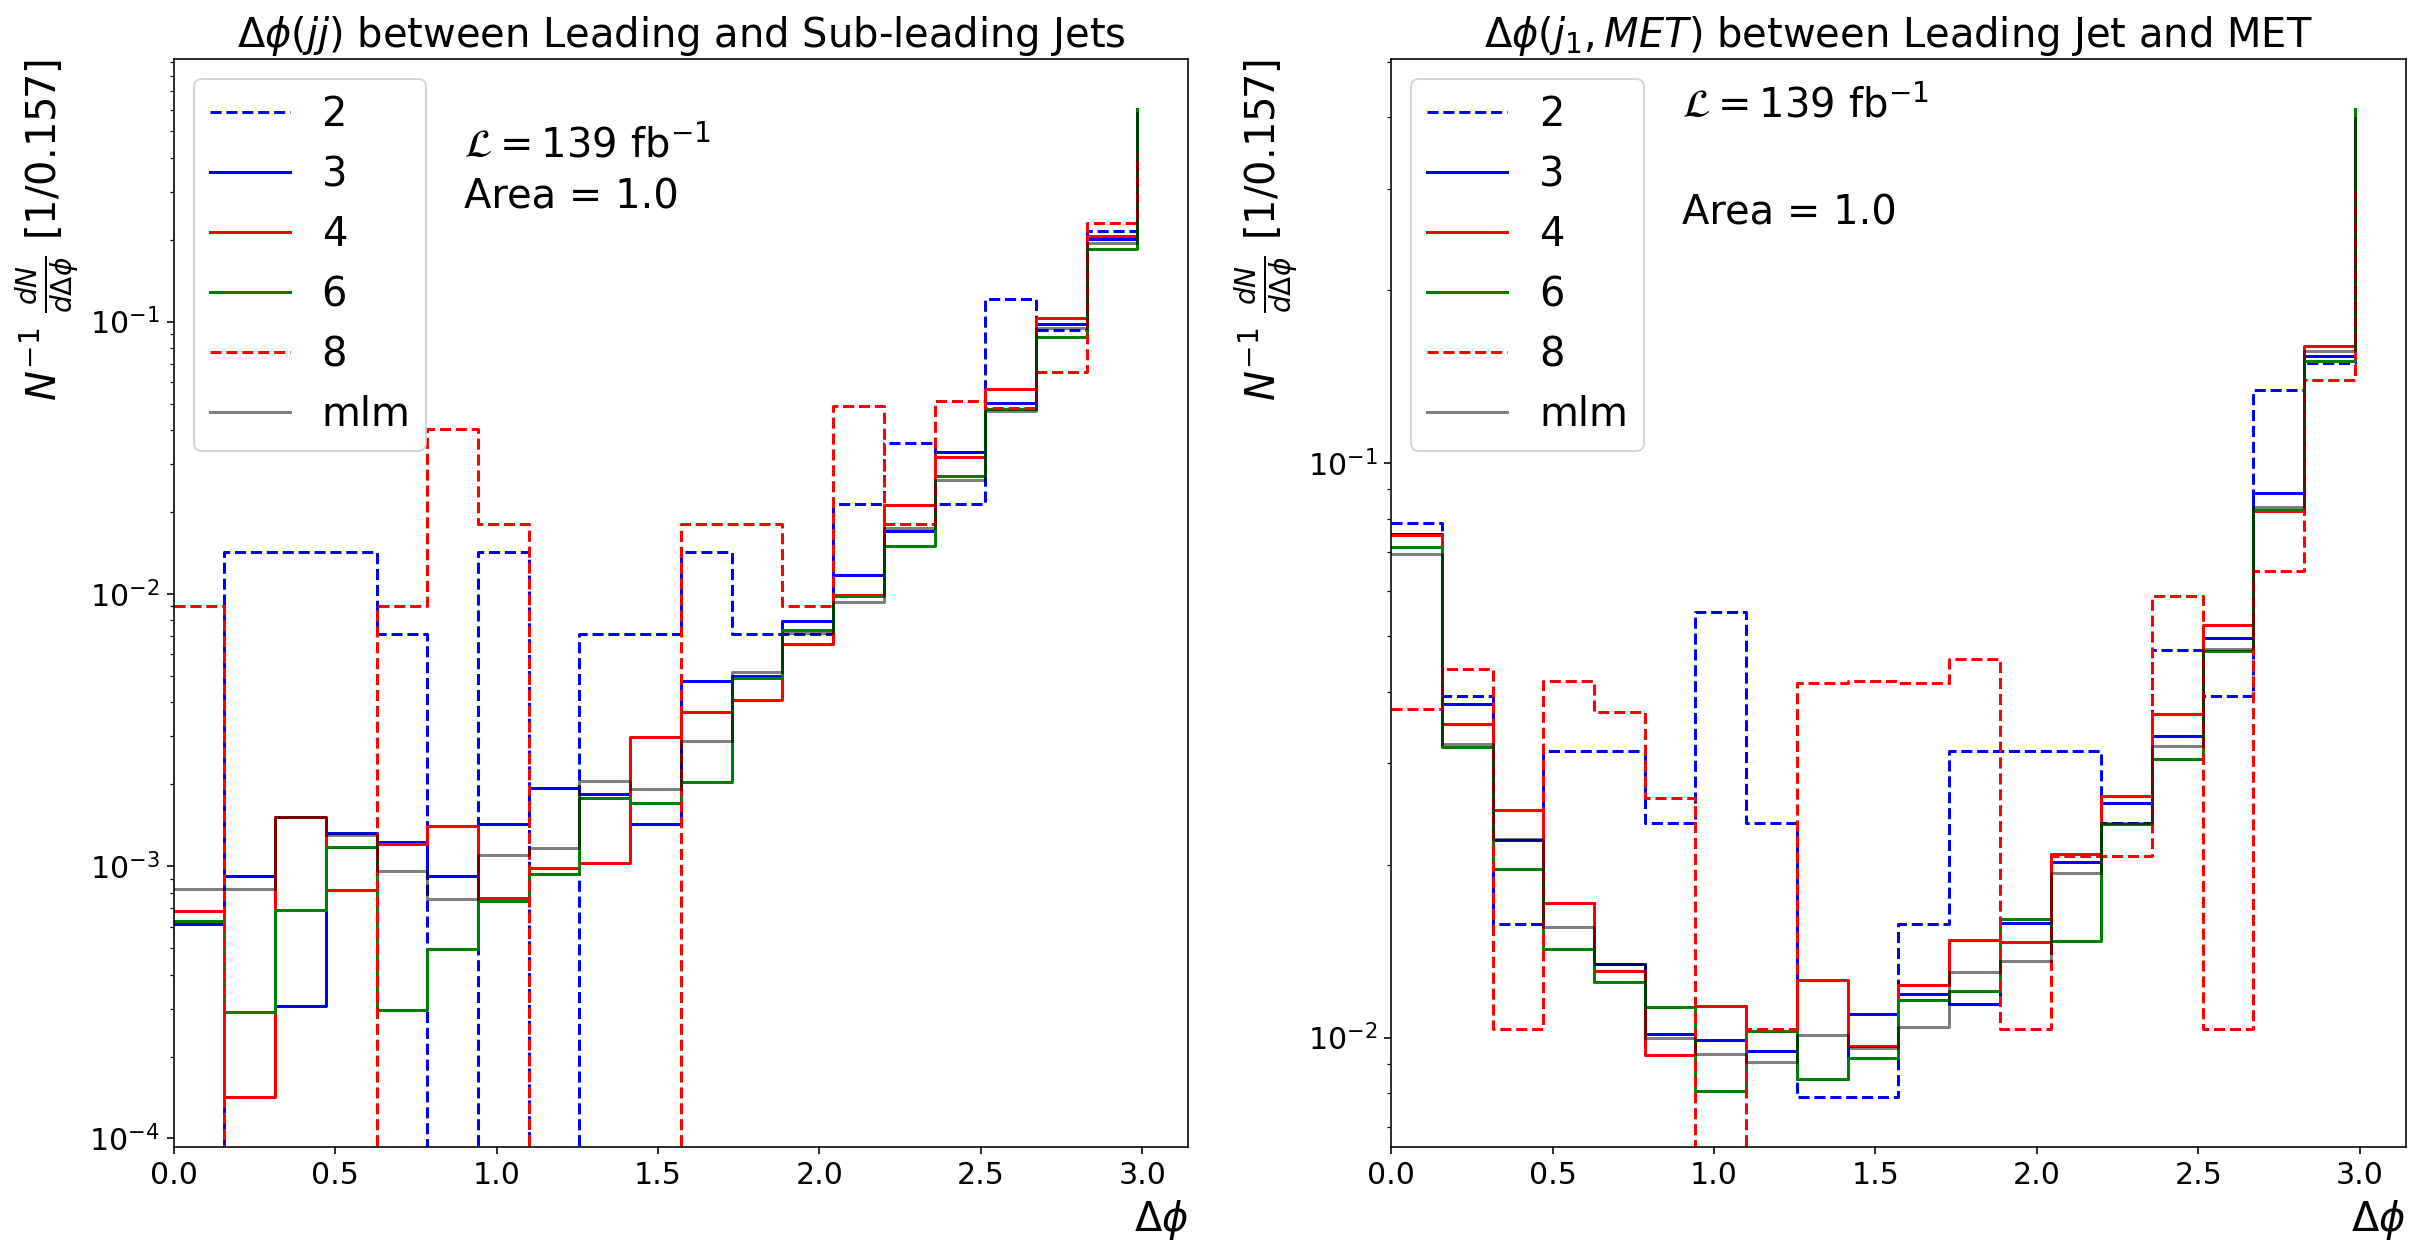

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))
binning = np.linspace(0, np.pi, 21)

# figure 1
hist_1, bins_1 = np.histogram(list_truth_results_filterDM_1[6], bins=binning,
                              weights=list_weight[0][list_truth_results_filterDM_1[3]]*LUMINOSITY*1000)
hist_2, bins_2 = np.histogram(list_truth_results_filterDM_2[6], bins=binning,
                              weights=list_weight[1][list_truth_results_filterDM_2[3]]*LUMINOSITY*1000)
hist_3, bins_3 = np.histogram(list_truth_results_filterDM_3[6], bins=binning,
                              weights=list_weight[2][list_truth_results_filterDM_3[3]]*LUMINOSITY*1000)
hist_4, bins_4 = np.histogram(list_truth_results_filterDM_4[6], bins=binning,
                              weights=list_weight[3][list_truth_results_filterDM_4[3]]*LUMINOSITY*1000)
hist_5, bins_5 = np.histogram(list_truth_results_filterDM_5[6], bins=binning,
                              weights=list_weight[4][list_truth_results_filterDM_5[3]]*LUMINOSITY*1000)
hist_6, bins_6 = np.histogram(list_truth_results_filterDM_6[6], bins=binning,
                              weights=list_weight[5][list_truth_results_filterDM_6[3]]*LUMINOSITY*1000)
hist_7, bins_7 = np.histogram(list_truth_results_filterDM_7[6], bins=binning,
                              weights=list_weight[6][list_truth_results_filterDM_7[3]]*LUMINOSITY*1000)
hist_8, bins_8 = np.histogram(list_truth_results_filterDM_8[6], bins=binning,
                              weights=list_weight[7][list_truth_results_filterDM_8[3]]*LUMINOSITY*1000)
hist_9, bins_9 = np.histogram(list_truth_results_filterDM_9[6], bins=binning,
                              weights=list_weight[8][list_truth_results_filterDM_9[3]]*LUMINOSITY*1000)
hist_10, bins_10 = np.histogram(list_truth_results_filterDM_10[6], bins=binning,
                              weights=list_weight[9][list_truth_results_filterDM_10[3]]*LUMINOSITY*1000)
hist_4_1, bins_4_1 = np.histogram(list_truth_results_filterDM_4_1[6], bins=binning,
                              weights=list_weight[10][list_truth_results_filterDM_4_1[3]]*LUMINOSITY*1000)
hist_mlm, bins_mlm = np.histogram(list_truth_results_filterDM_mlm[6], bins=binning,
                              weights=list_weight[11][list_truth_results_filterDM_mlm[3]]*LUMINOSITY*1000)

axs[0].step(bins_2[:-1], hist_2/np.sum(hist_2), where='post', color='blue', linestyle='--', label="2")
axs[0].step(bins_3[:-1], hist_3/np.sum(hist_3), where='post', color='blue', label="3")
axs[0].step(bins_4[:-1], hist_4/np.sum(hist_4), where='post', color='red', label="4")
# axs[0].step(bins_5[:-1], hist_5/np.sum(hist_5), where='post', color='orange', linestyle='-.', alpha=0.5, label="5")
axs[0].step(bins_6[:-1], hist_6/np.sum(hist_6), where='post', color='green', label="6")
# axs[0].step(bins_7[:-1], hist_7/np.sum(hist_7), where='post', color='pink', alpha=0.5, label="7")
axs[0].step(bins_8[:-1], hist_8/np.sum(hist_8), where='post', color='red', linestyle='--', label="8")
axs[0].step(bins_mlm[:-1], hist_mlm/np.sum(hist_mlm), where='post', color='black', alpha=0.5, label="mlm")
# text
axs[0].text(0.9, 0.4, "$\mathcal{L} = $"+str(LUMINOSITY)+"$\ \mathrm{fb}^{-1}$", fontsize=20)
# axs[1].text(1980, 0.007, "$M_{Z^\prime} = 1500$ GeV", fontsize=20)
axs[0].text(0.9, 0.26, "Area = "+str(np.round(np.sum(hist_4.astype(np.float32)/np.sum(hist_4)),2)), fontsize=20)
# axes setting
axs[0].legend(fontsize=20)
axs[0].set_xlabel("$\Delta\phi$", fontsize=20, horizontalalignment='right', x=1)
axs[0].set_ylabel("$N^{-1}\ \\frac{dN}{d\Delta\phi}$ [1/0.157]", fontsize=20, horizontalalignment='right', y=1)
axs[0].set_title("$\Delta\phi(jj)$ between Leading and Sub-leading Jets", fontsize=20)
axs[0].set_xlim(0,np.pi)
axs[0].set_yscale('log')
axs[0].tick_params(axis='both', labelsize=15)


# figure 2
hist_1, bins_1 = np.histogram(list_MET_truth_results_1[3], bins=binning,
                              weights=list_weight[0][list_truth_results_filterDM_1[3]]*LUMINOSITY*1000)
hist_2, bins_2 = np.histogram(list_MET_truth_results_2[3], bins=binning,
                              weights=list_weight[1][list_truth_results_filterDM_2[3]]*LUMINOSITY*1000)
hist_3, bins_3 = np.histogram(list_MET_truth_results_3[3], bins=binning,
                              weights=list_weight[2][list_truth_results_filterDM_3[3]]*LUMINOSITY*1000)
hist_4, bins_4 = np.histogram(list_MET_truth_results_4[3], bins=binning,
                              weights=list_weight[3][list_truth_results_filterDM_4[3]]*LUMINOSITY*1000)
hist_5, bins_5 = np.histogram(list_MET_truth_results_5[3], bins=binning,
                              weights=list_weight[4][list_truth_results_filterDM_5[3]]*LUMINOSITY*1000)
hist_6, bins_6 = np.histogram(list_MET_truth_results_6[3], bins=binning,
                              weights=list_weight[5][list_truth_results_filterDM_6[3]]*LUMINOSITY*1000)
hist_7, bins_7 = np.histogram(list_MET_truth_results_7[3], bins=binning,
                              weights=list_weight[6][list_truth_results_filterDM_7[3]]*LUMINOSITY*1000)
hist_8, bins_8 = np.histogram(list_MET_truth_results_8[3], bins=binning,
                              weights=list_weight[7][list_truth_results_filterDM_8[3]]*LUMINOSITY*1000)
hist_9, bins_9 = np.histogram(list_MET_truth_results_9[3], bins=binning,
                              weights=list_weight[8][list_truth_results_filterDM_9[3]]*LUMINOSITY*1000)
hist_10, bins_10 = np.histogram(list_MET_truth_results_10[3], bins=binning,
                              weights=list_weight[9][list_truth_results_filterDM_10[3]]*LUMINOSITY*1000)
hist_4_1, bins_4_1 = np.histogram(list_MET_truth_results_4_1[3], bins=binning,
                              weights=list_weight[10][list_truth_results_filterDM_4_1[3]]*LUMINOSITY*1000)
hist_mlm, bins_mlm = np.histogram(list_MET_truth_results_mlm[3], bins=binning,
                              weights=list_weight[11][list_truth_results_filterDM_mlm[3]]*LUMINOSITY*1000)

axs[1].step(bins_2[:-1], hist_2/np.sum(hist_2), where='post', color='blue', linestyle='--', label="2")
axs[1].step(bins_3[:-1], hist_3/np.sum(hist_3), where='post', color='blue', label="3")
axs[1].step(bins_4[:-1], hist_4/np.sum(hist_4), where='post', color='red', label="4")
# axs[0].step(bins_5[:-1], hist_5/np.sum(hist_5), where='post', color='orange', linestyle='-.', alpha=0.5, label="5")
axs[1].step(bins_6[:-1], hist_6/np.sum(hist_6), where='post', color='green', label="6")
# axs[0].step(bins_7[:-1], hist_7/np.sum(hist_7), where='post', color='pink', alpha=0.5, label="7")
axs[1].step(bins_8[:-1], hist_8/np.sum(hist_8), where='post', color='red', linestyle='--', label="8")
axs[1].step(bins_mlm[:-1], hist_mlm/np.sum(hist_mlm), where='post', color='black', alpha=0.5, label="mlm")
# text
axs[1].text(0.9, 0.4, "$\mathcal{L} = $"+str(LUMINOSITY)+"$\ \mathrm{fb}^{-1}$", fontsize=20)
# axs[1].text(1980, 0.007, "$M_{Z^\prime} = 1500$ GeV", fontsize=20)
axs[1].text(0.9, 0.26, "Area = "+str(np.round(np.sum(hist_4.astype(np.float32)/np.sum(hist_4)),2)), fontsize=20)
# axes setting
axs[1].legend(fontsize=20)
axs[1].set_xlabel("$\Delta\phi$", fontsize=20, horizontalalignment='right', x=1)
axs[1].set_ylabel("$N^{-1}\ \\frac{dN}{d\Delta\phi}$ [1/0.157]", fontsize=20, horizontalalignment='right', y=1)
axs[1].set_title("$\Delta\phi(j_1,MET)$ between Leading Jet and MET", fontsize=20)
axs[1].set_xlim(0,np.pi)
axs[1].set_yscale('log')
axs[1].tick_params(axis='both', labelsize=15)

## 9. Plot 3

### 9-1. Invariant mass $M$

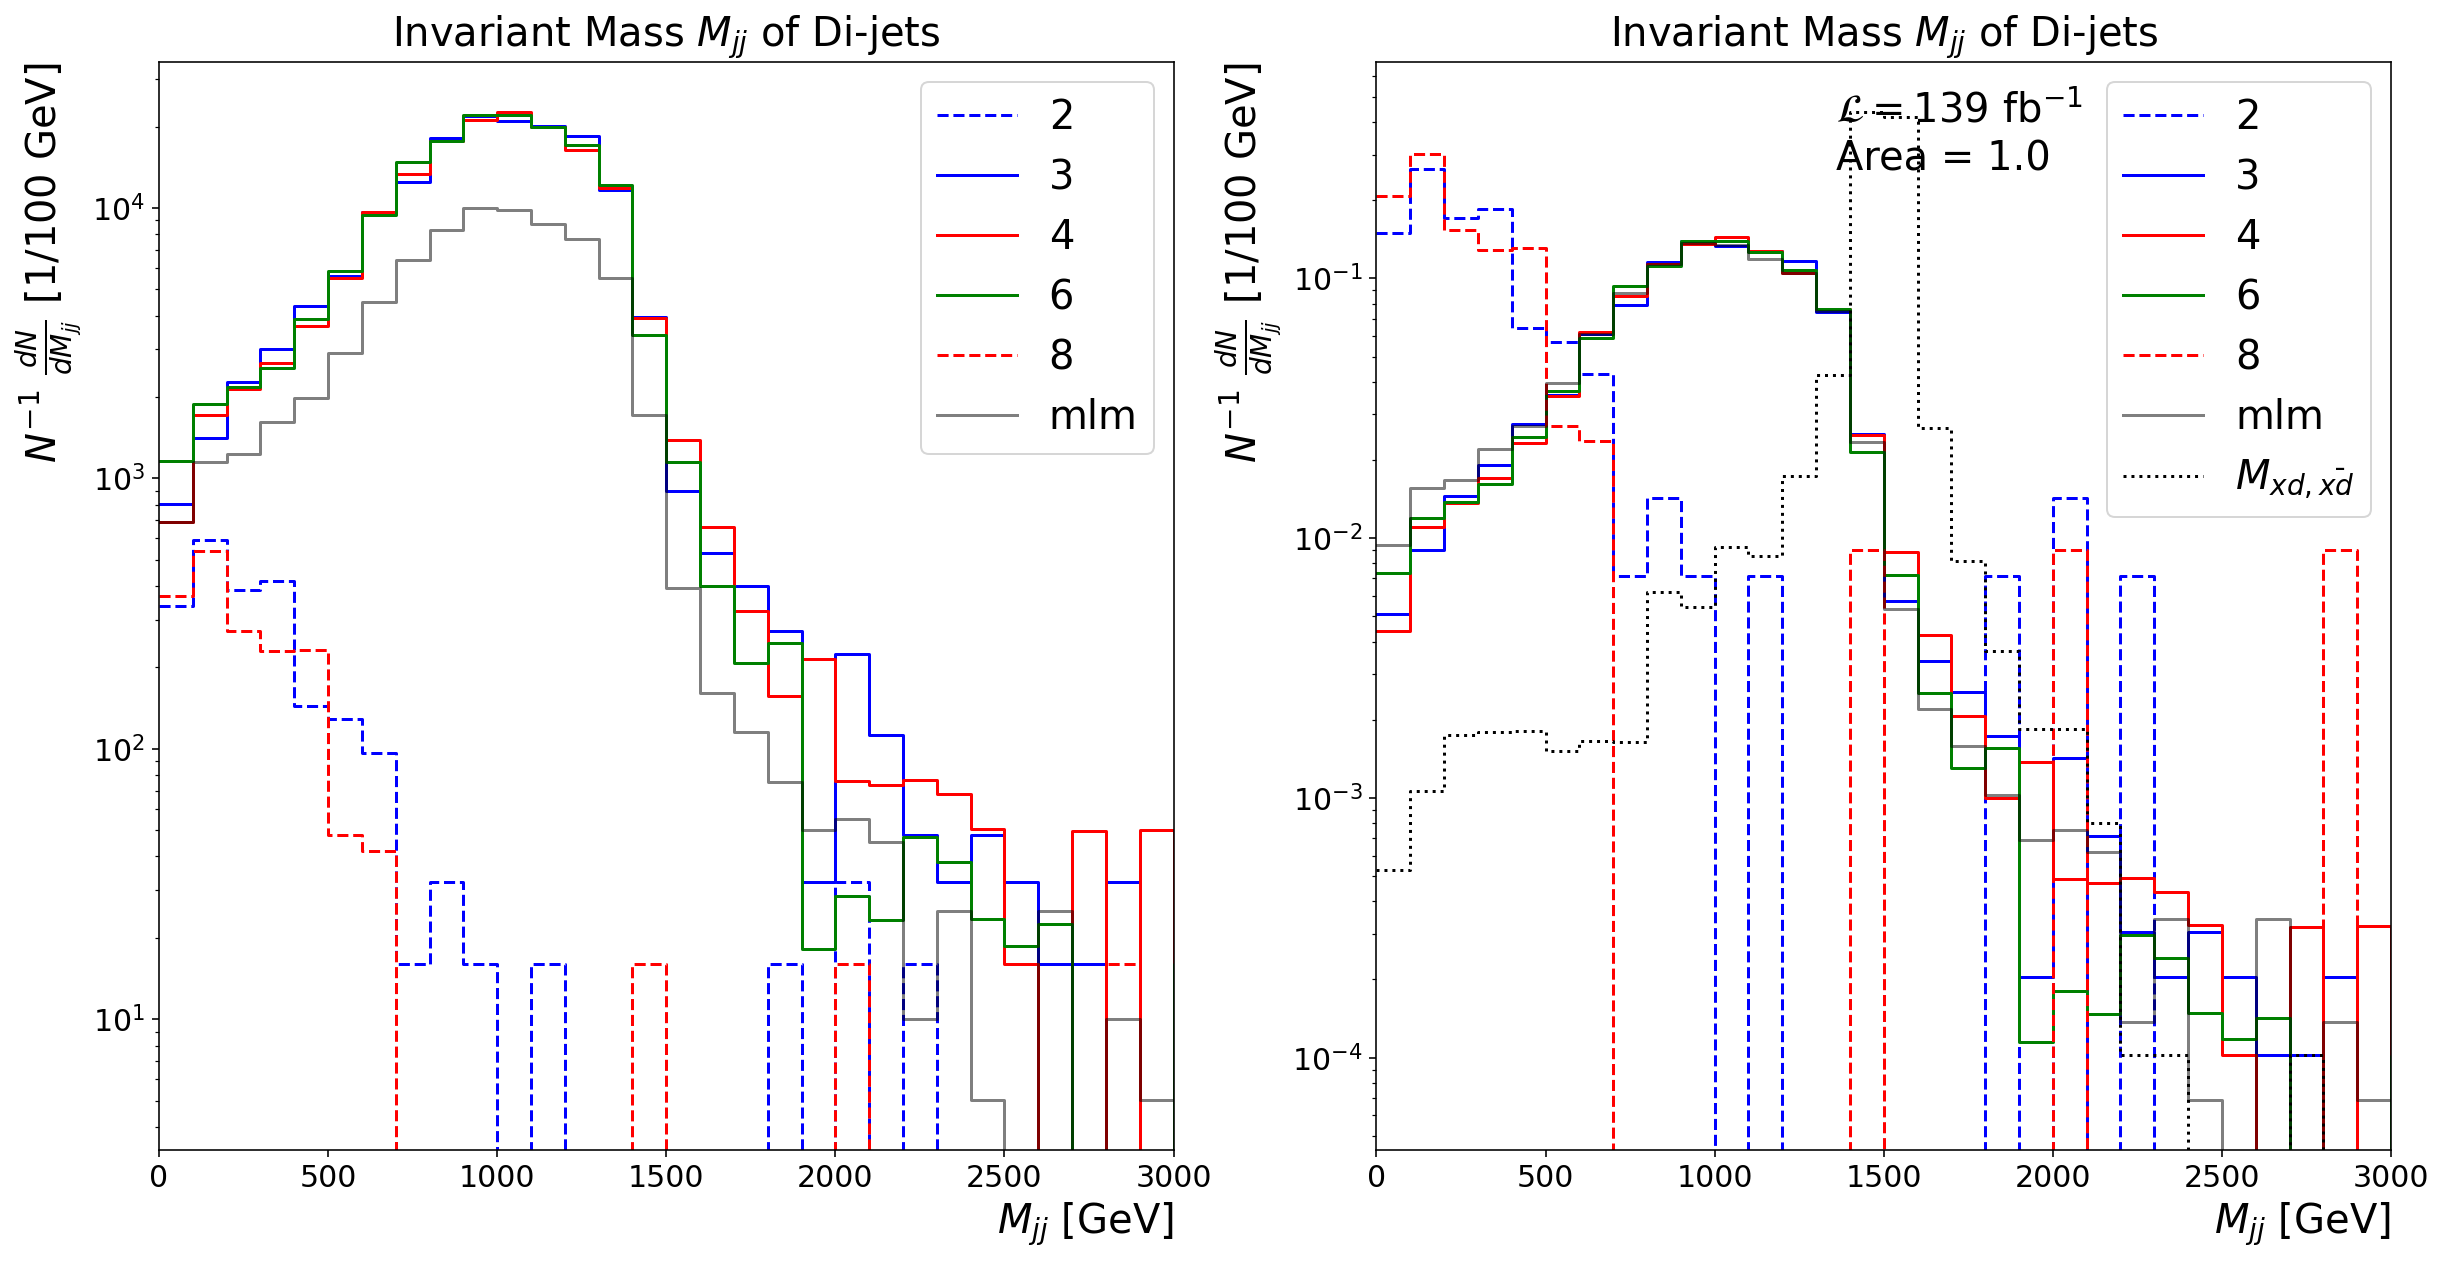

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))
binning = np.linspace(0, 5000, 51)

hist_1, bins_1 = np.histogram(list_truth_results_filterDM_1[0], bins=binning,
                              weights=list_weight[0][list_truth_results_filterDM_1[3]]*LUMINOSITY*1000)
hist_2, bins_2 = np.histogram(list_truth_results_filterDM_2[0], bins=binning,
                              weights=list_weight[1][list_truth_results_filterDM_2[3]]*LUMINOSITY*1000)
hist_3, bins_3 = np.histogram(list_truth_results_filterDM_3[0], bins=binning,
                              weights=list_weight[2][list_truth_results_filterDM_3[3]]*LUMINOSITY*1000)
hist_4, bins_4 = np.histogram(list_truth_results_filterDM_4[0], bins=binning,
                              weights=list_weight[3][list_truth_results_filterDM_4[3]]*LUMINOSITY*1000)
hist_5, bins_5 = np.histogram(list_truth_results_filterDM_5[0], bins=binning,
                              weights=list_weight[4][list_truth_results_filterDM_5[3]]*LUMINOSITY*1000)
hist_6, bins_6 = np.histogram(list_truth_results_filterDM_6[0], bins=binning,
                              weights=list_weight[5][list_truth_results_filterDM_6[3]]*LUMINOSITY*1000)
hist_7, bins_7 = np.histogram(list_truth_results_filterDM_7[0], bins=binning,
                              weights=list_weight[6][list_truth_results_filterDM_7[3]]*LUMINOSITY*1000)
hist_8, bins_8 = np.histogram(list_truth_results_filterDM_8[0], bins=binning,
                              weights=list_weight[7][list_truth_results_filterDM_8[3]]*LUMINOSITY*1000)
hist_9, bins_9 = np.histogram(list_truth_results_filterDM_9[0], bins=binning,
                              weights=list_weight[8][list_truth_results_filterDM_9[3]]*LUMINOSITY*1000)
hist_10, bins_10 = np.histogram(list_truth_results_filterDM_10[0], bins=binning,
                              weights=list_weight[9][list_truth_results_filterDM_10[3]]*LUMINOSITY*1000)
hist_4_1, bins_4_1 = np.histogram(list_truth_results_filterDM_4_1[0], bins=binning,
                              weights=list_weight[10][list_truth_results_filterDM_4_1[3]]*LUMINOSITY*1000)
hist_mlm, bins_mlm = np.histogram(list_truth_results_filterDM_mlm[0], bins=binning,
                              weights=list_weight[11][list_truth_results_filterDM_mlm[3]]*LUMINOSITY*1000)
hist_4_xdxdx, bins_4_xdxdx = np.histogram(m_xdxdbar_4, bins=binning, weights=list_weight[3])


# figure 1
axs[0].step(bins_2[:-1], hist_2, where='post', color='blue', linestyle='--', label="2")
axs[0].step(bins_3[:-1], hist_3, where='post', color='blue', label="3")
axs[0].step(bins_4[:-1], hist_4, where='post', color='red', label="4")
# axs[0].step(bins_5[:-1], hist_5, where='post', color='orange', linestyle='-.', alpha=0.3, label="5")
axs[0].step(bins_6[:-1], hist_6, where='post', color='green', label="6")
# axs[0].step(bins_7[:-1], hist_7, where='post', color='pink', linestyle=':', label="7")
axs[0].step(bins_8[:-1], hist_8, where='post', color='red', linestyle='--', label="8")
axs[0].step(bins_mlm[:-1], hist_mlm, where='post', color='black', alpha=0.5, label="mlm")
# axs[0].step(bins_4_xdxdx[:-1], hist_4_xdxdx, where='post', color='black',
#             linestyle=':', label="$M_{xd,\\bar{xd}}$")
# axes setting
axs[0].legend(fontsize=20)
axs[0].set_xlabel("$M_{jj}$ [GeV]", fontsize=20, horizontalalignment='right', x=1)
axs[0].set_ylabel("$N^{-1}\ \\frac{dN}{dM_{jj}}$ [1/100 GeV]", fontsize=20, horizontalalignment='right', y=1)
axs[0].set_title("Invariant Mass $M_{jj}$ of Di-jets", fontsize=20)
axs[0].set_xlim(0,3000)
axs[0].set_yscale('log')
axs[0].tick_params(axis='both', labelsize=15)


# figure 2
axs[1].step(bins_2[:-1], hist_2/np.sum(hist_2), where='post', color='blue', linestyle='--', label="2")
axs[1].step(bins_3[:-1], hist_3/np.sum(hist_3), where='post', color='blue', label="3")
axs[1].step(bins_4[:-1], hist_4/np.sum(hist_4), where='post', color='red', label="4")
# axs[0].step(bins_5[:-1], hist_5/np.sum(hist_5), where='post', color='orange', linestyle='-.', alpha=0.5, label="5")
axs[1].step(bins_6[:-1], hist_6/np.sum(hist_6), where='post', color='green', label="6")
# axs[0].step(bins_7[:-1], hist_7/np.sum(hist_7), where='post', color='pink', alpha=0.5, label="7")
axs[1].step(bins_8[:-1], hist_8/np.sum(hist_8), where='post', color='red', linestyle='--', label="8")
axs[1].step(bins_mlm[:-1], hist_mlm/np.sum(hist_mlm), where='post', color='black', alpha=0.5, label="mlm")
# text
axs[1].text(1360, 0.4, "$\mathcal{L} = $"+str(LUMINOSITY)+"$\ \mathrm{fb}^{-1}$", fontsize=20)
# axs[1].text(1980, 0.007, "$M_{Z^\prime} = 1500$ GeV", fontsize=20)
axs[1].text(1360, 0.26, "Area = "+str(np.round(np.sum(hist_4.astype(np.float32)/np.sum(hist_4)),2)), fontsize=20)
axs[1].step(bins_4_xdxdx[:-1], hist_4_xdxdx/np.sum(hist_4_xdxdx), where='post', color='black',
            linestyle=':', label="$M_{xd,\\bar{xd}}$")
# axes setting
axs[1].legend(fontsize=20)
axs[1].set_xlabel("$M_{jj}$ [GeV]", fontsize=20, horizontalalignment='right', x=1)
axs[1].set_ylabel("$N^{-1}\ \\frac{dN}{dM_{jj}}$ [1/100 GeV]", fontsize=20, horizontalalignment='right', y=1)
axs[1].set_title("Invariant Mass $M_{jj}$ of Di-jets", fontsize=20)
axs[1].set_xlim(0,3000)
axs[1].set_yscale('log')
axs[1].tick_params(axis='both', labelsize=15)

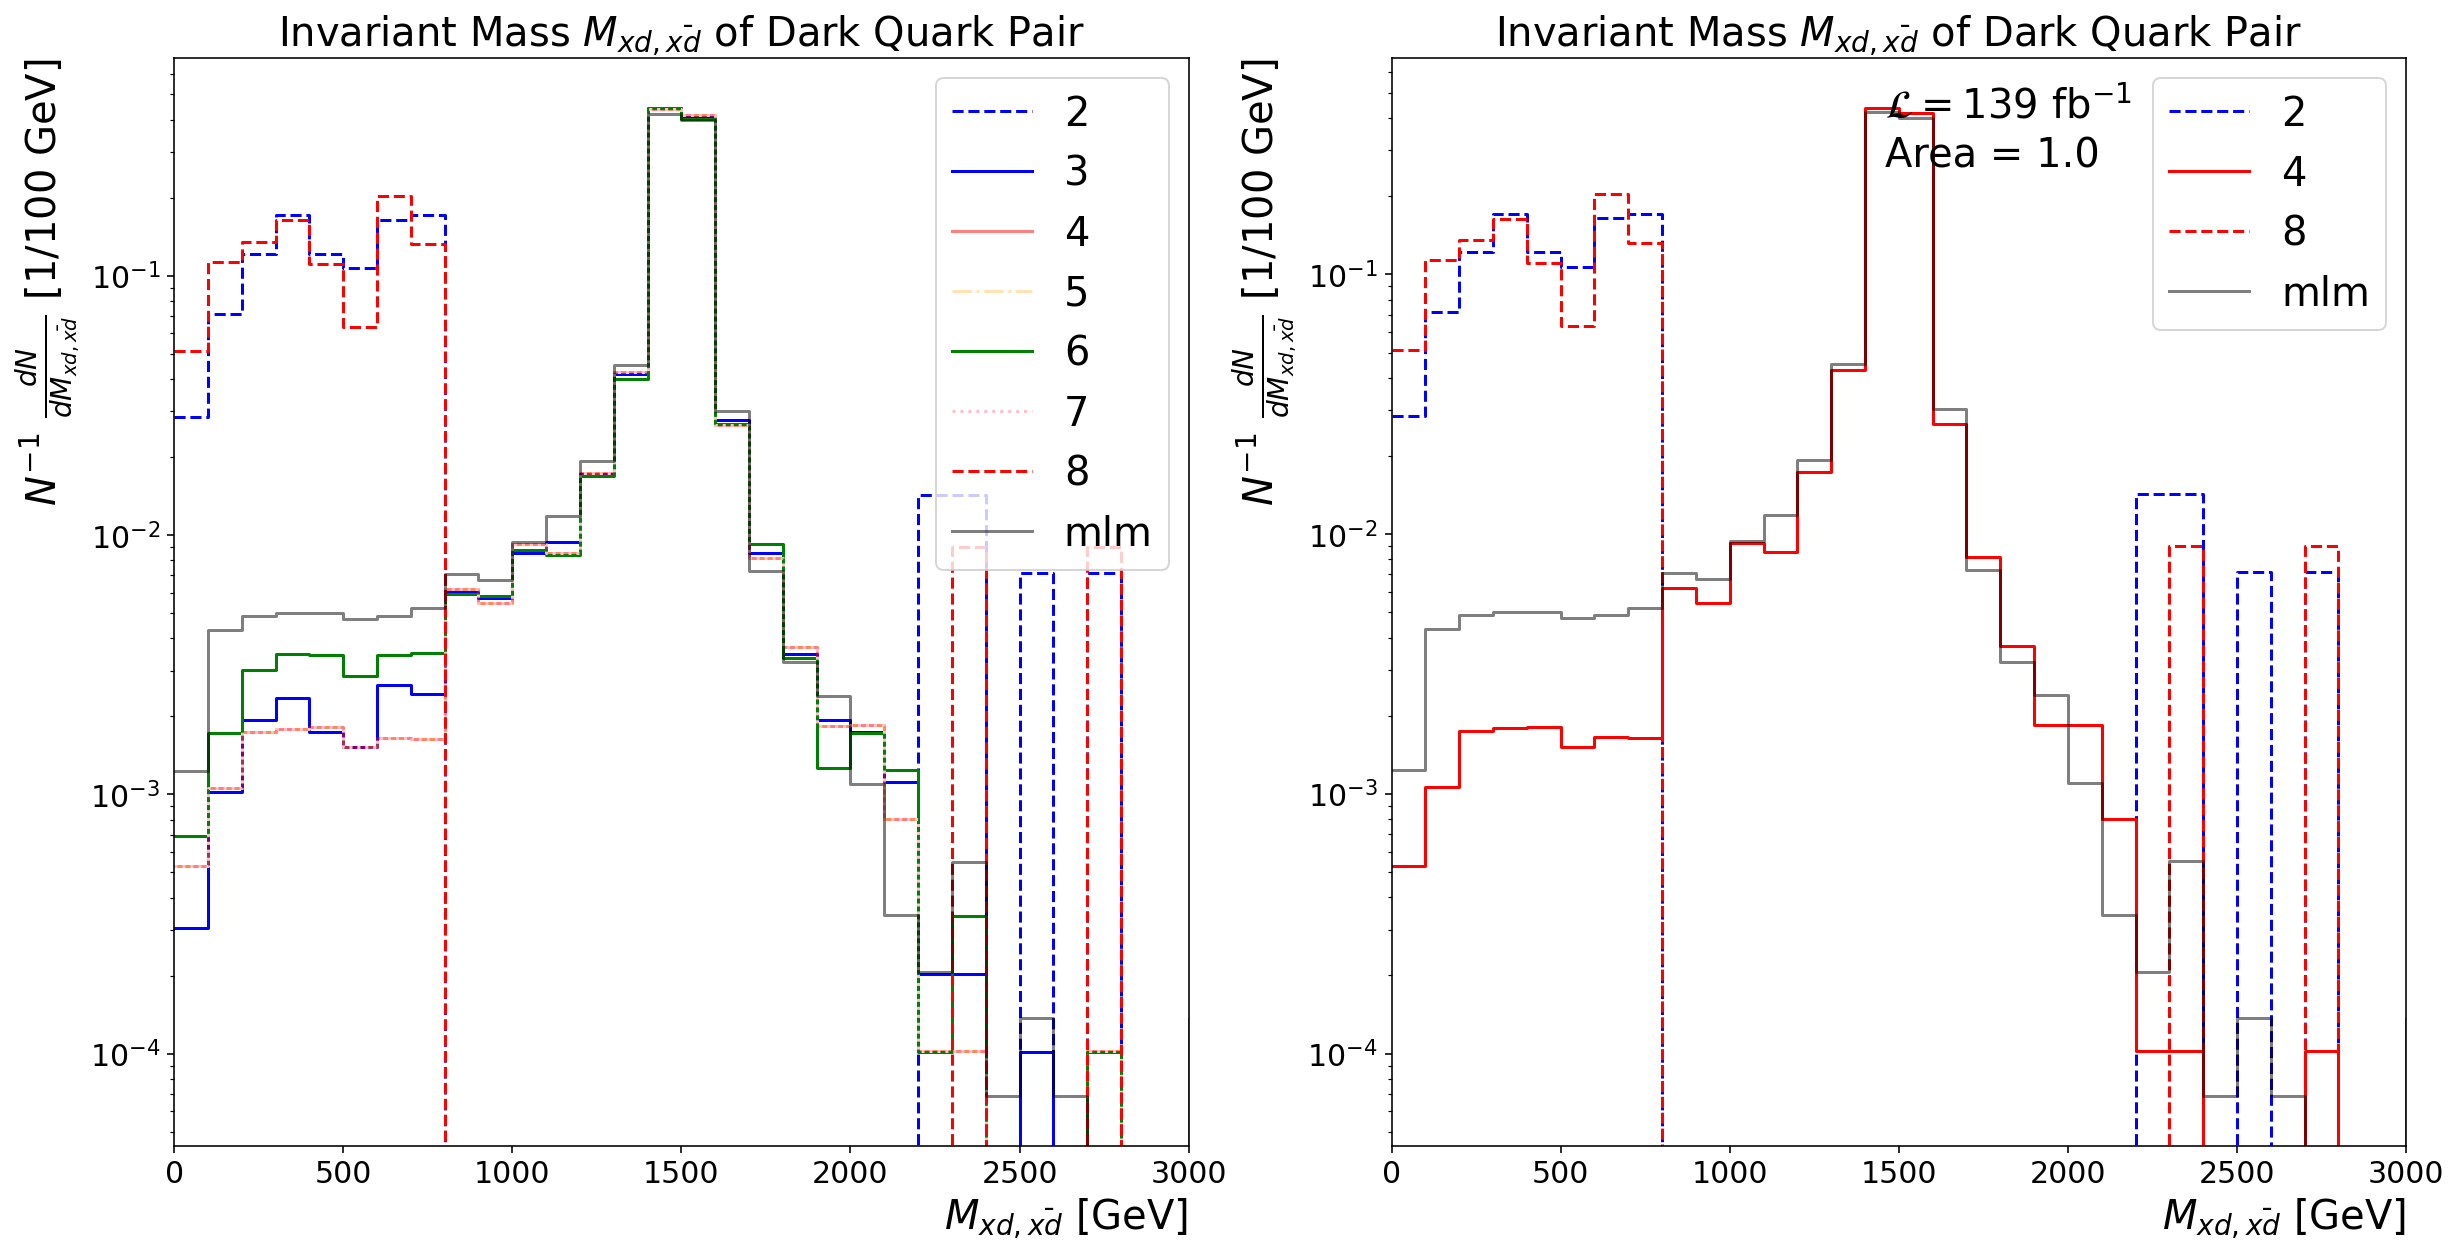

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))
binning = np.linspace(0, 5000, 51)

hist_1, bins_1 = np.histogram(m_xdxdbar_1, bins=binning, weights=list_weight[0])
hist_2, bins_2 = np.histogram(m_xdxdbar_2, bins=binning, weights=list_weight[1])
hist_3, bins_3 = np.histogram(m_xdxdbar_3, bins=binning, weights=list_weight[2])
hist_4, bins_4 = np.histogram(m_xdxdbar_4, bins=binning, weights=list_weight[3])
hist_5, bins_5 = np.histogram(m_xdxdbar_5, bins=binning, weights=list_weight[4])
hist_6, bins_6 = np.histogram(m_xdxdbar_6, bins=binning, weights=list_weight[5])
hist_7, bins_7 = np.histogram(m_xdxdbar_7, bins=binning, weights=list_weight[6])
hist_8, bins_8 = np.histogram(m_xdxdbar_8, bins=binning, weights=list_weight[7])
hist_9, bins_9 = np.histogram(m_xdxdbar_9, bins=binning, weights=list_weight[8])
hist_10, bins_10 = np.histogram(m_xdxdbar_10, bins=binning, weights=list_weight[9])
hist_4_1, bins_4_1 = np.histogram(m_xdxdbar_4_1, bins=binning, weights=list_weight[10])
hist_mlm, bins_mlm = np.histogram(m_xdxdbar_mlm, bins=binning, weights=list_weight[11])


# figure 1
axs[0].step(bins_2[:-1], hist_2/np.sum(hist_2), where='post', color='blue', linestyle='--', label="2")
axs[0].step(bins_3[:-1], hist_3/np.sum(hist_3), where='post', color='blue', label="3")
axs[0].step(bins_4[:-1], hist_4/np.sum(hist_4), where='post', color='red', alpha=0.5, label="4")
axs[0].step(bins_5[:-1], hist_5/np.sum(hist_5), where='post', color='orange', linestyle='-.', alpha=0.3, label="5")
axs[0].step(bins_6[:-1], hist_6/np.sum(hist_6), where='post', color='green', label="6")
axs[0].step(bins_7[:-1], hist_7/np.sum(hist_7), where='post', color='pink', linestyle=':', label="7")
axs[0].step(bins_8[:-1], hist_8/np.sum(hist_8), where='post', color='red', linestyle='--', label="8")
axs[0].step(bins_mlm[:-1], hist_mlm/np.sum(hist_mlm), where='post', color='black', alpha=0.5, label="mlm")
# text
# axs[0].text(1980, 0.01, "$\mathcal{L} = $"+str(LUMINOSITY)+"$\ \mathrm{fb}^{-1}$", fontsize=20)
# axs[0].text(1980, 0.007, "$M_{Z^\prime} = 1500$ GeV", fontsize=20)
# axs[0].text(1980, 0.005, "Area = "+str(np.round(np.sum(hist_4.astype(np.float32)/np.sum(hist_4)),2)), fontsize=20)
# axes setting
axs[0].legend(fontsize=20)
axs[0].set_xlabel("$M_{xd,\\bar{xd}}$ [GeV]", fontsize=20, horizontalalignment='right', x=1)
axs[0].set_ylabel("$N^{-1}\ \\frac{dN}{dM_{xd,\\bar{xd}}}$ [1/100 GeV]", fontsize=20, horizontalalignment='right', y=1)
axs[0].set_title("Invariant Mass $M_{xd,\\bar{xd}}$ of Dark Quark Pair", fontsize=20)
axs[0].set_xlim(0,3000)
axs[0].set_yscale('log')
axs[0].tick_params(axis='both', labelsize=15)


# figure 2
axs[1].step(bins_2[:-1], hist_2/np.sum(hist_2), where='post', color='blue', linestyle='--', label="2")
# axs[1].step(bins_3[:-1], hist_3/np.sum(hist_3), where='post', color='blue', label="3")
axs[1].step(bins_4[:-1], hist_4/np.sum(hist_4), where='post', color='red', label="4")
# axs[0].step(bins_5[:-1], hist_5/np.sum(hist_5), where='post', color='orange', linestyle='-.', alpha=0.5, label="5")
# axs[1].step(bins_6[:-1], hist_6/np.sum(hist_6), where='post', color='green', label="6")
# axs[0].step(bins_7[:-1], hist_7/np.sum(hist_7), where='post', color='pink', alpha=0.5, label="7")
axs[1].step(bins_8[:-1], hist_8/np.sum(hist_8), where='post', color='red', linestyle='--', label="8")
axs[1].step(bins_mlm[:-1], hist_mlm/np.sum(hist_mlm), where='post', color='black', alpha=0.5, label="mlm")
# text
axs[1].text(1460, 0.4, "$\mathcal{L} = $"+str(LUMINOSITY)+"$\ \mathrm{fb}^{-1}$", fontsize=20)
# axs[1].text(1980, 0.007, "$M_{Z^\prime} = 1500$ GeV", fontsize=20)
axs[1].text(1460, 0.26, "Area = "+str(np.round(np.sum(hist_4.astype(np.float32)/np.sum(hist_4)),2)), fontsize=20)
# axes setting
axs[1].legend(fontsize=20)
axs[1].set_xlabel("$M_{xd,\\bar{xd}}$ [GeV]", fontsize=20, horizontalalignment='right', x=1)
axs[1].set_ylabel("$N^{-1}\ \\frac{dN}{dM_{xd,\\bar{xd}}}$ [1/100 GeV]", fontsize=20, horizontalalignment='right', y=1)
axs[1].set_title("Invariant Mass $M_{xd,\\bar{xd}}$ of Dark Quark Pair", fontsize=20)
axs[1].set_xlim(0,3000)
axs[1].set_yscale('log')
axs[1].tick_params(axis='both', labelsize=15)

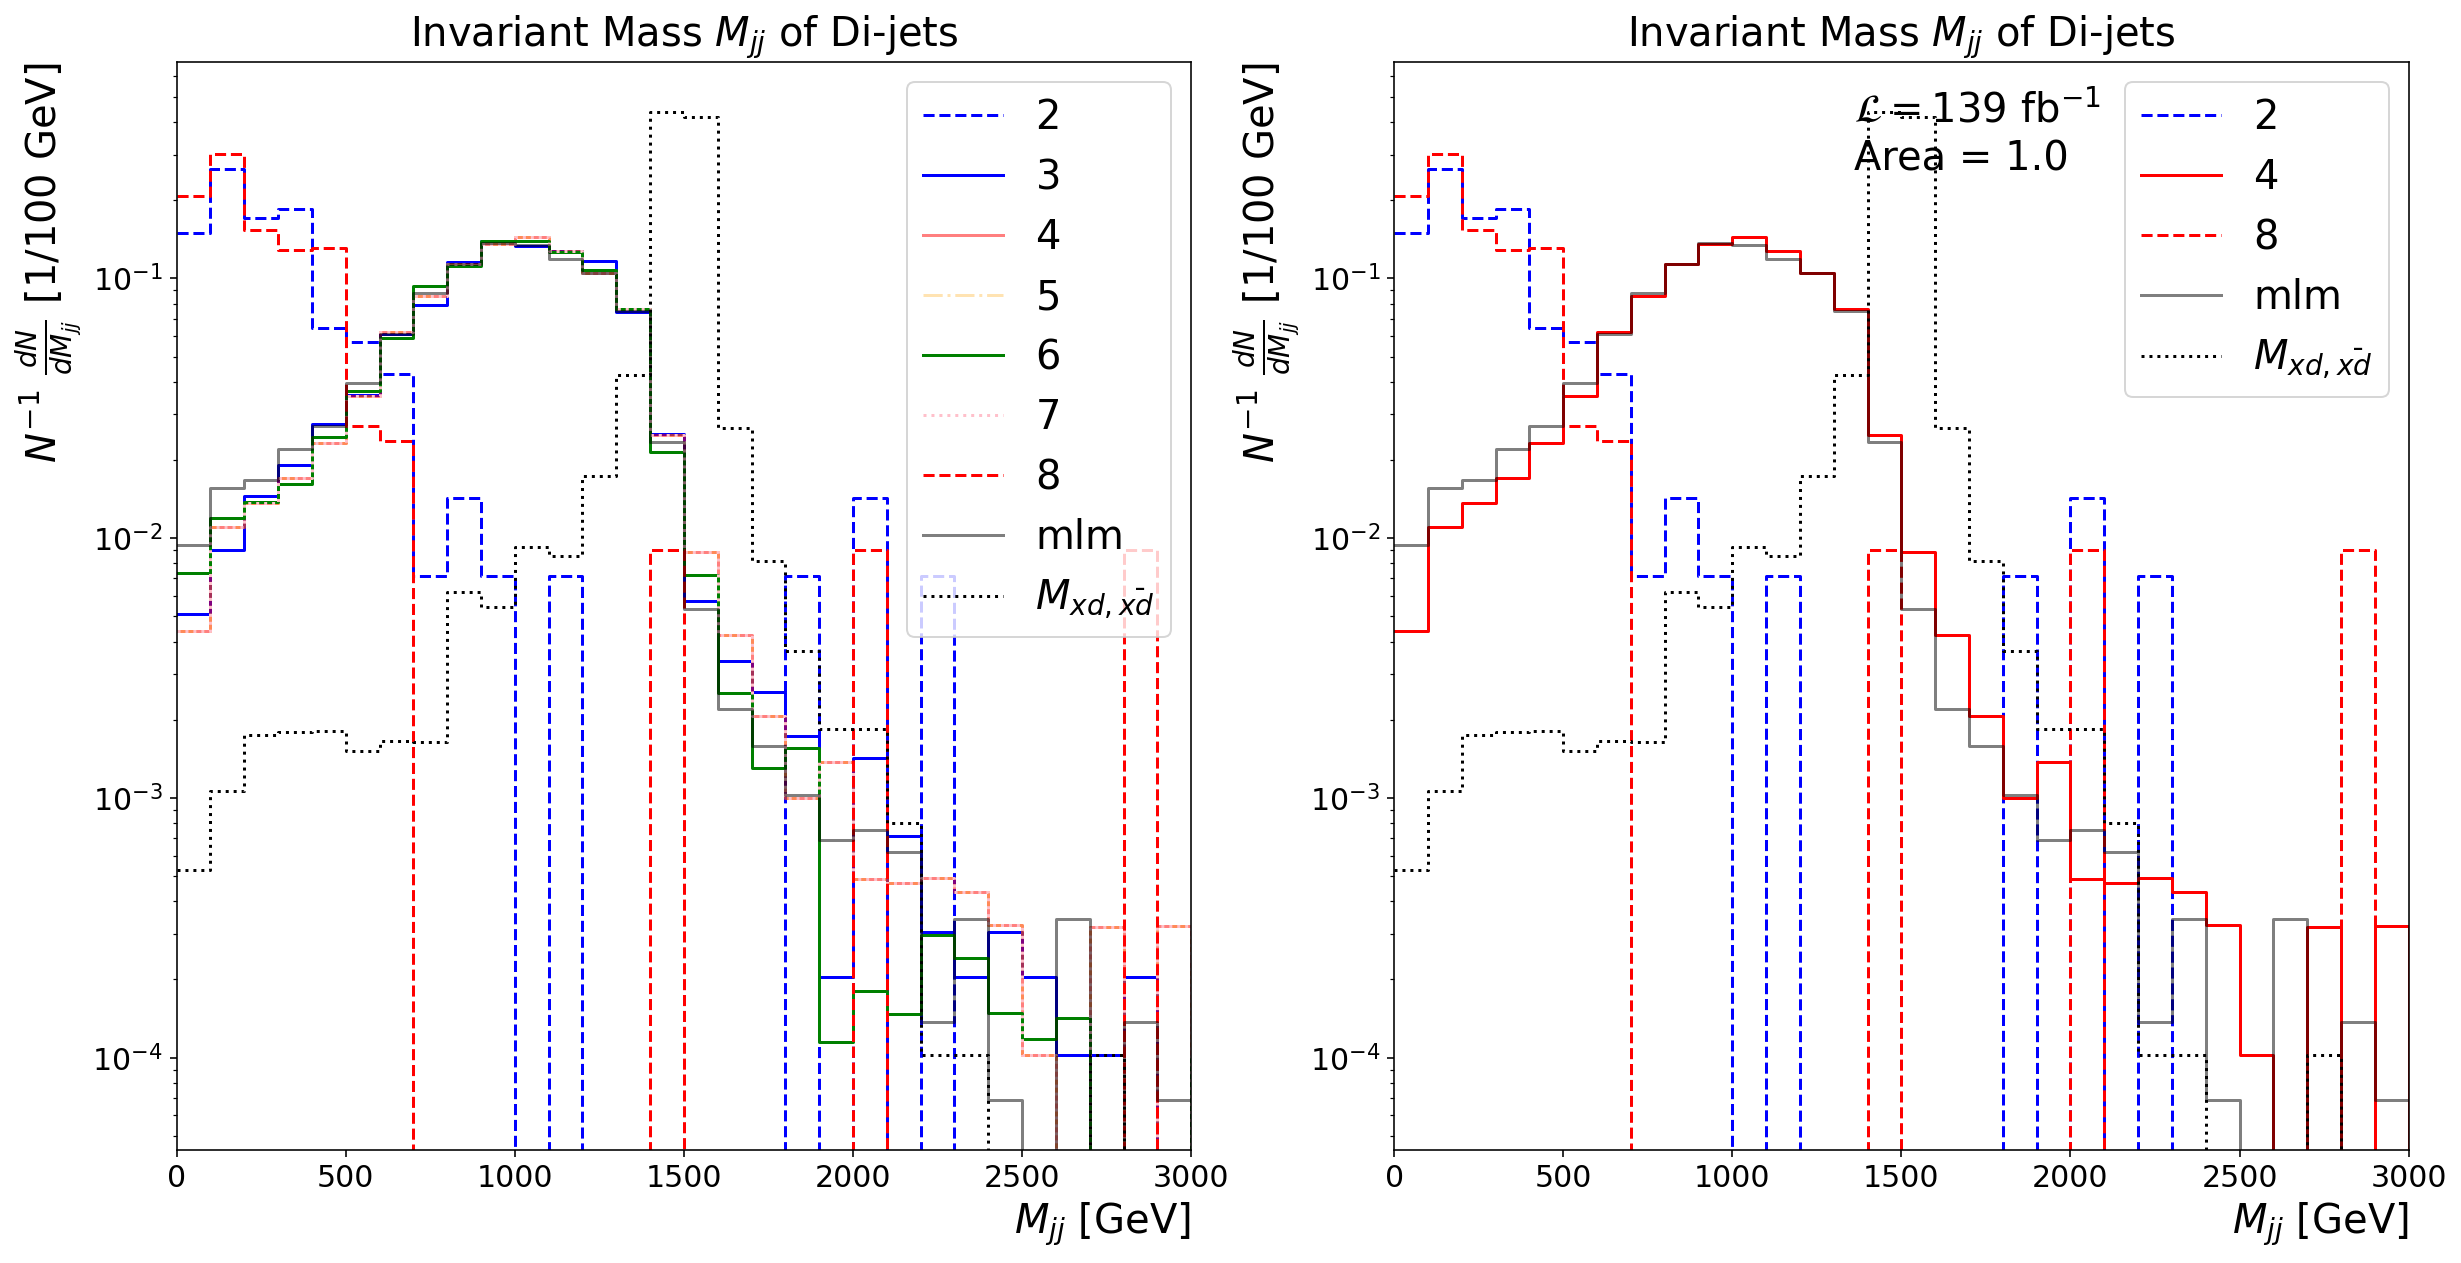

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))
binning = np.linspace(0, 5000, 51)

hist_1, bins_1 = np.histogram(list_truth_results_filterDM_1[0], bins=binning,
                              weights=list_weight[0][list_truth_results_filterDM_1[3]]*LUMINOSITY*1000)
hist_2, bins_2 = np.histogram(list_truth_results_filterDM_2[0], bins=binning,
                              weights=list_weight[1][list_truth_results_filterDM_2[3]]*LUMINOSITY*1000)
hist_3, bins_3 = np.histogram(list_truth_results_filterDM_3[0], bins=binning,
                              weights=list_weight[2][list_truth_results_filterDM_3[3]]*LUMINOSITY*1000)
hist_4, bins_4 = np.histogram(list_truth_results_filterDM_4[0], bins=binning,
                              weights=list_weight[3][list_truth_results_filterDM_4[3]]*LUMINOSITY*1000)
hist_5, bins_5 = np.histogram(list_truth_results_filterDM_5[0], bins=binning,
                              weights=list_weight[4][list_truth_results_filterDM_5[3]]*LUMINOSITY*1000)
hist_6, bins_6 = np.histogram(list_truth_results_filterDM_6[0], bins=binning,
                              weights=list_weight[5][list_truth_results_filterDM_6[3]]*LUMINOSITY*1000)
hist_7, bins_7 = np.histogram(list_truth_results_filterDM_7[0], bins=binning,
                              weights=list_weight[6][list_truth_results_filterDM_7[3]]*LUMINOSITY*1000)
hist_8, bins_8 = np.histogram(list_truth_results_filterDM_8[0], bins=binning,
                              weights=list_weight[7][list_truth_results_filterDM_8[3]]*LUMINOSITY*1000)
hist_9, bins_9 = np.histogram(list_truth_results_filterDM_9[0], bins=binning,
                              weights=list_weight[8][list_truth_results_filterDM_9[3]]*LUMINOSITY*1000)
hist_10, bins_10 = np.histogram(list_truth_results_filterDM_10[0], bins=binning,
                              weights=list_weight[9][list_truth_results_filterDM_10[3]]*LUMINOSITY*1000)
hist_4_1, bins_4_1 = np.histogram(list_truth_results_filterDM_4_1[0], bins=binning,
                              weights=list_weight[10][list_truth_results_filterDM_4_1[3]]*LUMINOSITY*1000)
hist_mlm, bins_mlm = np.histogram(list_truth_results_filterDM_mlm[0], bins=binning,
                              weights=list_weight[11][list_truth_results_filterDM_mlm[3]]*LUMINOSITY*1000)
hist_4_xdxdx, bins_4_xdxdx = np.histogram(m_xdxdbar_4, bins=binning, weights=list_weight[3])


# figure 1
axs[0].step(bins_2[:-1], hist_2/np.sum(hist_2), where='post', color='blue', linestyle='--', label="2")
axs[0].step(bins_3[:-1], hist_3/np.sum(hist_3), where='post', color='blue', label="3")
axs[0].step(bins_4[:-1], hist_4/np.sum(hist_4), where='post', color='red', alpha=0.5, label="4")
axs[0].step(bins_5[:-1], hist_5/np.sum(hist_5), where='post', color='orange', linestyle='-.', alpha=0.3, label="5")
axs[0].step(bins_6[:-1], hist_6/np.sum(hist_6), where='post', color='green', label="6")
axs[0].step(bins_7[:-1], hist_7/np.sum(hist_7), where='post', color='pink', linestyle=':', label="7")
axs[0].step(bins_8[:-1], hist_8/np.sum(hist_8), where='post', color='red', linestyle='--', label="8")
axs[0].step(bins_mlm[:-1], hist_mlm/np.sum(hist_mlm), where='post', color='black', alpha=0.5, label="mlm")
axs[0].step(bins_4_xdxdx[:-1], hist_4_xdxdx/np.sum(hist_4_xdxdx), where='post', color='black',
            linestyle=':', label="$M_{xd,\\bar{xd}}$")
# axes setting
axs[0].legend(fontsize=20)
axs[0].set_xlabel("$M_{jj}$ [GeV]", fontsize=20, horizontalalignment='right', x=1)
axs[0].set_ylabel("$N^{-1}\ \\frac{dN}{dM_{jj}}$ [1/100 GeV]", fontsize=20, horizontalalignment='right', y=1)
axs[0].set_title("Invariant Mass $M_{jj}$ of Di-jets", fontsize=20)
axs[0].set_xlim(0,3000)
axs[0].set_yscale('log')
axs[0].tick_params(axis='both', labelsize=15)


# figure 2
axs[1].step(bins_2[:-1], hist_2/np.sum(hist_2), where='post', color='blue', linestyle='--', label="2")
# axs[1].step(bins_3[:-1], hist_3/np.sum(hist_3), where='post', color='blue', label="3")
axs[1].step(bins_4[:-1], hist_4/np.sum(hist_4), where='post', color='red', label="4")
# axs[0].step(bins_5[:-1], hist_5/np.sum(hist_5), where='post', color='orange', linestyle='-.', alpha=0.5, label="5")
# axs[1].step(bins_6[:-1], hist_6/np.sum(hist_6), where='post', color='green', label="6")
# axs[0].step(bins_7[:-1], hist_7/np.sum(hist_7), where='post', color='pink', alpha=0.5, label="7")
axs[1].step(bins_8[:-1], hist_8/np.sum(hist_8), where='post', color='red', linestyle='--', label="8")
axs[1].step(bins_mlm[:-1], hist_mlm/np.sum(hist_mlm), where='post', color='black', alpha=0.5, label="mlm")
# text
axs[1].text(1360, 0.4, "$\mathcal{L} = $"+str(LUMINOSITY)+"$\ \mathrm{fb}^{-1}$", fontsize=20)
# axs[1].text(1980, 0.007, "$M_{Z^\prime} = 1500$ GeV", fontsize=20)
axs[1].text(1360, 0.26, "Area = "+str(np.round(np.sum(hist_4.astype(np.float32)/np.sum(hist_4)),2)), fontsize=20)
axs[1].step(bins_4_xdxdx[:-1], hist_4_xdxdx/np.sum(hist_4_xdxdx), where='post', color='black',
            linestyle=':', label="$M_{xd,\\bar{xd}}$")
# axes setting
axs[1].legend(fontsize=20)
axs[1].set_xlabel("$M_{jj}$ [GeV]", fontsize=20, horizontalalignment='right', x=1)
axs[1].set_ylabel("$N^{-1}\ \\frac{dN}{dM_{jj}}$ [1/100 GeV]", fontsize=20, horizontalalignment='right', y=1)
axs[1].set_title("Invariant Mass $M_{jj}$ of Di-jets", fontsize=20)
axs[1].set_xlim(0,3000)
axs[1].set_yscale('log')
axs[1].tick_params(axis='both', labelsize=15)

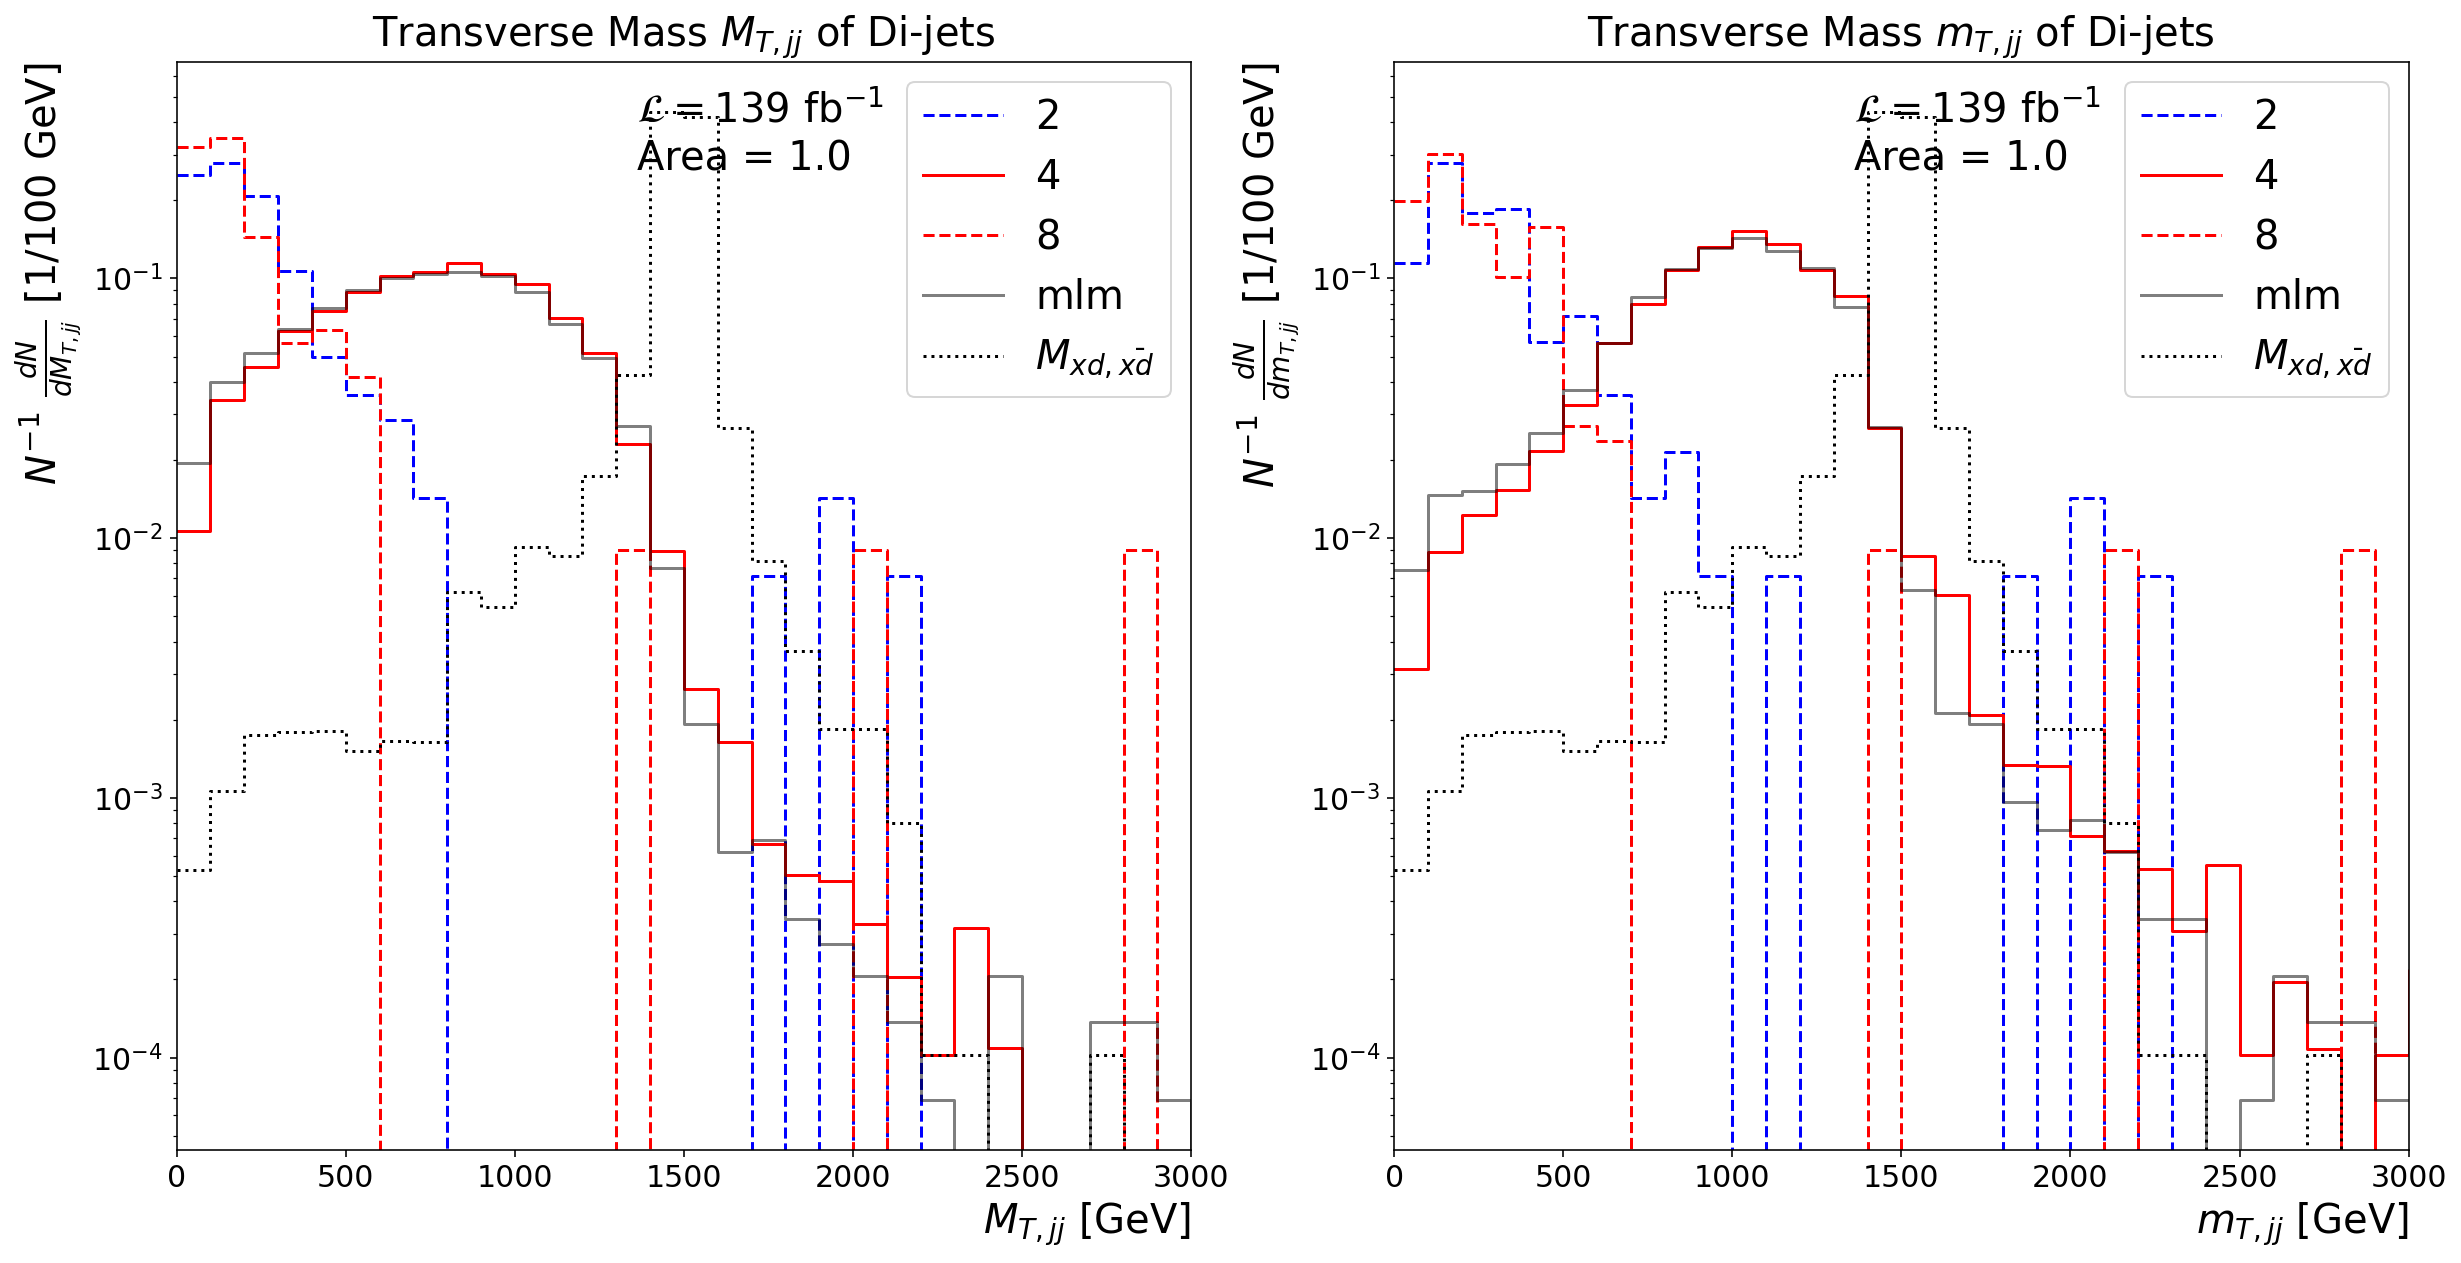

In [37]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))
binning = np.linspace(0, 5000, 51)

# figure 1
hist_1, bins_1 = np.histogram(list_truth_results_filterDM_1[1], bins=binning,
                              weights=list_weight[0][list_truth_results_filterDM_1[3]]*LUMINOSITY*1000)
hist_2, bins_2 = np.histogram(list_truth_results_filterDM_2[1], bins=binning,
                              weights=list_weight[1][list_truth_results_filterDM_2[3]]*LUMINOSITY*1000)
hist_3, bins_3 = np.histogram(list_truth_results_filterDM_3[1], bins=binning,
                              weights=list_weight[2][list_truth_results_filterDM_3[3]]*LUMINOSITY*1000)
hist_4, bins_4 = np.histogram(list_truth_results_filterDM_4[1], bins=binning,
                              weights=list_weight[3][list_truth_results_filterDM_4[3]]*LUMINOSITY*1000)
hist_5, bins_5 = np.histogram(list_truth_results_filterDM_5[1], bins=binning,
                              weights=list_weight[4][list_truth_results_filterDM_5[3]]*LUMINOSITY*1000)
hist_6, bins_6 = np.histogram(list_truth_results_filterDM_6[1], bins=binning,
                              weights=list_weight[5][list_truth_results_filterDM_6[3]]*LUMINOSITY*1000)
hist_7, bins_7 = np.histogram(list_truth_results_filterDM_7[1], bins=binning,
                              weights=list_weight[6][list_truth_results_filterDM_7[3]]*LUMINOSITY*1000)
hist_8, bins_8 = np.histogram(list_truth_results_filterDM_8[1], bins=binning,
                              weights=list_weight[7][list_truth_results_filterDM_8[3]]*LUMINOSITY*1000)
hist_9, bins_9 = np.histogram(list_truth_results_filterDM_9[1], bins=binning,
                              weights=list_weight[8][list_truth_results_filterDM_9[3]]*LUMINOSITY*1000)
hist_10, bins_10 = np.histogram(list_truth_results_filterDM_10[1], bins=binning,
                              weights=list_weight[9][list_truth_results_filterDM_10[3]]*LUMINOSITY*1000)
hist_4_1, bins_4_1 = np.histogram(list_truth_results_filterDM_4_1[1], bins=binning,
                              weights=list_weight[10][list_truth_results_filterDM_4_1[3]]*LUMINOSITY*1000)
hist_mlm, bins_mlm = np.histogram(list_truth_results_filterDM_mlm[1], bins=binning,
                              weights=list_weight[11][list_truth_results_filterDM_mlm[3]]*LUMINOSITY*1000)
hist_4_xdxdx, bins_4_xdxdx = np.histogram(m_xdxdbar_4, bins=binning, weights=list_weight[3])

axs[0].step(bins_2[:-1], hist_2/np.sum(hist_2), where='post', color='blue', linestyle='--', label="2")
# axs[0].step(bins_3[:-1], hist_3/np.sum(hist_3), where='post', color='blue', label="3")
axs[0].step(bins_4[:-1], hist_4/np.sum(hist_4), where='post', color='red', label="4")
# axs[0].step(bins_5[:-1], hist_5/np.sum(hist_5), where='post', color='orange', linestyle='-.', alpha=0.5, label="5")
# axs[0].step(bins_6[:-1], hist_6/np.sum(hist_6), where='post', color='green', label="6")
# axs[0].step(bins_7[:-1], hist_7/np.sum(hist_7), where='post', color='pink', alpha=0.5, label="7")
axs[0].step(bins_8[:-1], hist_8/np.sum(hist_8), where='post', color='red', linestyle='--', label="8")
axs[0].step(bins_mlm[:-1], hist_mlm/np.sum(hist_mlm), where='post', color='black', alpha=0.5, label="mlm")
# text
axs[0].text(1360, 0.4, "$\mathcal{L} = $"+str(LUMINOSITY)+"$\ \mathrm{fb}^{-1}$", fontsize=20)
# axs[1].text(1980, 0.007, "$M_{Z^\prime} = 1500$ GeV", fontsize=20)
axs[0].text(1360, 0.26, "Area = "+str(np.round(np.sum(hist_4.astype(np.float32)/np.sum(hist_4)),2)), fontsize=20)
axs[0].step(bins_4_xdxdx[:-1], hist_4_xdxdx/np.sum(hist_4_xdxdx), where='post', color='black',
            linestyle=':', label="$M_{xd,\\bar{xd}}$")
# axes setting
axs[0].legend(fontsize=20)
axs[0].set_xlabel("$M_{T,jj}$ [GeV]", fontsize=20, horizontalalignment='right', x=1)
axs[0].set_ylabel("$N^{-1}\ \\frac{dN}{dM_{T,jj}}$ [1/100 GeV]", fontsize=20, horizontalalignment='right', y=1)
axs[0].set_title("Transverse Mass $M_{T,jj}$ of Di-jets", fontsize=20)
axs[0].set_xlim(0,3000)
axs[0].set_yscale('log')
axs[0].tick_params(axis='both', labelsize=15)


# figure 2
hist_1, bins_1 = np.histogram(list_truth_results_filterDM_1[2], bins=binning,
                              weights=list_weight[0][list_truth_results_filterDM_1[3]]*LUMINOSITY*1000)
hist_2, bins_2 = np.histogram(list_truth_results_filterDM_2[2], bins=binning,
                              weights=list_weight[1][list_truth_results_filterDM_2[3]]*LUMINOSITY*1000)
hist_3, bins_3 = np.histogram(list_truth_results_filterDM_3[2], bins=binning,
                              weights=list_weight[2][list_truth_results_filterDM_3[3]]*LUMINOSITY*1000)
hist_4, bins_4 = np.histogram(list_truth_results_filterDM_4[2], bins=binning,
                              weights=list_weight[3][list_truth_results_filterDM_4[3]]*LUMINOSITY*1000)
hist_5, bins_5 = np.histogram(list_truth_results_filterDM_5[2], bins=binning,
                              weights=list_weight[4][list_truth_results_filterDM_5[3]]*LUMINOSITY*1000)
hist_6, bins_6 = np.histogram(list_truth_results_filterDM_6[2], bins=binning,
                              weights=list_weight[5][list_truth_results_filterDM_6[3]]*LUMINOSITY*1000)
hist_7, bins_7 = np.histogram(list_truth_results_filterDM_7[2], bins=binning,
                              weights=list_weight[6][list_truth_results_filterDM_7[3]]*LUMINOSITY*1000)
hist_8, bins_8 = np.histogram(list_truth_results_filterDM_8[2], bins=binning,
                              weights=list_weight[7][list_truth_results_filterDM_8[3]]*LUMINOSITY*1000)
hist_9, bins_9 = np.histogram(list_truth_results_filterDM_9[2], bins=binning,
                              weights=list_weight[8][list_truth_results_filterDM_9[3]]*LUMINOSITY*1000)
hist_10, bins_10 = np.histogram(list_truth_results_filterDM_10[2], bins=binning,
                              weights=list_weight[9][list_truth_results_filterDM_10[3]]*LUMINOSITY*1000)
hist_4_1, bins_4_1 = np.histogram(list_truth_results_filterDM_4_1[2], bins=binning,
                              weights=list_weight[10][list_truth_results_filterDM_4_1[3]]*LUMINOSITY*1000)
hist_mlm, bins_mlm = np.histogram(list_truth_results_filterDM_mlm[2], bins=binning,
                              weights=list_weight[11][list_truth_results_filterDM_mlm[3]]*LUMINOSITY*1000)
hist_4_xdxdx, bins_4_xdxdx = np.histogram(m_xdxdbar_4, bins=binning, weights=list_weight[3])

axs[1].step(bins_2[:-1], hist_2/np.sum(hist_2), where='post', color='blue', linestyle='--', label="2")
# axs[1].step(bins_3[:-1], hist_3/np.sum(hist_3), where='post', color='blue', label="3")
axs[1].step(bins_4[:-1], hist_4/np.sum(hist_4), where='post', color='red', label="4")
# axs[0].step(bins_5[:-1], hist_5/np.sum(hist_5), where='post', color='orange', linestyle='-.', alpha=0.5, label="5")
# axs[1].step(bins_6[:-1], hist_6/np.sum(hist_6), where='post', color='green', label="6")
# axs[0].step(bins_7[:-1], hist_7/np.sum(hist_7), where='post', color='pink', alpha=0.5, label="7")
axs[1].step(bins_8[:-1], hist_8/np.sum(hist_8), where='post', color='red', linestyle='--', label="8")
axs[1].step(bins_mlm[:-1], hist_mlm/np.sum(hist_mlm), where='post', color='black', alpha=0.5, label="mlm")
# text
axs[1].text(1360, 0.4, "$\mathcal{L} = $"+str(LUMINOSITY)+"$\ \mathrm{fb}^{-1}$", fontsize=20)
# axs[1].text(1980, 0.007, "$M_{Z^\prime} = 1500$ GeV", fontsize=20)
axs[1].text(1360, 0.26, "Area = "+str(np.round(np.sum(hist_4.astype(np.float32)/np.sum(hist_4)),2)), fontsize=20)
axs[1].step(bins_4_xdxdx[:-1], hist_4_xdxdx/np.sum(hist_4_xdxdx), where='post', color='black',
            linestyle=':', label="$M_{xd,\\bar{xd}}$")
# axes setting
axs[1].legend(fontsize=20)
axs[1].set_xlabel("$m_{T,jj}$ [GeV]", fontsize=20, horizontalalignment='right', x=1)
axs[1].set_ylabel("$N^{-1}\ \\frac{dN}{dm_{T,jj}}$ [1/100 GeV]", fontsize=20, horizontalalignment='right', y=1)
axs[1].set_title("Transverse Mass $m_{T,jj}$ of Di-jets", fontsize=20)
axs[1].set_xlim(0,3000)
axs[1].set_yscale('log')
axs[1].tick_params(axis='both', labelsize=15)

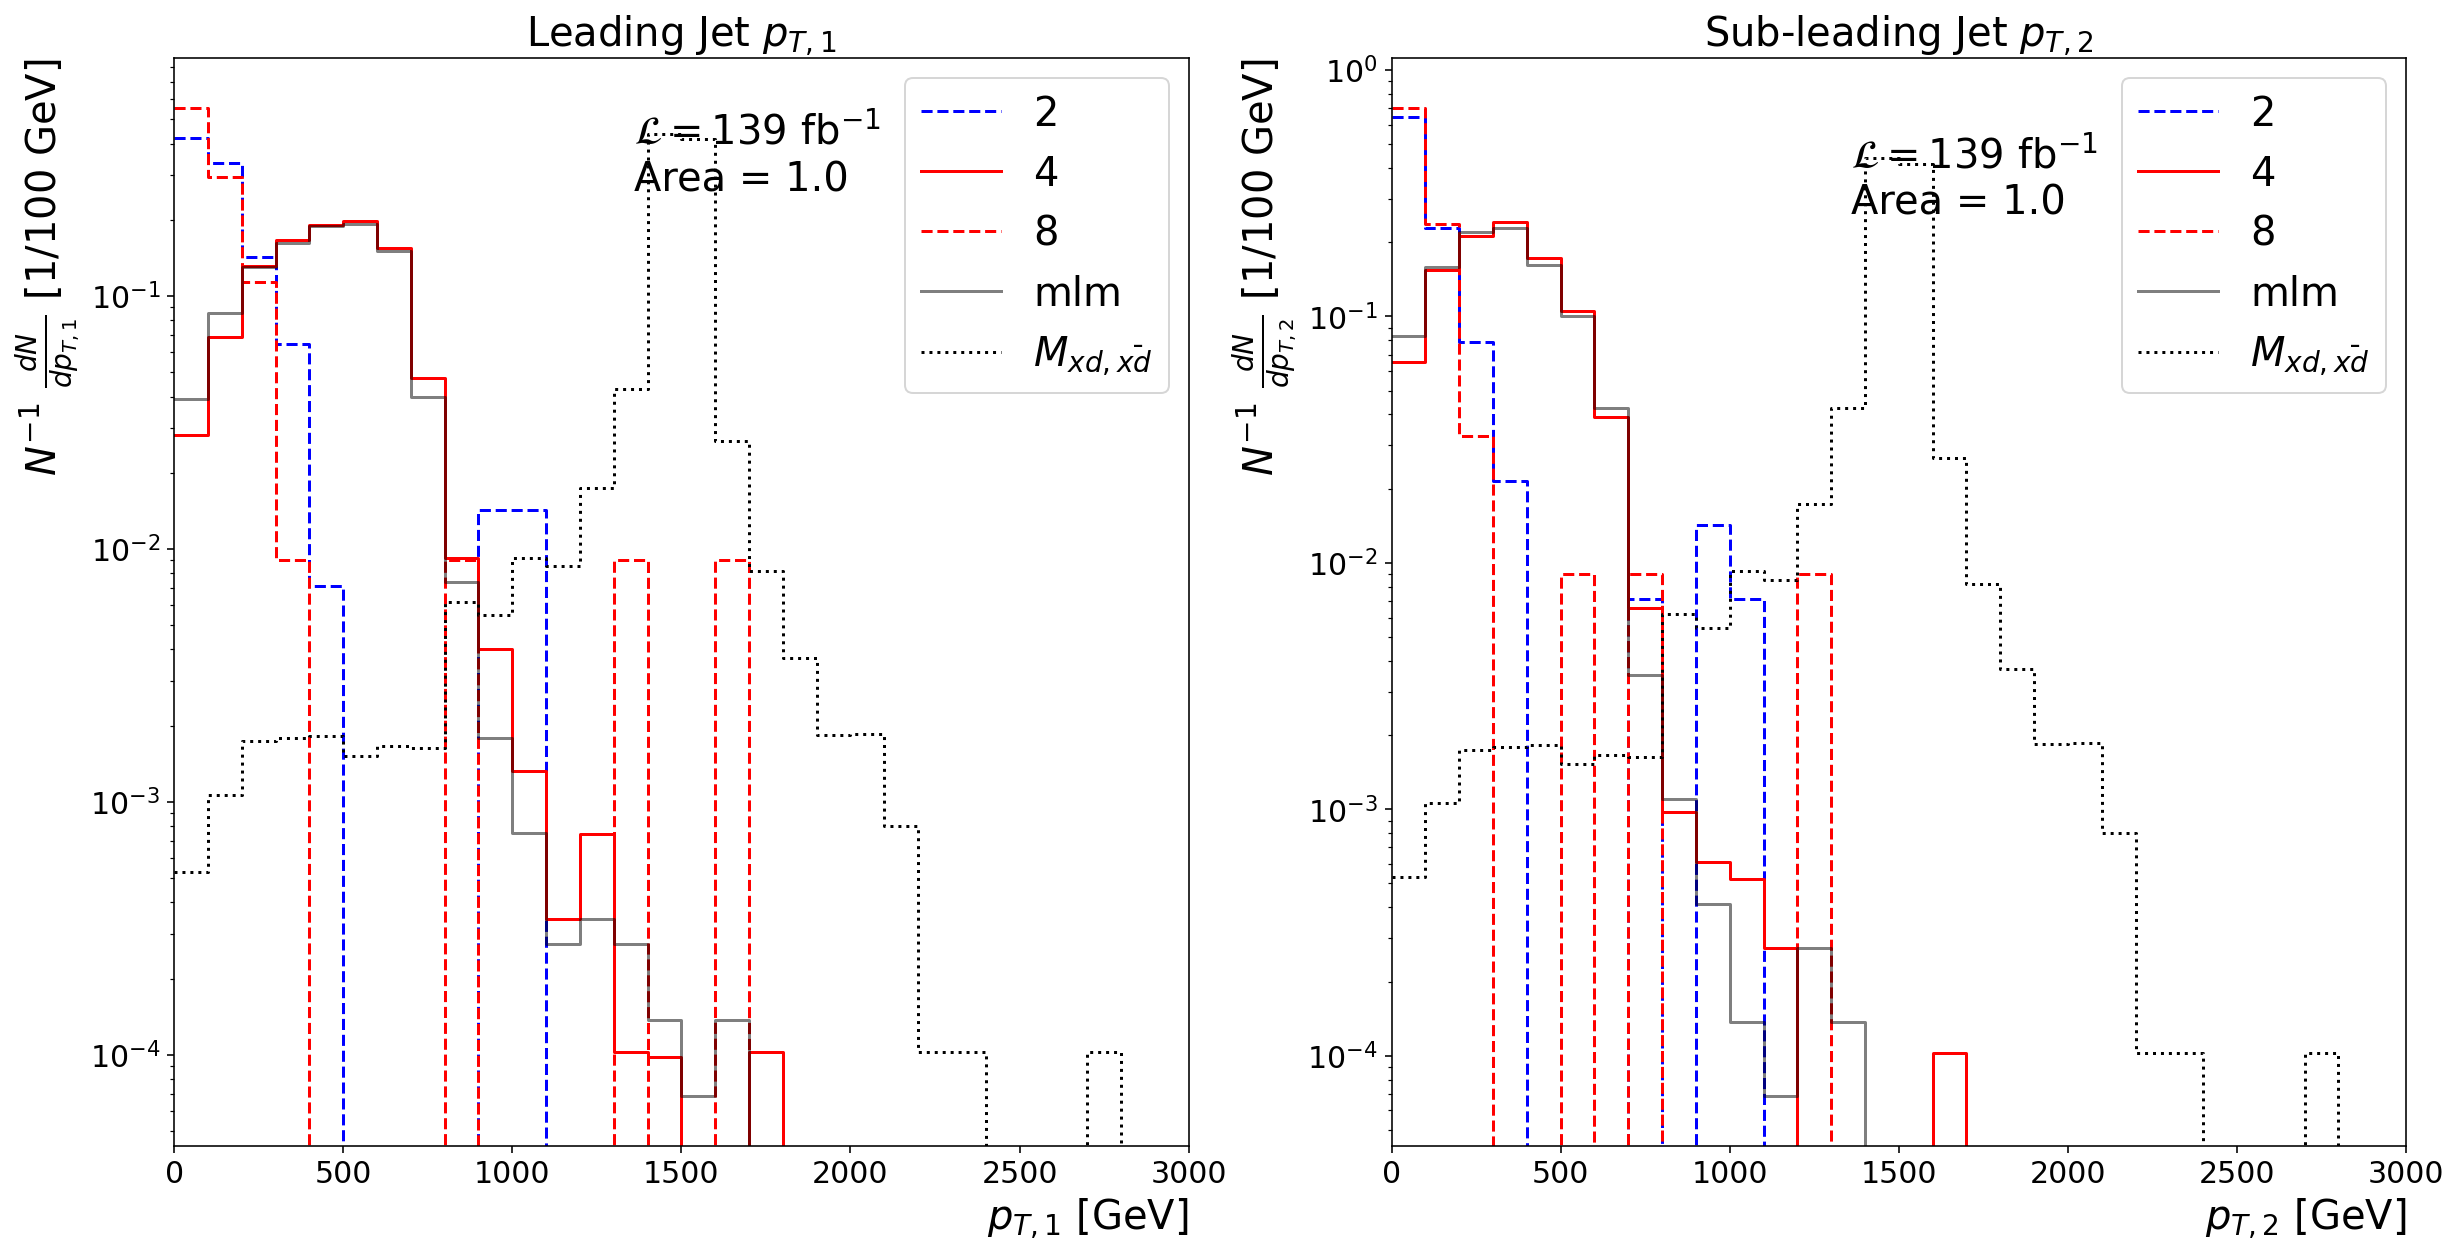

In [38]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))
binning = np.linspace(0, 5000, 51)

# figure 1
hist_1, bins_1 = np.histogram(list_truth_results_filterDM_1[4], bins=binning,
                              weights=list_weight[0][list_truth_results_filterDM_1[3]]*LUMINOSITY*1000)
hist_2, bins_2 = np.histogram(list_truth_results_filterDM_2[4], bins=binning,
                              weights=list_weight[1][list_truth_results_filterDM_2[3]]*LUMINOSITY*1000)
hist_3, bins_3 = np.histogram(list_truth_results_filterDM_3[4], bins=binning,
                              weights=list_weight[2][list_truth_results_filterDM_3[3]]*LUMINOSITY*1000)
hist_4, bins_4 = np.histogram(list_truth_results_filterDM_4[4], bins=binning,
                              weights=list_weight[3][list_truth_results_filterDM_4[3]]*LUMINOSITY*1000)
hist_5, bins_5 = np.histogram(list_truth_results_filterDM_5[4], bins=binning,
                              weights=list_weight[4][list_truth_results_filterDM_5[3]]*LUMINOSITY*1000)
hist_6, bins_6 = np.histogram(list_truth_results_filterDM_6[4], bins=binning,
                              weights=list_weight[5][list_truth_results_filterDM_6[3]]*LUMINOSITY*1000)
hist_7, bins_7 = np.histogram(list_truth_results_filterDM_7[4], bins=binning,
                              weights=list_weight[6][list_truth_results_filterDM_7[3]]*LUMINOSITY*1000)
hist_8, bins_8 = np.histogram(list_truth_results_filterDM_8[4], bins=binning,
                              weights=list_weight[7][list_truth_results_filterDM_8[3]]*LUMINOSITY*1000)
hist_9, bins_9 = np.histogram(list_truth_results_filterDM_9[4], bins=binning,
                              weights=list_weight[8][list_truth_results_filterDM_9[3]]*LUMINOSITY*1000)
hist_10, bins_10 = np.histogram(list_truth_results_filterDM_10[4], bins=binning,
                              weights=list_weight[9][list_truth_results_filterDM_10[3]]*LUMINOSITY*1000)
hist_4_1, bins_4_1 = np.histogram(list_truth_results_filterDM_4_1[4], bins=binning,
                              weights=list_weight[10][list_truth_results_filterDM_4_1[3]]*LUMINOSITY*1000)
hist_mlm, bins_mlm = np.histogram(list_truth_results_filterDM_mlm[4], bins=binning,
                              weights=list_weight[11][list_truth_results_filterDM_mlm[3]]*LUMINOSITY*1000)
hist_4_xdxdx, bins_4_xdxdx = np.histogram(m_xdxdbar_4, bins=binning, weights=list_weight[3])

axs[0].step(bins_2[:-1], hist_2/np.sum(hist_2), where='post', color='blue', linestyle='--', label="2")
# axs[0].step(bins_3[:-1], hist_3/np.sum(hist_3), where='post', color='blue', label="3")
axs[0].step(bins_4[:-1], hist_4/np.sum(hist_4), where='post', color='red', label="4")
# axs[0].step(bins_5[:-1], hist_5/np.sum(hist_5), where='post', color='orange', linestyle='-.', alpha=0.5, label="5")
# axs[0].step(bins_6[:-1], hist_6/np.sum(hist_6), where='post', color='green', label="6")
# axs[0].step(bins_7[:-1], hist_7/np.sum(hist_7), where='post', color='pink', alpha=0.5, label="7")
axs[0].step(bins_8[:-1], hist_8/np.sum(hist_8), where='post', color='red', linestyle='--', label="8")
axs[0].step(bins_mlm[:-1], hist_mlm/np.sum(hist_mlm), where='post', color='black', alpha=0.5, label="mlm")
# text
axs[0].text(1360, 0.4, "$\mathcal{L} = $"+str(LUMINOSITY)+"$\ \mathrm{fb}^{-1}$", fontsize=20)
# axs[1].text(1980, 0.007, "$M_{Z^\prime} = 1500$ GeV", fontsize=20)
axs[0].text(1360, 0.26, "Area = "+str(np.round(np.sum(hist_4.astype(np.float32)/np.sum(hist_4)),2)), fontsize=20)
axs[0].step(bins_4_xdxdx[:-1], hist_4_xdxdx/np.sum(hist_4_xdxdx), where='post', color='black',
            linestyle=':', label="$M_{xd,\\bar{xd}}$")
# axes setting
axs[0].legend(fontsize=20)
axs[0].set_xlabel("$p_{T,1}$ [GeV]", fontsize=20, horizontalalignment='right', x=1)
axs[0].set_ylabel("$N^{-1}\ \\frac{dN}{dp_{T,1}}$ [1/100 GeV]", fontsize=20, horizontalalignment='right', y=1)
axs[0].set_title("Leading Jet $p_{T,1}$", fontsize=20)
axs[0].set_xlim(0,3000)
axs[0].set_yscale('log')
axs[0].tick_params(axis='both', labelsize=15)


# figure 2
hist_1, bins_1 = np.histogram(list_truth_results_filterDM_1[5], bins=binning,
                              weights=list_weight[0][list_truth_results_filterDM_1[3]]*LUMINOSITY*1000)
hist_2, bins_2 = np.histogram(list_truth_results_filterDM_2[5], bins=binning,
                              weights=list_weight[1][list_truth_results_filterDM_2[3]]*LUMINOSITY*1000)
hist_3, bins_3 = np.histogram(list_truth_results_filterDM_3[5], bins=binning,
                              weights=list_weight[2][list_truth_results_filterDM_3[3]]*LUMINOSITY*1000)
hist_4, bins_4 = np.histogram(list_truth_results_filterDM_4[5], bins=binning,
                              weights=list_weight[3][list_truth_results_filterDM_4[3]]*LUMINOSITY*1000)
hist_5, bins_5 = np.histogram(list_truth_results_filterDM_5[5], bins=binning,
                              weights=list_weight[4][list_truth_results_filterDM_5[3]]*LUMINOSITY*1000)
hist_6, bins_6 = np.histogram(list_truth_results_filterDM_6[5], bins=binning,
                              weights=list_weight[5][list_truth_results_filterDM_6[3]]*LUMINOSITY*1000)
hist_7, bins_7 = np.histogram(list_truth_results_filterDM_7[5], bins=binning,
                              weights=list_weight[6][list_truth_results_filterDM_7[3]]*LUMINOSITY*1000)
hist_8, bins_8 = np.histogram(list_truth_results_filterDM_8[5], bins=binning,
                              weights=list_weight[7][list_truth_results_filterDM_8[3]]*LUMINOSITY*1000)
hist_9, bins_9 = np.histogram(list_truth_results_filterDM_9[5], bins=binning,
                              weights=list_weight[8][list_truth_results_filterDM_9[3]]*LUMINOSITY*1000)
hist_10, bins_10 = np.histogram(list_truth_results_filterDM_10[5], bins=binning,
                              weights=list_weight[9][list_truth_results_filterDM_10[3]]*LUMINOSITY*1000)
hist_4_1, bins_4_1 = np.histogram(list_truth_results_filterDM_4_1[5], bins=binning,
                              weights=list_weight[10][list_truth_results_filterDM_4_1[3]]*LUMINOSITY*1000)
hist_mlm, bins_mlm = np.histogram(list_truth_results_filterDM_mlm[5], bins=binning,
                              weights=list_weight[11][list_truth_results_filterDM_mlm[3]]*LUMINOSITY*1000)
hist_4_xdxdx, bins_4_xdxdx = np.histogram(m_xdxdbar_4, bins=binning, weights=list_weight[3])

axs[1].step(bins_2[:-1], hist_2/np.sum(hist_2), where='post', color='blue', linestyle='--', label="2")
# axs[1].step(bins_3[:-1], hist_3/np.sum(hist_3), where='post', color='blue', label="3")
axs[1].step(bins_4[:-1], hist_4/np.sum(hist_4), where='post', color='red', label="4")
# axs[0].step(bins_5[:-1], hist_5/np.sum(hist_5), where='post', color='orange', linestyle='-.', alpha=0.5, label="5")
# axs[1].step(bins_6[:-1], hist_6/np.sum(hist_6), where='post', color='green', label="6")
# axs[0].step(bins_7[:-1], hist_7/np.sum(hist_7), where='post', color='pink', alpha=0.5, label="7")
axs[1].step(bins_8[:-1], hist_8/np.sum(hist_8), where='post', color='red', linestyle='--', label="8")
axs[1].step(bins_mlm[:-1], hist_mlm/np.sum(hist_mlm), where='post', color='black', alpha=0.5, label="mlm")
# text
axs[1].text(1360, 0.4, "$\mathcal{L} = $"+str(LUMINOSITY)+"$\ \mathrm{fb}^{-1}$", fontsize=20)
# axs[1].text(1980, 0.007, "$M_{Z^\prime} = 1500$ GeV", fontsize=20)
axs[1].text(1360, 0.26, "Area = "+str(np.round(np.sum(hist_4.astype(np.float32)/np.sum(hist_4)),2)), fontsize=20)
axs[1].step(bins_4_xdxdx[:-1], hist_4_xdxdx/np.sum(hist_4_xdxdx), where='post', color='black',
            linestyle=':', label="$M_{xd,\\bar{xd}}$")
# axes setting
axs[1].legend(fontsize=20)
axs[1].set_xlabel("$p_{T,2}$ [GeV]", fontsize=20, horizontalalignment='right', x=1)
axs[1].set_ylabel("$N^{-1}\ \\frac{dN}{dp_{T,2}}$ [1/100 GeV]", fontsize=20, horizontalalignment='right', y=1)
axs[1].set_title("Sub-leading Jet $p_{T,2}$", fontsize=20)
axs[1].set_xlim(0,3000)
axs[1].set_yscale('log')
axs[1].tick_params(axis='both', labelsize=15)

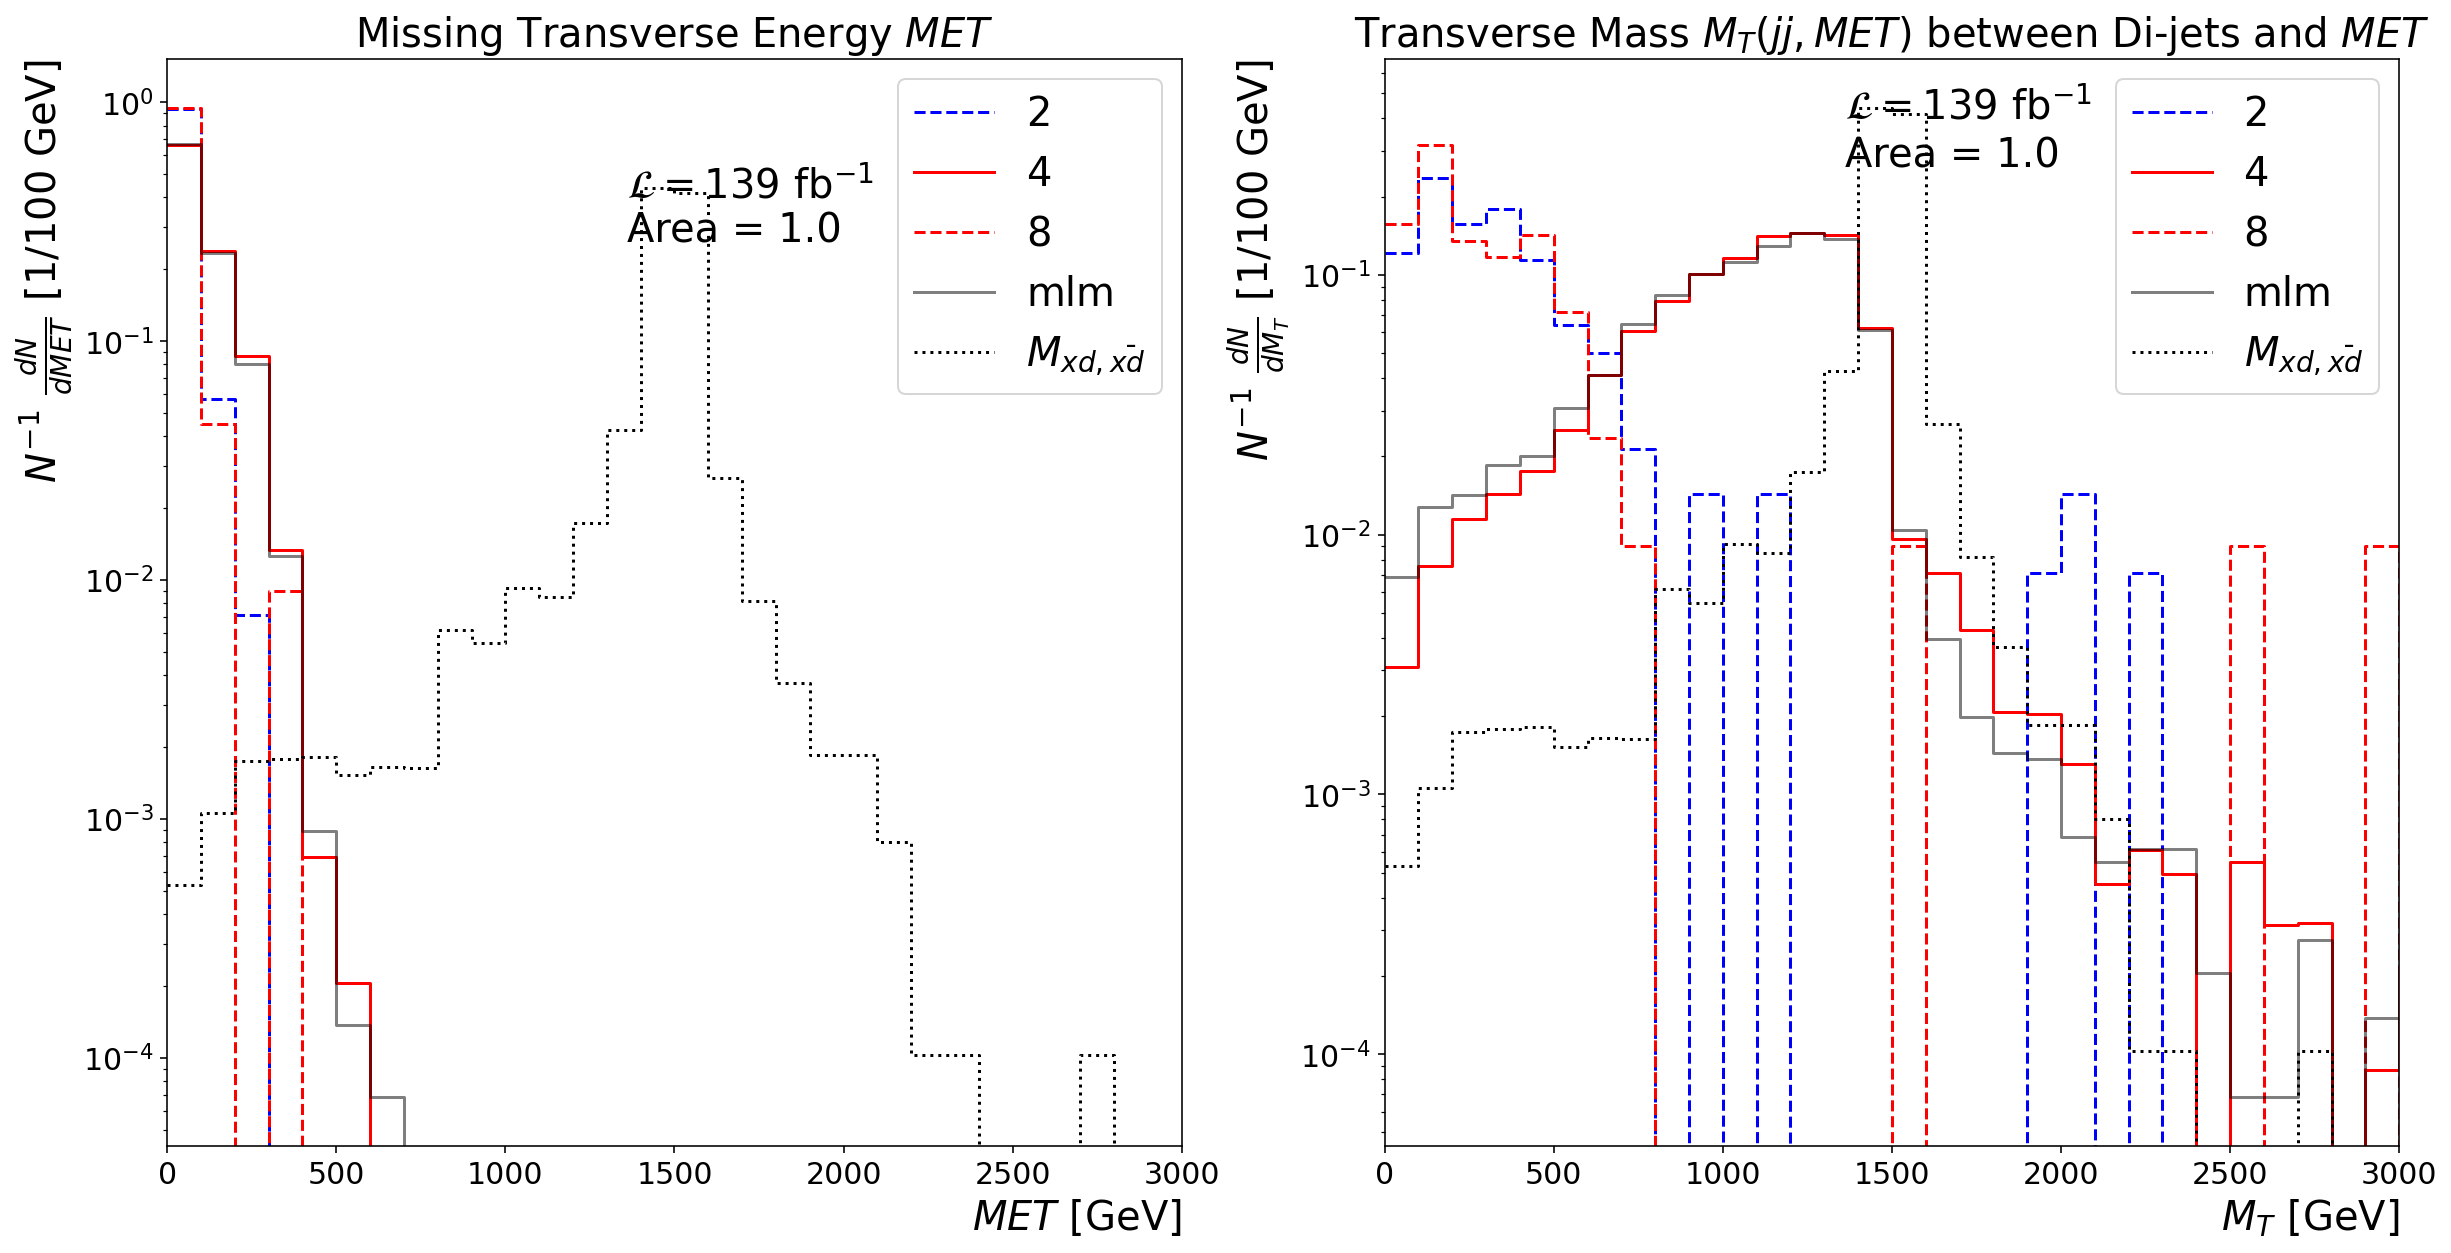

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))
binning = np.linspace(0, 5000, 51)

# figure 1
hist_1, bins_1 = np.histogram(list_MET_truth_results_1[0], bins=binning,
                              weights=list_weight[0])
hist_2, bins_2 = np.histogram(list_MET_truth_results_2[0], bins=binning,
                              weights=list_weight[1])
hist_3, bins_3 = np.histogram(list_MET_truth_results_3[0], bins=binning,
                              weights=list_weight[2])
hist_4, bins_4 = np.histogram(list_MET_truth_results_4[0], bins=binning,
                              weights=list_weight[3])
hist_5, bins_5 = np.histogram(list_MET_truth_results_5[0], bins=binning,
                              weights=list_weight[4])
hist_6, bins_6 = np.histogram(list_MET_truth_results_6[0], bins=binning,
                              weights=list_weight[5])
hist_7, bins_7 = np.histogram(list_MET_truth_results_7[0], bins=binning,
                              weights=list_weight[6])
hist_8, bins_8 = np.histogram(list_MET_truth_results_8[0], bins=binning,
                              weights=list_weight[7])
hist_9, bins_9 = np.histogram(list_MET_truth_results_9[0], bins=binning,
                              weights=list_weight[8])
hist_10, bins_10 = np.histogram(list_MET_truth_results_10[0], bins=binning,
                              weights=list_weight[9])
hist_4_1, bins_4_1 = np.histogram(list_MET_truth_results_4_1[0], bins=binning,
                              weights=list_weight[10])
hist_mlm, bins_mlm = np.histogram(list_MET_truth_results_mlm[0], bins=binning,
                              weights=list_weight[11])
hist_4_xdxdx, bins_4_xdxdx = np.histogram(m_xdxdbar_4, bins=binning, weights=list_weight[3])

axs[0].step(bins_2[:-1], hist_2/np.sum(hist_2), where='post', color='blue', linestyle='--', label="2")
# axs[0].step(bins_3[:-1], hist_3/np.sum(hist_3), where='post', color='blue', label="3")
axs[0].step(bins_4[:-1], hist_4/np.sum(hist_4), where='post', color='red', label="4")
# axs[0].step(bins_5[:-1], hist_5/np.sum(hist_5), where='post', color='orange', linestyle='-.', alpha=0.5, label="5")
# axs[0].step(bins_6[:-1], hist_6/np.sum(hist_6), where='post', color='green', label="6")
# axs[0].step(bins_7[:-1], hist_7/np.sum(hist_7), where='post', color='pink', alpha=0.5, label="7")
axs[0].step(bins_8[:-1], hist_8/np.sum(hist_8), where='post', color='red', linestyle='--', label="8")
axs[0].step(bins_mlm[:-1], hist_mlm/np.sum(hist_mlm), where='post', color='black', alpha=0.5, label="mlm")
# text
axs[0].text(1360, 0.4, "$\mathcal{L} = $"+str(LUMINOSITY)+"$\ \mathrm{fb}^{-1}$", fontsize=20)
# axs[1].text(1980, 0.007, "$M_{Z^\prime} = 1500$ GeV", fontsize=20)
axs[0].text(1360, 0.26, "Area = "+str(np.round(np.sum(hist_4.astype(np.float32)/np.sum(hist_4)),2)), fontsize=20)
axs[0].step(bins_4_xdxdx[:-1], hist_4_xdxdx/np.sum(hist_4_xdxdx), where='post', color='black',
            linestyle=':', label="$M_{xd,\\bar{xd}}$")
# axes setting
axs[0].legend(fontsize=20)
axs[0].set_xlabel("$MET$ [GeV]", fontsize=20, horizontalalignment='right', x=1)
axs[0].set_ylabel("$N^{-1}\ \\frac{dN}{dMET}$ [1/100 GeV]", fontsize=20, horizontalalignment='right', y=1)
axs[0].set_title("Missing Transverse Energy $MET$", fontsize=20)
axs[0].set_xlim(0,3000)
axs[0].set_yscale('log')
axs[0].tick_params(axis='both', labelsize=15)


# figure 2
hist_1, bins_1 = np.histogram(list_MET_truth_results_1[2], bins=binning,
                              weights=list_weight[0][list_truth_results_filterDM_1[3]]*LUMINOSITY*1000)
hist_2, bins_2 = np.histogram(list_MET_truth_results_2[2], bins=binning,
                              weights=list_weight[1][list_truth_results_filterDM_2[3]]*LUMINOSITY*1000)
hist_3, bins_3 = np.histogram(list_MET_truth_results_3[2], bins=binning,
                              weights=list_weight[2][list_truth_results_filterDM_3[3]]*LUMINOSITY*1000)
hist_4, bins_4 = np.histogram(list_MET_truth_results_4[2], bins=binning,
                              weights=list_weight[3][list_truth_results_filterDM_4[3]]*LUMINOSITY*1000)
hist_5, bins_5 = np.histogram(list_MET_truth_results_5[2], bins=binning,
                              weights=list_weight[4][list_truth_results_filterDM_5[3]]*LUMINOSITY*1000)
hist_6, bins_6 = np.histogram(list_MET_truth_results_6[2], bins=binning,
                              weights=list_weight[5][list_truth_results_filterDM_6[3]]*LUMINOSITY*1000)
hist_7, bins_7 = np.histogram(list_MET_truth_results_7[2], bins=binning,
                              weights=list_weight[6][list_truth_results_filterDM_7[3]]*LUMINOSITY*1000)
hist_8, bins_8 = np.histogram(list_MET_truth_results_8[2], bins=binning,
                              weights=list_weight[7][list_truth_results_filterDM_8[3]]*LUMINOSITY*1000)
hist_9, bins_9 = np.histogram(list_MET_truth_results_9[2], bins=binning,
                              weights=list_weight[8][list_truth_results_filterDM_9[3]]*LUMINOSITY*1000)
hist_10, bins_10 = np.histogram(list_MET_truth_results_10[2], bins=binning,
                              weights=list_weight[9][list_truth_results_filterDM_10[3]]*LUMINOSITY*1000)
hist_4_1, bins_4_1 = np.histogram(list_MET_truth_results_4_1[2], bins=binning,
                              weights=list_weight[10][list_truth_results_filterDM_4_1[3]]*LUMINOSITY*1000)
hist_mlm, bins_mlm = np.histogram(list_MET_truth_results_mlm[2], bins=binning,
                              weights=list_weight[11][list_truth_results_filterDM_mlm[3]]*LUMINOSITY*1000)
hist_4_xdxdx, bins_4_xdxdx = np.histogram(m_xdxdbar_4, bins=binning, weights=list_weight[3])

axs[1].step(bins_2[:-1], hist_2/np.sum(hist_2), where='post', color='blue', linestyle='--', label="2")
# axs[1].step(bins_3[:-1], hist_3/np.sum(hist_3), where='post', color='blue', label="3")
axs[1].step(bins_4[:-1], hist_4/np.sum(hist_4), where='post', color='red', label="4")
# axs[0].step(bins_5[:-1], hist_5/np.sum(hist_5), where='post', color='orange', linestyle='-.', alpha=0.5, label="5")
# axs[1].step(bins_6[:-1], hist_6/np.sum(hist_6), where='post', color='green', label="6")
# axs[0].step(bins_7[:-1], hist_7/np.sum(hist_7), where='post', color='pink', alpha=0.5, label="7")
axs[1].step(bins_8[:-1], hist_8/np.sum(hist_8), where='post', color='red', linestyle='--', label="8")
axs[1].step(bins_mlm[:-1], hist_mlm/np.sum(hist_mlm), where='post', color='black', alpha=0.5, label="mlm")
# text
axs[1].text(1360, 0.4, "$\mathcal{L} = $"+str(LUMINOSITY)+"$\ \mathrm{fb}^{-1}$", fontsize=20)
# axs[1].text(1980, 0.007, "$M_{Z^\prime} = 1500$ GeV", fontsize=20)
axs[1].text(1360, 0.26, "Area = "+str(np.round(np.sum(hist_4.astype(np.float32)/np.sum(hist_4)),2)), fontsize=20)
axs[1].step(bins_4_xdxdx[:-1], hist_4_xdxdx/np.sum(hist_4_xdxdx), where='post', color='black',
            linestyle=':', label="$M_{xd,\\bar{xd}}$")
# axes setting
axs[1].legend(fontsize=20)
axs[1].set_xlabel("$M_T$ [GeV]", fontsize=20, horizontalalignment='right', x=1)
axs[1].set_ylabel("$N^{-1}\ \\frac{dN}{dM_T}$ [1/100 GeV]", fontsize=20, horizontalalignment='right', y=1)
axs[1].set_title("Transverse Mass $M_T(jj,MET)$ between Di-jets and $MET$", fontsize=20)
axs[1].set_xlim(0,3000)
axs[1].set_yscale('log')
axs[1].tick_params(axis='both', labelsize=15)

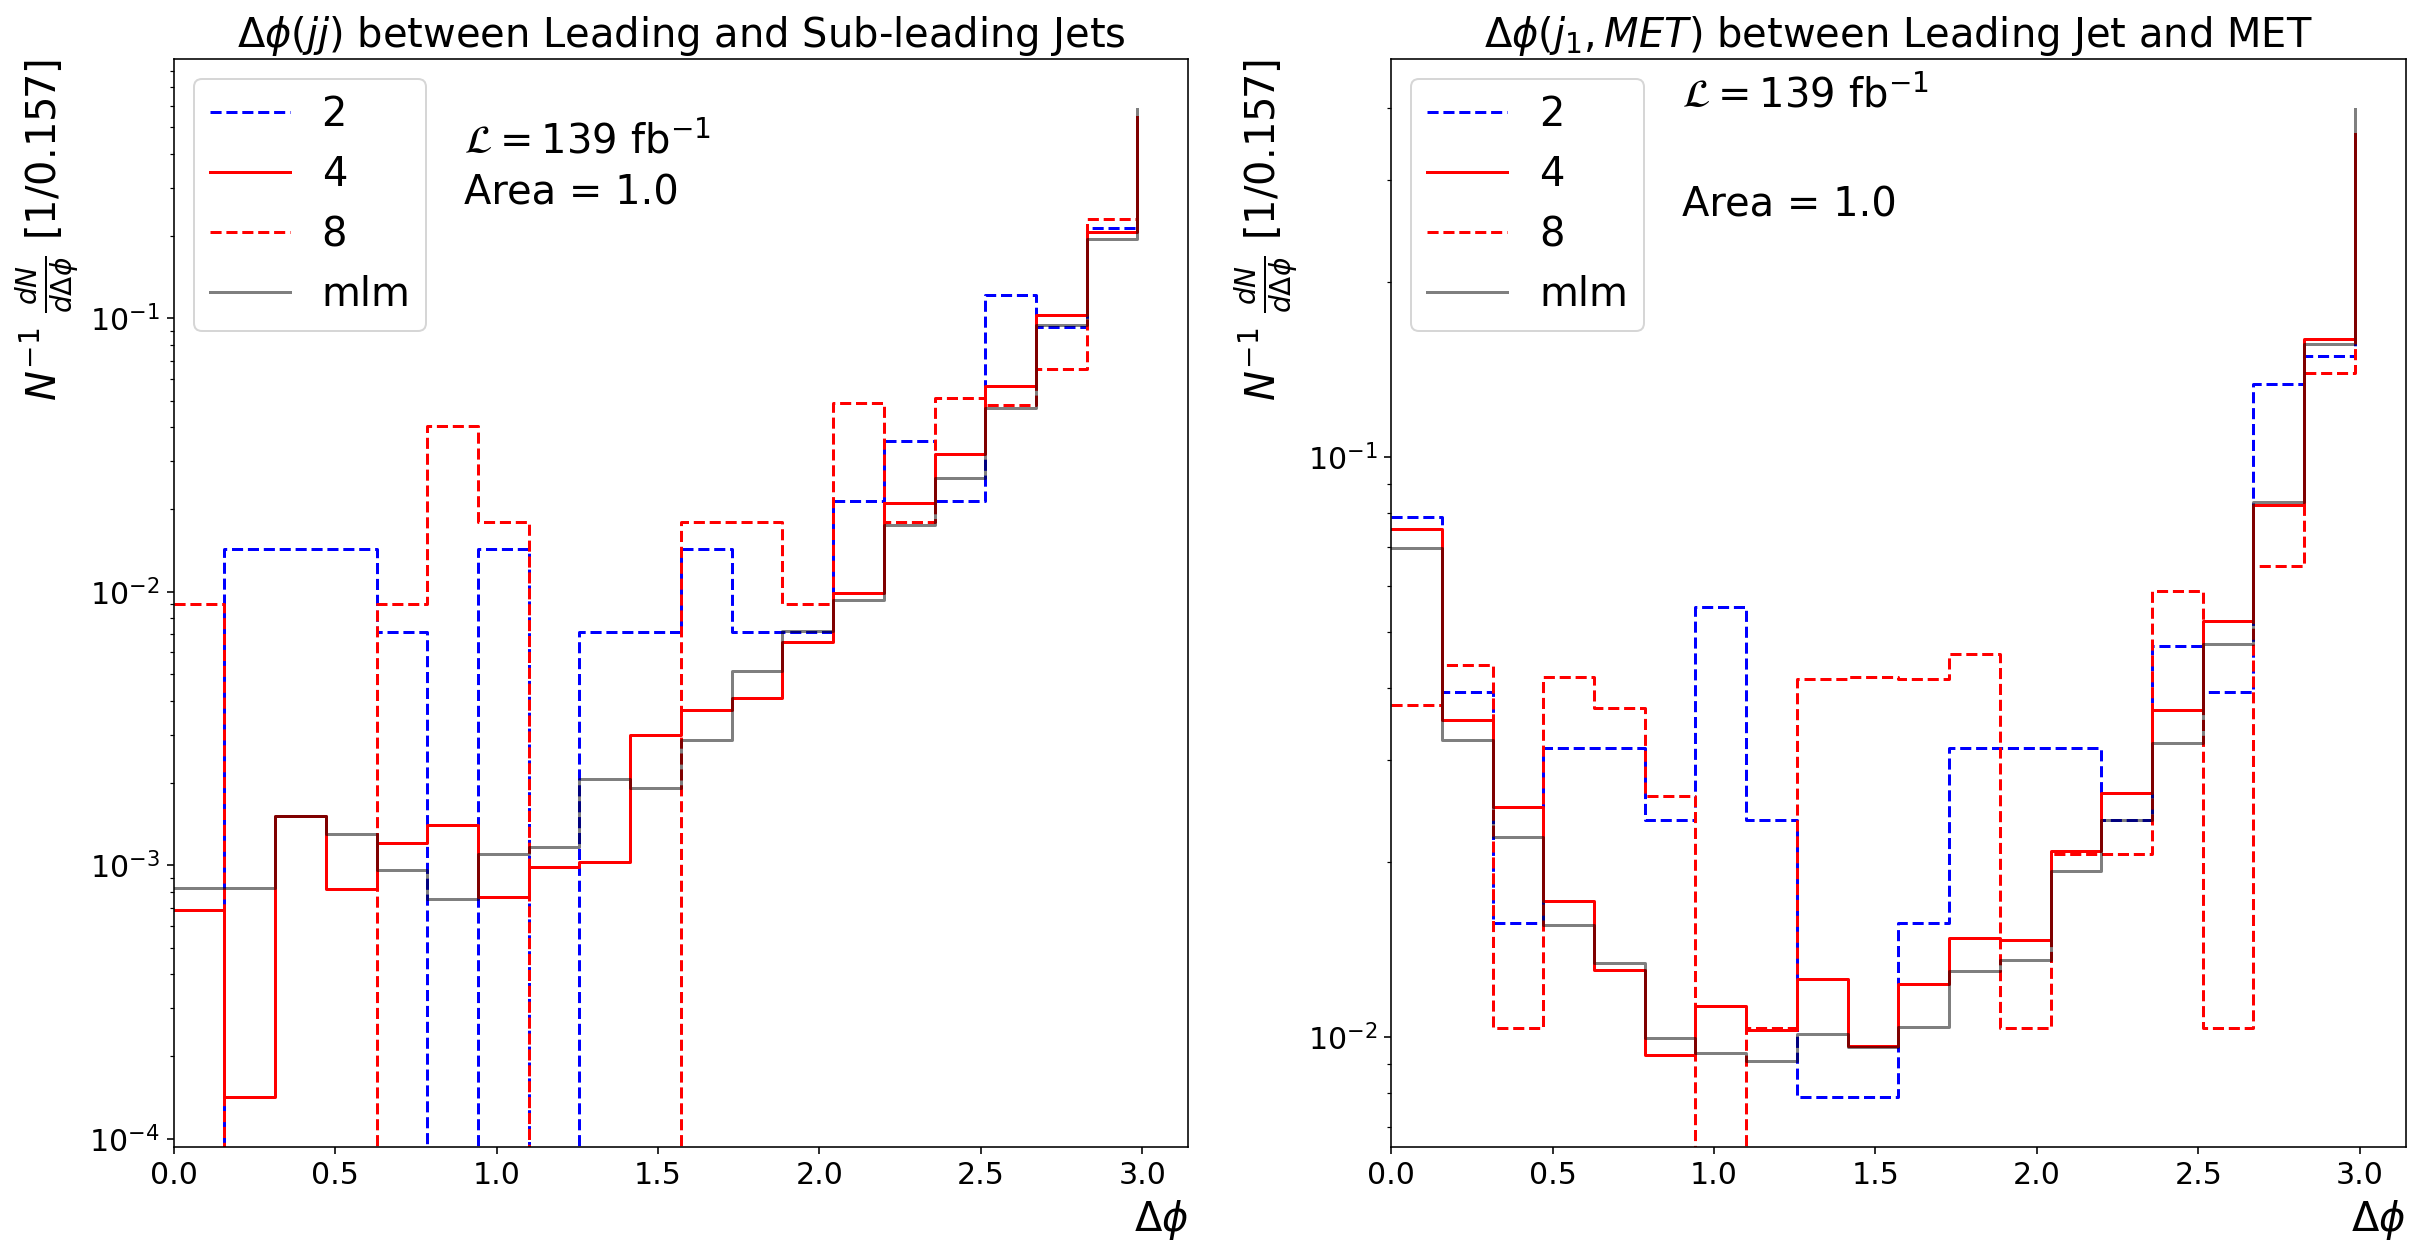

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))
binning = np.linspace(0, np.pi, 21)

# figure 1
hist_1, bins_1 = np.histogram(list_truth_results_filterDM_1[6], bins=binning,
                              weights=list_weight[0][list_truth_results_filterDM_1[3]]*LUMINOSITY*1000)
hist_2, bins_2 = np.histogram(list_truth_results_filterDM_2[6], bins=binning,
                              weights=list_weight[1][list_truth_results_filterDM_2[3]]*LUMINOSITY*1000)
hist_3, bins_3 = np.histogram(list_truth_results_filterDM_3[6], bins=binning,
                              weights=list_weight[2][list_truth_results_filterDM_3[3]]*LUMINOSITY*1000)
hist_4, bins_4 = np.histogram(list_truth_results_filterDM_4[6], bins=binning,
                              weights=list_weight[3][list_truth_results_filterDM_4[3]]*LUMINOSITY*1000)
hist_5, bins_5 = np.histogram(list_truth_results_filterDM_5[6], bins=binning,
                              weights=list_weight[4][list_truth_results_filterDM_5[3]]*LUMINOSITY*1000)
hist_6, bins_6 = np.histogram(list_truth_results_filterDM_6[6], bins=binning,
                              weights=list_weight[5][list_truth_results_filterDM_6[3]]*LUMINOSITY*1000)
hist_7, bins_7 = np.histogram(list_truth_results_filterDM_7[6], bins=binning,
                              weights=list_weight[6][list_truth_results_filterDM_7[3]]*LUMINOSITY*1000)
hist_8, bins_8 = np.histogram(list_truth_results_filterDM_8[6], bins=binning,
                              weights=list_weight[7][list_truth_results_filterDM_8[3]]*LUMINOSITY*1000)
hist_9, bins_9 = np.histogram(list_truth_results_filterDM_9[6], bins=binning,
                              weights=list_weight[8][list_truth_results_filterDM_9[3]]*LUMINOSITY*1000)
hist_10, bins_10 = np.histogram(list_truth_results_filterDM_10[6], bins=binning,
                              weights=list_weight[9][list_truth_results_filterDM_10[3]]*LUMINOSITY*1000)
hist_4_1, bins_4_1 = np.histogram(list_truth_results_filterDM_4_1[6], bins=binning,
                              weights=list_weight[10][list_truth_results_filterDM_4_1[3]]*LUMINOSITY*1000)
hist_mlm, bins_mlm = np.histogram(list_truth_results_filterDM_mlm[6], bins=binning,
                              weights=list_weight[11][list_truth_results_filterDM_mlm[3]]*LUMINOSITY*1000)

axs[0].step(bins_2[:-1], hist_2/np.sum(hist_2), where='post', color='blue', linestyle='--', label="2")
# axs[0].step(bins_3[:-1], hist_3/np.sum(hist_3), where='post', color='blue', label="3")
axs[0].step(bins_4[:-1], hist_4/np.sum(hist_4), where='post', color='red', label="4")
# axs[0].step(bins_5[:-1], hist_5/np.sum(hist_5), where='post', color='orange', linestyle='-.', alpha=0.5, label="5")
# axs[0].step(bins_6[:-1], hist_6/np.sum(hist_6), where='post', color='green', label="6")
# axs[0].step(bins_7[:-1], hist_7/np.sum(hist_7), where='post', color='pink', alpha=0.5, label="7")
axs[0].step(bins_8[:-1], hist_8/np.sum(hist_8), where='post', color='red', linestyle='--', label="8")
axs[0].step(bins_mlm[:-1], hist_mlm/np.sum(hist_mlm), where='post', color='black', alpha=0.5, label="mlm")
# text
axs[0].text(0.9, 0.4, "$\mathcal{L} = $"+str(LUMINOSITY)+"$\ \mathrm{fb}^{-1}$", fontsize=20)
# axs[1].text(1980, 0.007, "$M_{Z^\prime} = 1500$ GeV", fontsize=20)
axs[0].text(0.9, 0.26, "Area = "+str(np.round(np.sum(hist_4.astype(np.float32)/np.sum(hist_4)),2)), fontsize=20)
# axes setting
axs[0].legend(fontsize=20)
axs[0].set_xlabel("$\Delta\phi$", fontsize=20, horizontalalignment='right', x=1)
axs[0].set_ylabel("$N^{-1}\ \\frac{dN}{d\Delta\phi}$ [1/0.157]", fontsize=20, horizontalalignment='right', y=1)
axs[0].set_title("$\Delta\phi(jj)$ between Leading and Sub-leading Jets", fontsize=20)
axs[0].set_xlim(0,np.pi)
axs[0].set_yscale('log')
axs[0].tick_params(axis='both', labelsize=15)


# figure 2
hist_1, bins_1 = np.histogram(list_MET_truth_results_1[3], bins=binning,
                              weights=list_weight[0][list_truth_results_filterDM_1[3]]*LUMINOSITY*1000)
hist_2, bins_2 = np.histogram(list_MET_truth_results_2[3], bins=binning,
                              weights=list_weight[1][list_truth_results_filterDM_2[3]]*LUMINOSITY*1000)
hist_3, bins_3 = np.histogram(list_MET_truth_results_3[3], bins=binning,
                              weights=list_weight[2][list_truth_results_filterDM_3[3]]*LUMINOSITY*1000)
hist_4, bins_4 = np.histogram(list_MET_truth_results_4[3], bins=binning,
                              weights=list_weight[3][list_truth_results_filterDM_4[3]]*LUMINOSITY*1000)
hist_5, bins_5 = np.histogram(list_MET_truth_results_5[3], bins=binning,
                              weights=list_weight[4][list_truth_results_filterDM_5[3]]*LUMINOSITY*1000)
hist_6, bins_6 = np.histogram(list_MET_truth_results_6[3], bins=binning,
                              weights=list_weight[5][list_truth_results_filterDM_6[3]]*LUMINOSITY*1000)
hist_7, bins_7 = np.histogram(list_MET_truth_results_7[3], bins=binning,
                              weights=list_weight[6][list_truth_results_filterDM_7[3]]*LUMINOSITY*1000)
hist_8, bins_8 = np.histogram(list_MET_truth_results_8[3], bins=binning,
                              weights=list_weight[7][list_truth_results_filterDM_8[3]]*LUMINOSITY*1000)
hist_9, bins_9 = np.histogram(list_MET_truth_results_9[3], bins=binning,
                              weights=list_weight[8][list_truth_results_filterDM_9[3]]*LUMINOSITY*1000)
hist_10, bins_10 = np.histogram(list_MET_truth_results_10[3], bins=binning,
                              weights=list_weight[9][list_truth_results_filterDM_10[3]]*LUMINOSITY*1000)
hist_4_1, bins_4_1 = np.histogram(list_MET_truth_results_4_1[3], bins=binning,
                              weights=list_weight[10][list_truth_results_filterDM_4_1[3]]*LUMINOSITY*1000)
hist_mlm, bins_mlm = np.histogram(list_MET_truth_results_mlm[3], bins=binning,
                              weights=list_weight[11][list_truth_results_filterDM_mlm[3]]*LUMINOSITY*1000)

axs[1].step(bins_2[:-1], hist_2/np.sum(hist_2), where='post', color='blue', linestyle='--', label="2")
# axs[1].step(bins_3[:-1], hist_3/np.sum(hist_3), where='post', color='blue', label="3")
axs[1].step(bins_4[:-1], hist_4/np.sum(hist_4), where='post', color='red', label="4")
# axs[0].step(bins_5[:-1], hist_5/np.sum(hist_5), where='post', color='orange', linestyle='-.', alpha=0.5, label="5")
# axs[1].step(bins_6[:-1], hist_6/np.sum(hist_6), where='post', color='green', label="6")
# axs[0].step(bins_7[:-1], hist_7/np.sum(hist_7), where='post', color='pink', alpha=0.5, label="7")
axs[1].step(bins_8[:-1], hist_8/np.sum(hist_8), where='post', color='red', linestyle='--', label="8")
axs[1].step(bins_mlm[:-1], hist_mlm/np.sum(hist_mlm), where='post', color='black', alpha=0.5, label="mlm")
# text
axs[1].text(0.9, 0.4, "$\mathcal{L} = $"+str(LUMINOSITY)+"$\ \mathrm{fb}^{-1}$", fontsize=20)
# axs[1].text(1980, 0.007, "$M_{Z^\prime} = 1500$ GeV", fontsize=20)
axs[1].text(0.9, 0.26, "Area = "+str(np.round(np.sum(hist_4.astype(np.float32)/np.sum(hist_4)),2)), fontsize=20)
# axes setting
axs[1].legend(fontsize=20)
axs[1].set_xlabel("$\Delta\phi$", fontsize=20, horizontalalignment='right', x=1)
axs[1].set_ylabel("$N^{-1}\ \\frac{dN}{d\Delta\phi}$ [1/0.157]", fontsize=20, horizontalalignment='right', y=1)
axs[1].set_title("$\Delta\phi(j_1,MET)$ between Leading Jet and MET", fontsize=20)
axs[1].set_xlim(0,np.pi)
axs[1].set_yscale('log')
axs[1].tick_params(axis='both', labelsize=15)